## Initialization settings - Load the packages

Load the required packages

In [1]:
# The initialization settings - Load the required packages
library(tidyverse)
library(mice)
library(coda)
library(car)
library(effects)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

lattice 

Install and load the `JAGS` package and `INLA` package

In [2]:
# Install and load the JAGS package
# This code compiles and installs JAGS from the source website and it takes about 6-7 minutes.
system(paste("wget https://sourceforge.net/projects/mcmc-jags/files/JAGS/4.x/Source",
             "/JAGS-4.3.0.tar.gz -P /kaggle/working", sep = ""))
system("tar xvfz /kaggle/working/JAGS-4.3.0.tar.gz")
system("cd /kaggle/working/JAGS-4.3.0")
system("/kaggle/working/JAGS-4.3.0/configure")
system("make")
system("make install")
install.packages("rjags", lib = "/kaggle/working")
library(rjags, lib.loc = "/kaggle/working")

# The following code does the full installation of the INLA package.
# It will also take several minutes to complete the installation.
install.packages("INLA", repos = c(getOption("repos"),
                 INLA = "https://inla.r-inla-download.org/R/stable"),
                 dep = TRUE, lib = "/kaggle/working")
library(INLA, lib.loc = "/kaggle/working")

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs

Warning message:
“dependencies ‘Rgraphviz’, ‘graph’ are not available”
also installing the dependencies ‘multipol’, ‘HKprocess’, ‘mpoly’, ‘orthopolynom’, ‘symmoments’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: parallel

Loading required package: sp

This is INLA_21.02.23 built 2021-08-13 07:13:25 UTC.
 - See www.r-inla.org/contact-us for how to get help.
 - To enable PARDISO sparse library; see inla.pardiso()



## Part 1 - Initial data exploration and missing data analysis

Load the `GB.rda` data set  
You first need to upload this data set to the following path on Kaggle:  
**"../input/great-british/GB.rda"**  

Perform some initial analyses on the `GB` data set and arrange this data set to make it suitable for our work

tibble [27,975 × 33] (S3: tbl_df/tbl/data.frame)
 $ CNTSCHID  : num [1:27975] 82600001 82600001 82600001 82600001 82600001 ...
 $ PV1MATH   : num [1:27975] 395 447 288 430 541 ...
 $ PV2MATH   : num [1:27975] 456 479 410 465 523 ...
 $ PV3MATH   : num [1:27975] 439 423 377 454 496 ...
 $ PV4MATH   : num [1:27975] 459 472 320 485 490 ...
 $ PV5MATH   : num [1:27975] 424 414 248 448 507 ...
 $ PV1READ   : num [1:27975] 321 460 304 477 528 ...
 $ PV2READ   : num [1:27975] 346 478 333 518 517 ...
 $ PV3READ   : num [1:27975] 391 457 298 537 397 ...
 $ PV4READ   : num [1:27975] 419 459 286 498 489 ...
 $ PV5READ   : num [1:27975] 380 486 245 492 472 ...
 $ PV1SCIE   : num [1:27975] 364 406 224 483 558 ...
 $ PV2SCIE   : num [1:27975] 423 416 299 481 534 ...
 $ PV3SCIE   : num [1:27975] 381 395 263 522 471 ...
 $ PV4SCIE   : num [1:27975] 434 407 248 501 468 ...
 $ PV5SCIE   : num [1:27975] 426 424 212 513 509 ...
 $ MISCED    : num [1:27975] NA 4 4 4 6 3 5 4 6 6 ...
 $ FISCED    : num [1:27

    CNTSCHID           PV1MATH         PV2MATH         PV3MATH      
 Min.   :82600001   Min.   :109.7   Min.   :130.7   Min.   : 47.62  
 1st Qu.:82600143   1st Qu.:432.1   1st Qu.:432.4   1st Qu.:433.60  
 Median :82600286   Median :494.7   Median :494.2   Median :494.17  
 Mean   :82611107   Mean   :493.0   Mean   :492.2   Mean   :492.64  
 3rd Qu.:82600430   3rd Qu.:554.6   3rd Qu.:553.0   3rd Qu.:553.88  
 Max.   :82650118   Max.   :815.5   Max.   :852.9   Max.   :835.70  
                                                                    
    PV4MATH          PV5MATH          PV1READ         PV2READ     
 Min.   : 89.98   Min.   : 96.37   Min.   :114.3   Min.   :144.4  
 1st Qu.:433.86   1st Qu.:433.09   1st Qu.:432.6   1st Qu.:432.2  
 Median :495.03   Median :494.13   Median :499.7   Median :499.1  
 Mean   :493.56   Mean   :492.84   Mean   :498.0   Mean   :497.6  
 3rd Qu.:553.91   3rd Qu.:553.70   3rd Qu.:564.5   3rd Qu.:565.1  
 Max.   :803.70   Max.   :810.01   Max.   :846

tibble [27,975 × 28] (S3: tbl_df/tbl/data.frame)
 $ PV1MATH      : num [1:27975] 395 447 288 430 541 ...
 $ PV2MATH      : num [1:27975] 456 479 410 465 523 ...
 $ PV3MATH      : num [1:27975] 439 423 377 454 496 ...
 $ PV4MATH      : num [1:27975] 459 472 320 485 490 ...
 $ PV5MATH      : num [1:27975] 424 414 248 448 507 ...
 $ PV1READ      : num [1:27975] 321 460 304 477 528 ...
 $ PV2READ      : num [1:27975] 346 478 333 518 517 ...
 $ PV3READ      : num [1:27975] 391 457 298 537 397 ...
 $ PV4READ      : num [1:27975] 419 459 286 498 489 ...
 $ PV5READ      : num [1:27975] 380 486 245 492 472 ...
 $ PV1SCIE      : num [1:27975] 364 406 224 483 558 ...
 $ PV2SCIE      : num [1:27975] 423 416 299 481 534 ...
 $ PV3SCIE      : num [1:27975] 381 395 263 522 471 ...
 $ PV4SCIE      : num [1:27975] 434 407 248 501 468 ...
 $ PV5SCIE      : num [1:27975] 426 424 212 513 509 ...
 $ MISCED       : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: NA 5 5 5 7 4 6 5 7 7 ...
 $ FISCED       : Ord.fac

    PV1MATH         PV2MATH         PV3MATH          PV4MATH      
 Min.   :109.7   Min.   :130.7   Min.   : 47.62   Min.   : 89.98  
 1st Qu.:432.1   1st Qu.:432.4   1st Qu.:433.60   1st Qu.:433.86  
 Median :494.7   Median :494.2   Median :494.17   Median :495.03  
 Mean   :493.0   Mean   :492.2   Mean   :492.64   Mean   :493.56  
 3rd Qu.:554.6   3rd Qu.:553.0   3rd Qu.:553.88   3rd Qu.:553.91  
 Max.   :815.5   Max.   :852.9   Max.   :835.70   Max.   :803.70  
                                                                  
    PV5MATH          PV1READ         PV2READ         PV3READ      
 Min.   : 96.37   Min.   :114.3   Min.   :144.4   Min.   : 73.19  
 1st Qu.:433.09   1st Qu.:432.6   1st Qu.:432.2   1st Qu.:431.18  
 Median :494.13   Median :499.7   Median :499.1   Median :497.73  
 Mean   :492.84   Mean   :498.0   Mean   :497.6   Mean   :496.20  
 3rd Qu.:553.70   3rd Qu.:564.5   3rd Qu.:565.1   3rd Qu.:563.01  
 Max.   :810.01   Max.   :846.7   Max.   :848.5   Max.   :888.

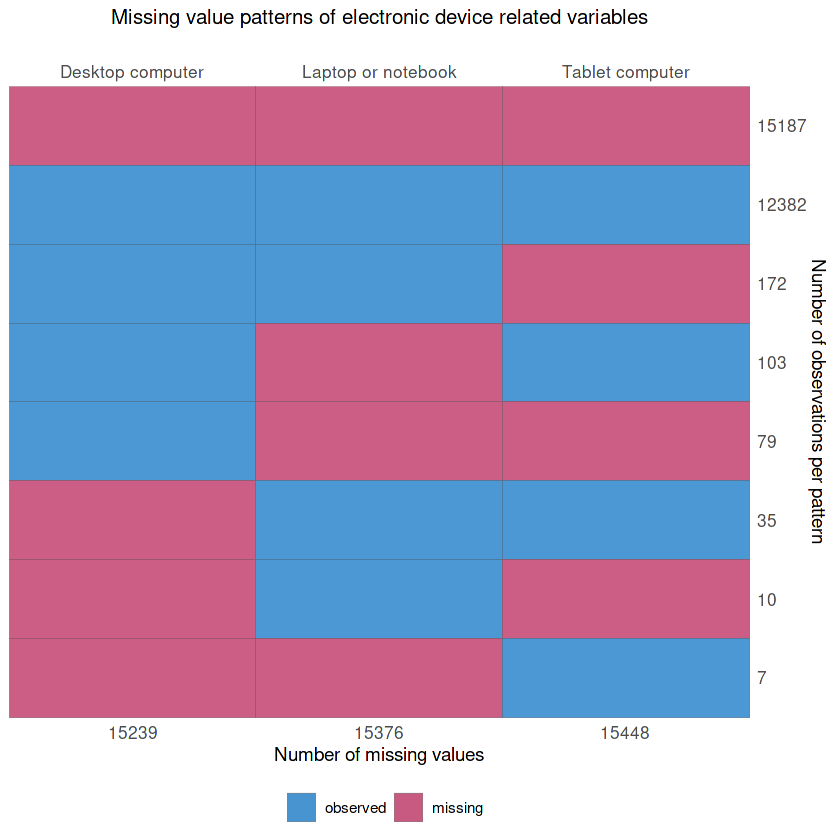

In [3]:
# Load the `GB` data set
load("../input/great-british/GB.rda")

# Display the summary statistics of the orginal data set, `GB`
str(GB)
summary(GB)

# Visualize the distribution of the missing data for the three variables
# about electronic devices, `IC009Q01TA`, `IC009Q02TA` and `IC009Q03TA`
source("https://raw.githubusercontent.com/NErler/JointAI/master/R/md_pattern.R")
source("https://raw.githubusercontent.com/NErler/JointAI/master/R/helpfunctions_melt.R")
md_pattern(GB %>% select(IC009Q01TA, IC009Q02TA, IC009Q03TA) %>%
           rename(`Desktop computer` = IC009Q01TA,
                  `Laptop or notebook` = IC009Q02TA,
                  `Tablet computer` = IC009Q03TA),
           color = c(mdc(1), mdc(2))) +
  labs(title = "Missing value patterns of electronic device related variables") +
  theme(axis.text.x.top = element_text(angle = 0, hjust = 0.5),
        axis.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 12))
ggsave("P1F1.png", width = 6, height = 6)

# Arrange the data set `GB` to make it suitable for our work
Great.British = GB %>%
  mutate(
    MISCED = factor(MISCED, levels = c("0", "1", "2", "3", "4", "5", "6"), ordered = TRUE),
    FISCED = factor(FISCED, levels = c("0", "1", "2", "3", "4", "5", "6"), ordered = TRUE),
    ST004D01T = factor(ST004D01T, levels = c(1, 2), labels = c("Female", "Male")),
    IMMIG = factor(IMMIG, levels = c("1", "2", "3"),
                   labels = c("Native", "2ndGener", "1stGener")),
    TMINS = (TMINS - min(TMINS, na.rm = TRUE))/sd(TMINS, na.rm = TRUE),
    Region = factor(Region, levels = c("82611", "82612", "82613", "82620"),
                    labels = c("England", "NorthIre", "Wales", "Scotland")),
    School.Type = factor(ifelse(is.na(SC013Q01TA), ifelse(SCHLTYPE == 3, 1, 2), SC013Q01TA),
                         levels = c("1", "2"), labels = c("Public", "Private")),
    SC001Q01TA = factor(SC001Q01TA, levels = c("1", "2", "3", "4", "5"), ordered = TRUE,
                        labels = c("Village", "Small.Town", "Town", "City", "Large.City")),
    Total.Student = ((SC002Q01TA + SC002Q02TA) - min(SC002Q01TA + SC002Q02TA,
                    na.rm = TRUE))/sd(SC002Q01TA + SC002Q02TA, na.rm = TRUE),
    Girl.Ratio = SC002Q02TA/(SC002Q01TA + SC002Q02TA),
    year = factor(year, levels = c("2015", "2018")),
    SC048Q03NA = SC048Q03NA/100
  ) %>%
  rename(Gender = ST004D01T, Area.Type = SC001Q01TA,
         Deprived = SC048Q03NA, Year = year) %>%
  select(!c(CNTSCHID, IC009Q01TA, IC009Q02TA, IC009Q03TA,
            SC002Q01TA, SC002Q02TA, SC013Q01TA, SCHLTYPE))

# Display the summary statistics of the data set after collation, `Great.British`
str(Great.British)
summary(Great.British)

(1) Visualize the patterns of missing values in all the variables  
(2) Perform imputation for the missing values in the data set, and compare the density or proportional distribution of the observed values with that of imputed values  
(3) Complete the missing values to construct a complete data set finally

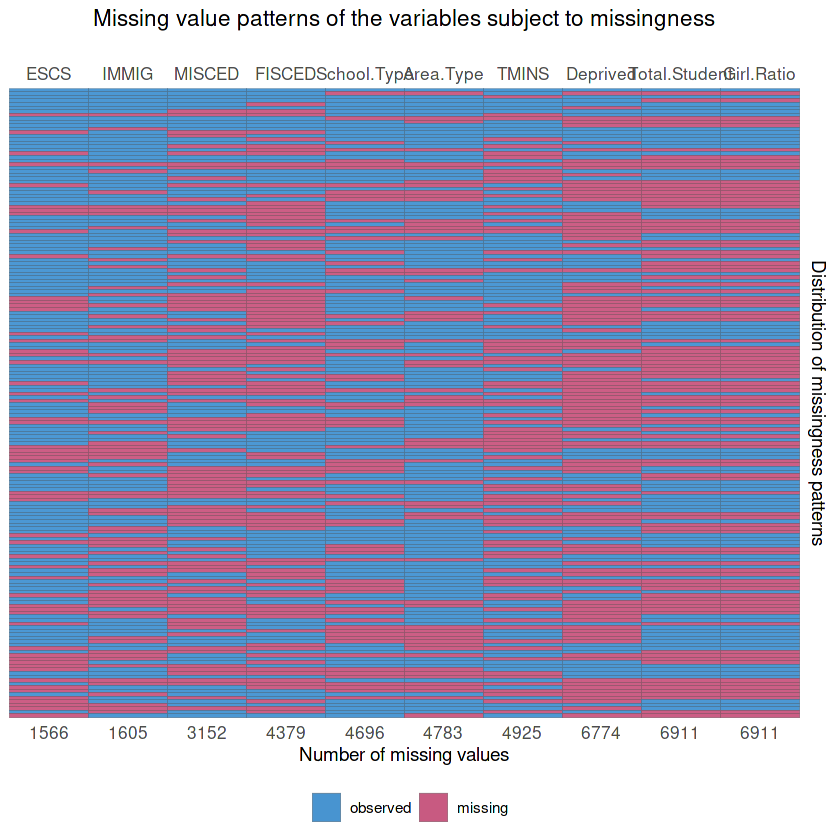

Warning message:
“attributes are not identical across measure variables; they will be dropped”


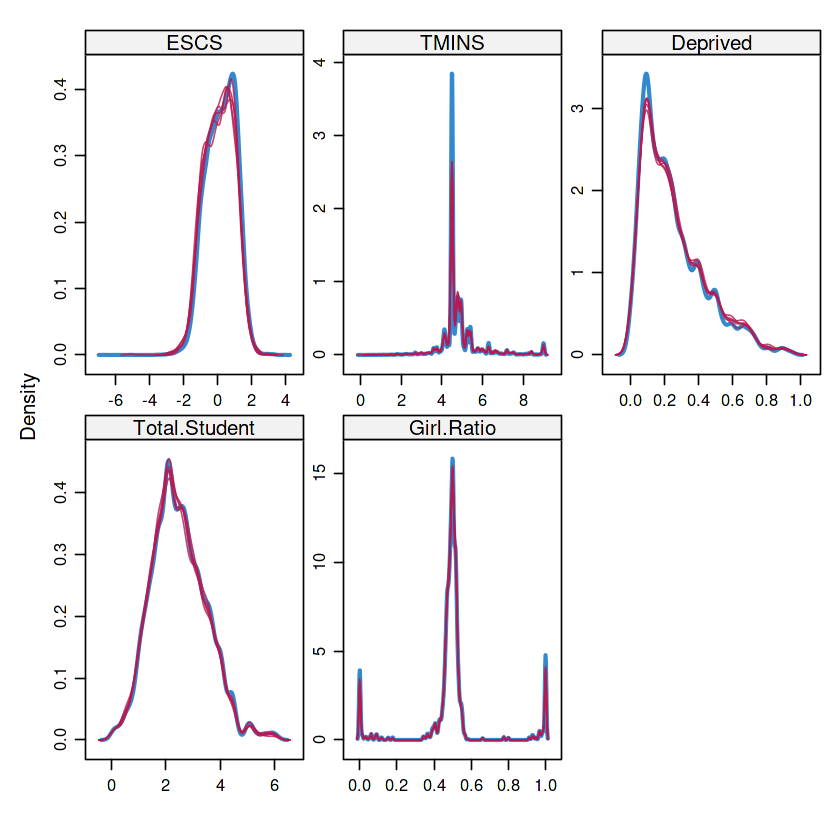

'data.frame':	27975 obs. of  28 variables:
 $ PV1MATH      : num  395 447 288 430 541 ...
 $ PV2MATH      : num  456 479 410 465 523 ...
 $ PV3MATH      : num  439 423 377 454 496 ...
 $ PV4MATH      : num  459 472 320 485 490 ...
 $ PV5MATH      : num  424 414 248 448 507 ...
 $ PV1READ      : num  321 460 304 477 528 ...
 $ PV2READ      : num  346 478 333 518 517 ...
 $ PV3READ      : num  391 457 298 537 397 ...
 $ PV4READ      : num  419 459 286 498 489 ...
 $ PV5READ      : num  380 486 245 492 472 ...
 $ PV1SCIE      : num  364 406 224 483 558 ...
 $ PV2SCIE      : num  423 416 299 481 534 ...
 $ PV3SCIE      : num  381 395 263 522 471 ...
 $ PV4SCIE      : num  434 407 248 501 468 ...
 $ PV5SCIE      : num  426 424 212 513 509 ...
 $ MISCED       : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 4 5 5 5 7 4 6 5 7 7 ...
 $ FISCED       : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 4 6 4 7 4 7 6 4 7 ...
 $ ESCS         : num  0.151 0.86 -0.276 0.684 1.792 ...
 $ Gender       : Factor 

    PV1MATH         PV2MATH         PV3MATH          PV4MATH      
 Min.   :109.7   Min.   :130.7   Min.   : 47.62   Min.   : 89.98  
 1st Qu.:432.1   1st Qu.:432.4   1st Qu.:433.60   1st Qu.:433.86  
 Median :494.7   Median :494.2   Median :494.17   Median :495.03  
 Mean   :493.0   Mean   :492.2   Mean   :492.64   Mean   :493.56  
 3rd Qu.:554.6   3rd Qu.:553.0   3rd Qu.:553.88   3rd Qu.:553.91  
 Max.   :815.5   Max.   :852.9   Max.   :835.70   Max.   :803.70  
                                                                  
    PV5MATH          PV1READ         PV2READ         PV3READ      
 Min.   : 96.37   Min.   :114.3   Min.   :144.4   Min.   : 73.19  
 1st Qu.:433.09   1st Qu.:432.6   1st Qu.:432.2   1st Qu.:431.18  
 Median :494.13   Median :499.7   Median :499.1   Median :497.73  
 Mean   :492.84   Mean   :498.0   Mean   :497.6   Mean   :496.20  
 3rd Qu.:553.70   3rd Qu.:564.5   3rd Qu.:565.1   3rd Qu.:563.01  
 Max.   :810.01   Max.   :846.7   Max.   :848.5   Max.   :888.

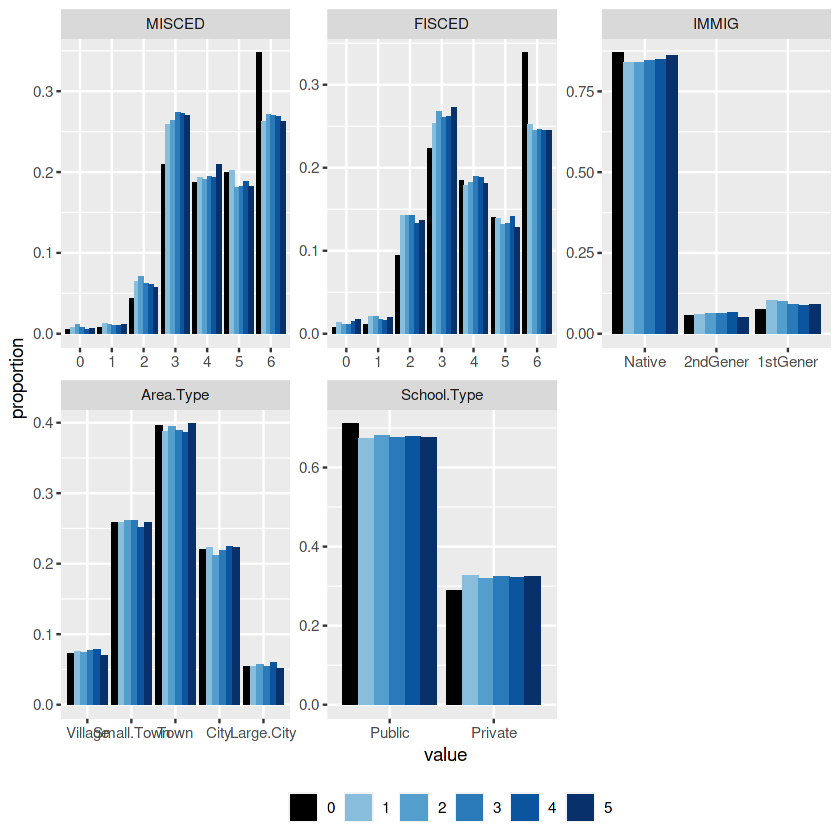

In [4]:
# Visualize the patterns of missing values in all the variables with missingness
Great.British %>% select(
  MISCED, FISCED, ESCS, IMMIG, TMINS, Deprived, Area.Type,
  School.Type, Total.Student, Girl.Ratio) %>%
  md_pattern(color = c(mdc(1), mdc(2)), print_yaxis = FALSE) +
  labs(title = "Missing value patterns of the variables subject to missingness") +
  ylab("Distribution of missingness patterns") +
  theme(axis.text.x.top = element_text(angle = 0, hjust = 0.5, size = 10),
        axis.text.x = element_text(size = 10),
        plot.title = element_text(hjust = 0.5))
ggsave("P1F2.png", width = 9, height = 5)

# Perform imputation for the missing values in the data set
impu_dummy = mice(Great.British, maxit = 0)
impu_mat = impu_dummy$predictorMatrix
impu_method = impu_dummy$method
impu_mat[1:15,] = 0
impu_mat[c("Gender", "Region", "Year"),] = 0
impu = mice(Great.British, printFlag = FALSE,
            predictorMatrix = impu_mat, seed = 666)

# Compare the density (for continuous variables) or proportional distribution
# (for categorical variables) of the observed values with that of imputed values
densityplot(impu)
source(paste("https://gist.githubusercontent.com/NErler/",
  "0d00375da460dd33839b98faeee2fdab/raw/",
  "c6f537ecf80eddcefd94992ec7926aa57d454536/propplot.R", sep = ""))
propplot(impu)

# Complete the missing values in the variables `MISCED` and `FISCED`
# Display the summary statistics of the complete data set after imputation
GB_comp = complete(impu, 1)
str(GB_comp)
summary(GB_comp)

(1) I perform some adjustments on the complete data set after imputation to construct the final data set that we will use to fit statistical models.  
(2) I randomly select an integer between 1 and 5, and the identifier of the scores for which I will fit statistical models is based on this integer.

In [5]:
# Perform some adjustments on the complete data set after imputation
# to construct the final data set that we will use to fit statistical models
GB.df = GB_comp %>%
  mutate(
    ISCED = factor(sapply(1:nrow(GB_comp), function(k){max(MISCED[k], FISCED[k])}),
                   levels = c("0", "1", "2", "3", "4", "5", "6")),
    Area.Type = factor(Area.Type, ordered = FALSE)
  ) %>%
  select(!c(MISCED, FISCED))

# Display the summary statistics of the final data set
# that we will use to fit statistical models
data_size = nrow(GB.df)
str(GB.df)
summary(GB.df)

# Fix the random seed
set.seed(1600)

# Randomly pick an integer between 1 and 5, denoting it by `a`
# I will fit statistical models for the scores PV`a`MATH, PV`a`READ and PV`a`SCIE.
a = which(as.logical(rmultinom(n = 1, size = 1, prob = rep(0.2, 5))))
print(a)
math = paste("PV", a, "MATH", sep = "")
reading = paste("PV", a, "READ", sep = "")
science = paste("PV", a, "SCIE", sep = "")

'data.frame':	27975 obs. of  27 variables:
 $ PV1MATH      : num  395 447 288 430 541 ...
 $ PV2MATH      : num  456 479 410 465 523 ...
 $ PV3MATH      : num  439 423 377 454 496 ...
 $ PV4MATH      : num  459 472 320 485 490 ...
 $ PV5MATH      : num  424 414 248 448 507 ...
 $ PV1READ      : num  321 460 304 477 528 ...
 $ PV2READ      : num  346 478 333 518 517 ...
 $ PV3READ      : num  391 457 298 537 397 ...
 $ PV4READ      : num  419 459 286 498 489 ...
 $ PV5READ      : num  380 486 245 492 472 ...
 $ PV1SCIE      : num  364 406 224 483 558 ...
 $ PV2SCIE      : num  423 416 299 481 534 ...
 $ PV3SCIE      : num  381 395 263 522 471 ...
 $ PV4SCIE      : num  434 407 248 501 468 ...
 $ PV5SCIE      : num  426 424 212 513 509 ...
 $ ESCS         : num  0.151 0.86 -0.276 0.684 1.792 ...
 $ Gender       : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 1 1 1 ...
 $ IMMIG        : Factor w/ 3 levels "Native","2ndGener",..: 1 1 1 1 2 1 1 1 1 1 ...
 $ TMINS        : num  4.12 4.5 

    PV1MATH         PV2MATH         PV3MATH          PV4MATH      
 Min.   :109.7   Min.   :130.7   Min.   : 47.62   Min.   : 89.98  
 1st Qu.:432.1   1st Qu.:432.4   1st Qu.:433.60   1st Qu.:433.86  
 Median :494.7   Median :494.2   Median :494.17   Median :495.03  
 Mean   :493.0   Mean   :492.2   Mean   :492.64   Mean   :493.56  
 3rd Qu.:554.6   3rd Qu.:553.0   3rd Qu.:553.88   3rd Qu.:553.91  
 Max.   :815.5   Max.   :852.9   Max.   :835.70   Max.   :803.70  
                                                                  
    PV5MATH          PV1READ         PV2READ         PV3READ      
 Min.   : 96.37   Min.   :114.3   Min.   :144.4   Min.   : 73.19  
 1st Qu.:433.09   1st Qu.:432.6   1st Qu.:432.2   1st Qu.:431.18  
 Median :494.13   Median :499.7   Median :499.1   Median :497.73  
 Mean   :492.84   Mean   :498.0   Mean   :497.6   Mean   :496.20  
 3rd Qu.:553.70   3rd Qu.:564.5   3rd Qu.:565.1   3rd Qu.:563.01  
 Max.   :810.01   Max.   :846.7   Max.   :848.5   Max.   :888.

[1] 2


## Part 2 - Explanatory data analysis
Fit generalized regression models (GLM) and Bayesian models to predict the scores of the three subjects, math, reading and science
Perform explanatory data analysis in this part for the statistical models

**1. Exploration on the relationship between the response variable and the covariates**

Plot the scores of the three subjects against each individual variable

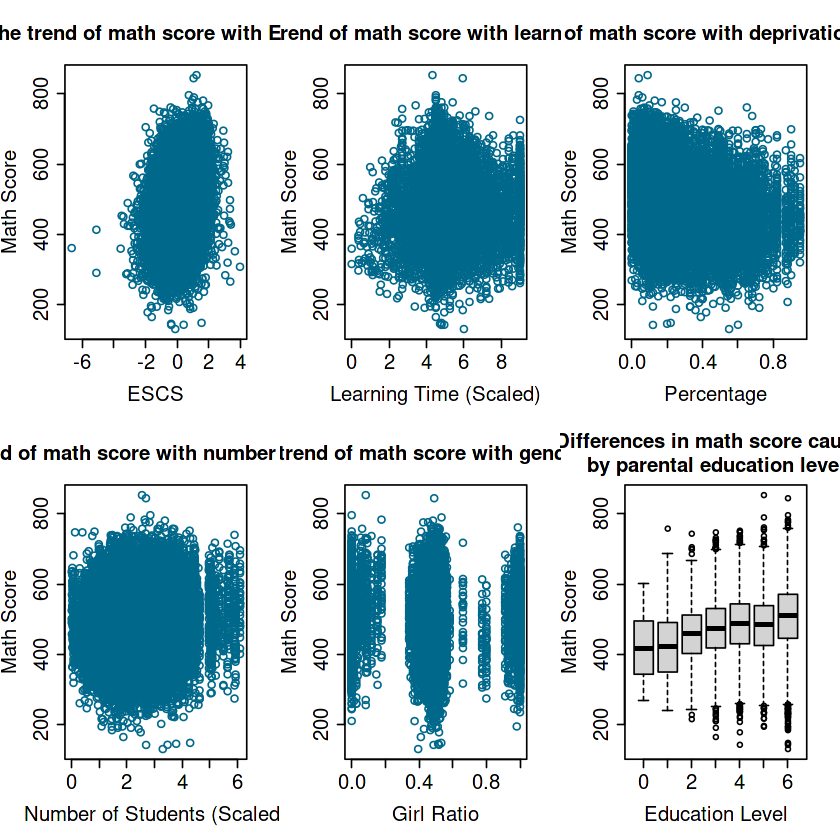

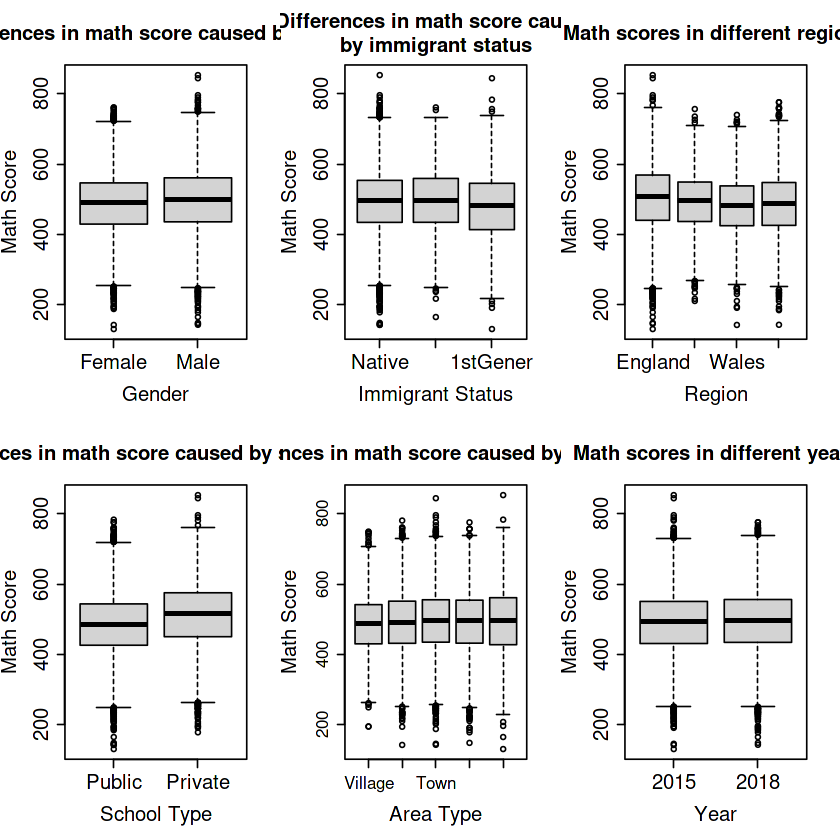

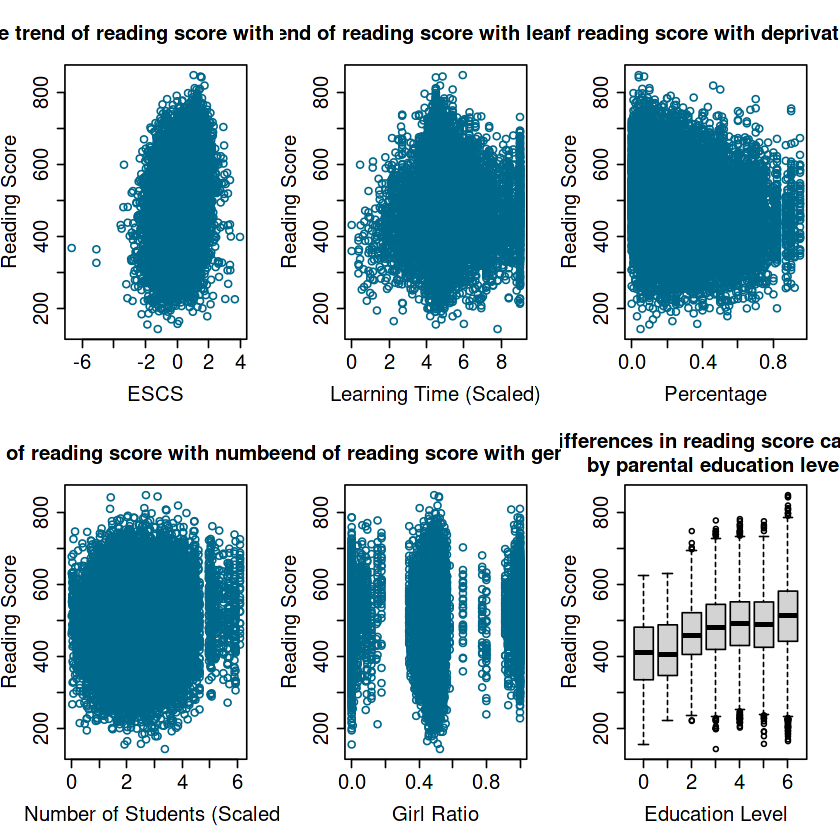

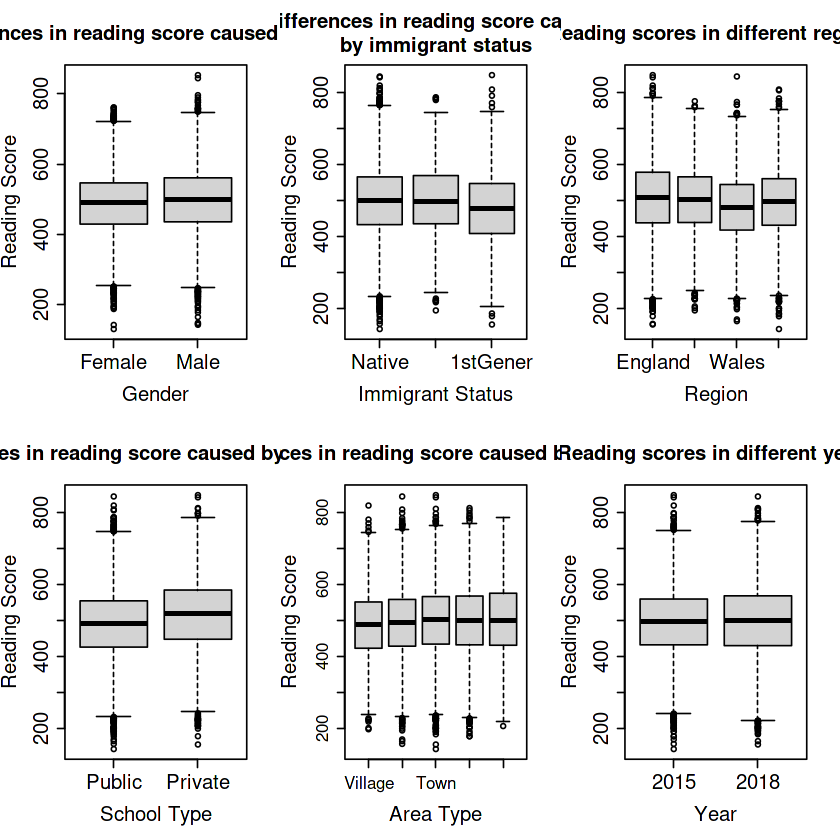

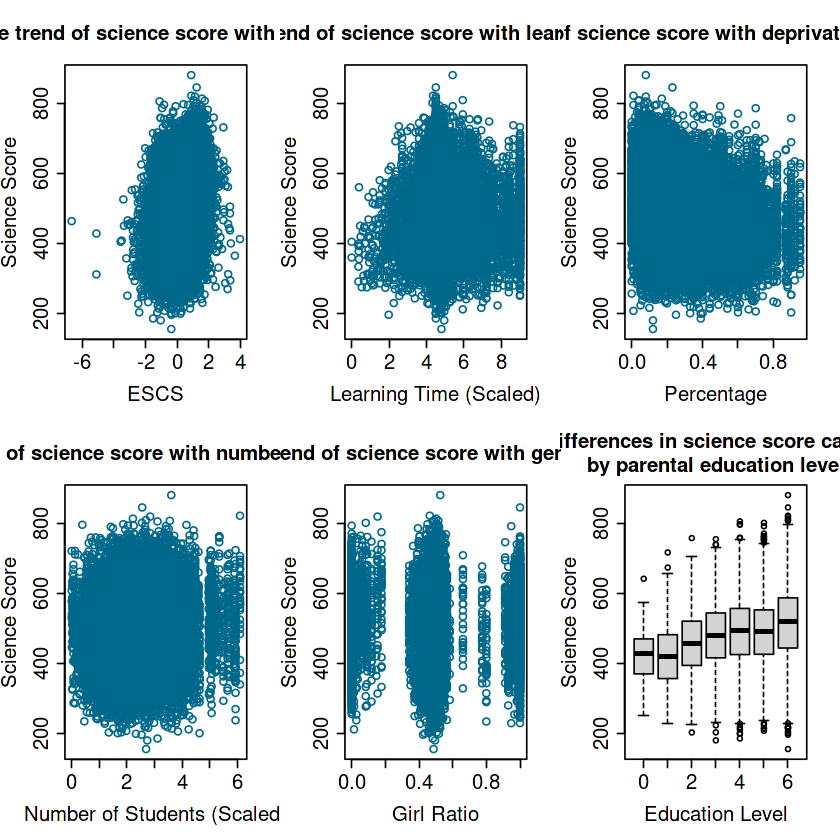

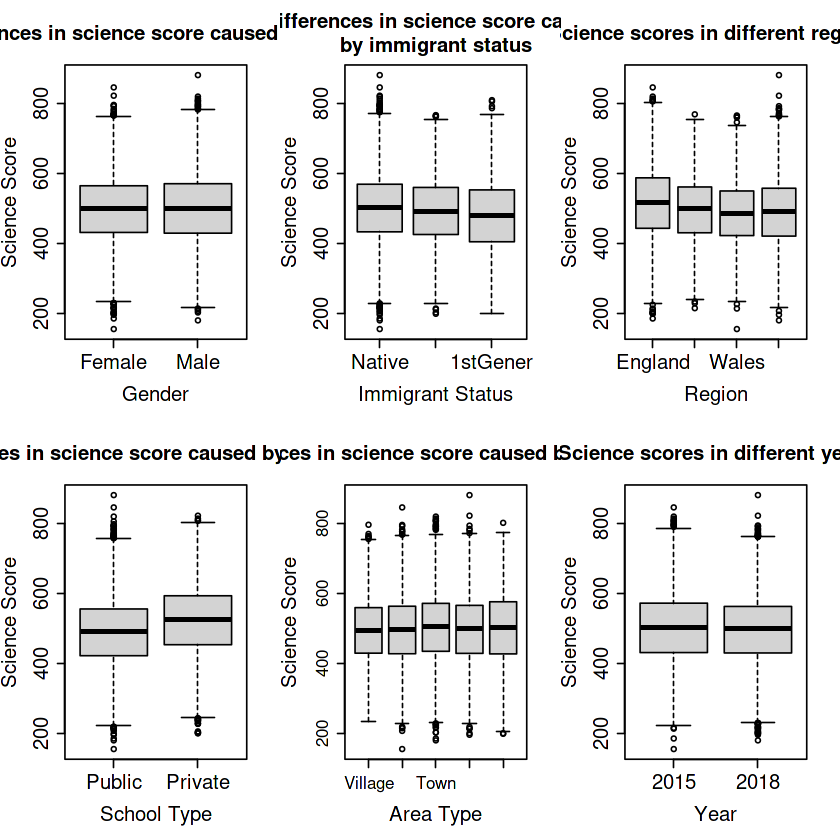

In [6]:
# Plot the math score against each individual variable
layout(matrix(c(1:6), 2, 3, byrow = TRUE))
attach(GB.df)
plot(ESCS, GB.df[, math], col = "deepskyblue4",
     xlab = "ESCS", ylab = "Math Score",
     main = "The trend of math score with ESCS",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(TMINS, GB.df[, math], col = "deepskyblue4",
     xlab = "Learning Time (Scaled)", ylab = "Math Score",
     main = "The trend of math score with learning time",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Deprived, GB.df[, math], col = "deepskyblue4",
     xlab = "Percentage", ylab = "Math Score",
     main = "The trend of math score with deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Total.Student, GB.df[, math], col = "deepskyblue4",
     xlab = "Number of Students (Scaled)", ylab = "Math Score",
     main = "The trend of math score with number of students",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Girl.Ratio, GB.df[, math], col = "deepskyblue4",
     xlab = "Girl Ratio", ylab = "Math Score",
     main = "The trend of math score with gender ratio",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ ISCED, xlab = "Education Level", ylab = "Math Score",
        main = "Differences in math score caused\nby parental education level",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ Gender, xlab = "Gender", ylab = "Math Score",
        main = "Differences in math score caused by gender",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ IMMIG, xlab = "Immigrant Status", ylab = "Math Score",
        main = "Differences in math score caused\nby immigrant status",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ Region, xlab = "Region", ylab = "Math Score",
        main = "Math scores in different regions",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ School.Type, xlab = "School Type", ylab = "Math Score",
        main = "Differences in math score caused by school type",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ Area.Type, xlab = "Area Type", ylab = "Math Score",
        main = "Differences in math score caused by area type",
        cex.axis = 1.25, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ Year, xlab = "Year", ylab = "Math Score",
        main = "Math scores in different years",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)

# Plot the reading score against each individual variable
attach(GB.df)
plot(ESCS, GB.df[, reading], col = "deepskyblue4",
     xlab = "ESCS", ylab = "Reading Score",
     main = "The trend of reading score with ESCS",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(TMINS, GB.df[, reading], col = "deepskyblue4",
     xlab = "Learning Time (Scaled)", ylab = "Reading Score",
     main = "The trend of reading score with learning time",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Deprived, GB.df[, reading], col = "deepskyblue4",
     xlab = "Percentage", ylab = "Reading Score",
     main = "The trend of reading score with deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Total.Student, GB.df[, reading], col = "deepskyblue4",
     xlab = "Number of Students (Scaled)", ylab = "Reading Score",
     main = "The trend of reading score with number of students",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Girl.Ratio, GB.df[, reading], col = "deepskyblue4",
     xlab = "Girl Ratio", ylab = "Reading Score",
     main = "The trend of reading score with gender ratio",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ ISCED, xlab = "Education Level", ylab = "Reading Score",
        main = "Differences in reading score caused\nby parental education level",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, math] ~ Gender, xlab = "Gender", ylab = "Reading Score",
        main = "Differences in reading score caused by gender",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ IMMIG, xlab = "Immigrant Status", ylab = "Reading Score",
        main = "Differences in reading score caused\nby immigrant status",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ Region, xlab = "Region", ylab = "Reading Score",
        main = "Reading scores in different regions",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ School.Type, xlab = "School Type", ylab = "Reading Score",
        main = "Differences in reading score caused by school type",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ Area.Type, xlab = "Area Type", ylab = "Reading Score",
        main = "Differences in reading score caused by area type",
        cex.axis = 1.25, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, reading] ~ Year, xlab = "Year", ylab = "Reading Score",
        main = "Reading scores in different years",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)

# Plot the science score against each individual variable
attach(GB.df)
plot(ESCS, GB.df[, science], col = "deepskyblue4",
     xlab = "ESCS", ylab = "Science Score",
     main = "The trend of science score with ESCS",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(TMINS, GB.df[, science], col = "deepskyblue4",
     xlab = "Learning Time (Scaled)", ylab = "Science Score",
     main = "The trend of science score with learning time",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Deprived, GB.df[, science], col = "deepskyblue4",
     xlab = "Percentage", ylab = "Science Score",
     main = "The trend of science score with deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Total.Student, GB.df[, science], col = "deepskyblue4",
     xlab = "Number of Students (Scaled)", ylab = "Science Score",
     main = "The trend of science score with number of students",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(Girl.Ratio, GB.df[, science], col = "deepskyblue4",
     xlab = "Girl Ratio", ylab = "Science Score",
     main = "The trend of science score with gender ratio",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ ISCED, xlab = "Education Level", ylab = "Science Score",
        main = "Differences in science score caused\nby parental education level",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ Gender, xlab = "Gender", ylab = "Science Score",
        main = "Differences in science score caused by gender",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ IMMIG, xlab = "Immigrant Status", ylab = "Science Score",
        main = "Differences in science score caused\nby immigrant status",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ Region, xlab = "Region", ylab = "Science Score",
        main = "Science scores in different regions",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ School.Type, xlab = "School Type", ylab = "Science Score",
        main = "Differences in science score caused by school type",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ Area.Type, xlab = "Area Type", ylab = "Science Score",
        main = "Differences in science score caused by area type",
        cex.axis = 1.25, cex.lab = 1.5, cex.main = 1.5)
boxplot(formula = GB.df[, science] ~ Year, xlab = "Year", ylab = "Science Score",
        main = "Science scores in different years",
        cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)
graphics.off()

Use the `boxTidwell` function in `car` package to check the linearity between the response and the covariates, and then transform some variables to enhance the linear relationship

[1] "The operation on the math subject"


 MLE of lambda Score Statistic (z)  Pr(>|z|)    
       0.45739               18.06 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  10 

 MLE of lambda Score Statistic (z)  Pr(>|z|)    
        3.4522              12.447 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  3 

 MLE of lambda Score Statistic (z) Pr(>|z|)  
       0.72806             -2.1553  0.03114 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  38 

[1] "The operation on the reading subject"


 MLE of lambda Score Statistic (z)  Pr(>|z|)    
       0.46724              14.821 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  11 

 MLE of lambda Score Statistic (z)  Pr(>|z|)    
        3.4159              10.131 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  2 

 MLE of lambda Score Statistic (z) Pr(>|z|)
       0.81161             -1.3513   0.1766

iterations =  15 

[1] "The operation on the science subject"


 MLE of lambda Score Statistic (z)  Pr(>|z|)    
       0.47733              16.927 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  10 

 MLE of lambda Score Statistic (z)  Pr(>|z|)    
        3.2727              11.463 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  3 

 MLE of lambda Score Statistic (z) Pr(>|z|)  
       0.77242              -1.671  0.09471 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

iterations =  46 

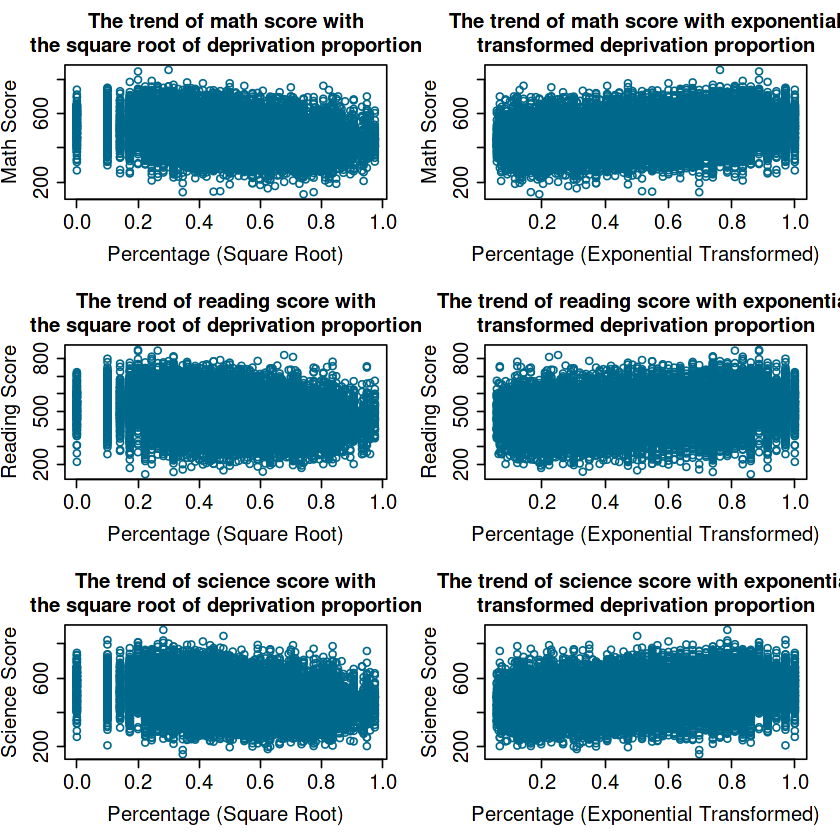

In [7]:
# Use the `boxTidwell` function in `car` package to improve the linear
# relationship between the response variable and the covariates

# The operation on the math subject
print("The operation on the math subject")
boxTidwell(get(math) ~ I(Deprived + 10^(-6)), data = GB.df)
boxTidwell(get(math) ~ exp(-Deprived), data = GB.df)
boxTidwell(get(math) ~ I(Total.Student + 10^(-6)), data = GB.df, max.iter = 100)

# The operation on the reading subject
print("The operation on the reading subject")
boxTidwell(get(reading) ~ I(Deprived + 10^(-6)), data = GB.df)
boxTidwell(get(reading) ~ exp(-Deprived), data = GB.df)
boxTidwell(get(reading) ~ I(Total.Student + 10^(-6)), data = GB.df, max.iter = 100)

# The operation on the science subject
print("The operation on the science subject")
boxTidwell(get(science) ~ I(Deprived + 10^(-6)), data = GB.df)
boxTidwell(get(science) ~ exp(-Deprived), data = GB.df)
boxTidwell(get(science) ~ I(Total.Student + 10^(-6)), data = GB.df, max.iter = 1000)

# Transform some variables to enhance the linear relationship
# Plot the math score against transformed variables
layout(matrix(c(1:6), 3, 2, byrow = TRUE))
attach(GB.df)
plot(sqrt(Deprived), GB.df[,math], col = "deepskyblue4",
     xlab = "Percentage (Square Root)", ylab = "Math Score",
     main = "The trend of math score with\nthe square root of deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(exp(-3*Deprived), GB.df[,math], col = "deepskyblue4",
     xlab = "Percentage (Exponential Transformed)", ylab = "Math Score",
     main = "The trend of math score with exponential\ntransformed deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)

# Transform some variables to enhance the linear relationship
# Plot the reading score against transformed variables
attach(GB.df)
plot(sqrt(Deprived), GB.df[,reading], col = "deepskyblue4",
     xlab = "Percentage (Square Root)", ylab = "Reading Score",
     main = "The trend of reading score with\nthe square root of deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(exp(-3*Deprived), GB.df[,reading], col = "deepskyblue4",
     xlab = "Percentage (Exponential Transformed)", ylab = "Reading Score",
     main = "The trend of reading score with exponential\ntransformed deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)

# Transform some variables to enhance the linear relationship
# Plot the science score against transformed variables
attach(GB.df)
plot(sqrt(Deprived), GB.df[,science], col = "deepskyblue4",
     xlab = "Percentage (Square Root)", ylab = "Science Score",
     main = "The trend of science score with\nthe square root of deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
plot(exp(-3*Deprived), GB.df[,science], col = "deepskyblue4",
     xlab = "Percentage (Exponential Transformed)", ylab = "Science Score",
     main = "The trend of science score with exponential\ntransformed deprivation proportion",
     cex.axis = 1.5, cex.lab = 1.5, cex.main = 1.5)
detach(GB.df)
graphics.off()

**2. Perform model selection to find the best model for each subject**

Model selection process for Math subject


Call:
lm(formula = formula.math1, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-390.14  -52.71    2.33   54.52  313.26 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           440.8698    11.8401  37.235  < 2e-16 ***
ISCED1                  4.8995    14.8407   0.330 0.741298    
ISCED2                 13.3462    11.4963   1.161 0.245685    
ISCED3                  8.0727    11.1509   0.724 0.469099    
ISCED4                  6.7961    11.1748   0.608 0.543084    
ISCED5                -10.2828    11.2225  -0.916 0.359536    
ISCED6                -13.8841    11.2908  -1.230 0.218829    
ESCS                   30.7809     0.8054  38.218  < 2e-16 ***
GenderMale             10.0374     1.0215   9.826  < 2e-16 ***
IMMIG2ndGener           2.4977     2.1921   1.139 0.254539    
IMMIG1stGener          -4.5874     1.8609  -2.465 0.013699 *  
TMINS                  -3.1658     0.4799  -6.597 4.26e-11 ***
RegionNorthIre         

Df    Sum Sq       Mean Sq      F value     
ISCED                     6 6.319967e+06  1053327.766  165.3482452
ESCS                      1 1.711256e+07 17112556.050 2686.2779153
Gender                    1 6.891736e+05   689173.581  108.1844094
IMMIG                     2 1.714454e+05    85722.705   13.4564941
TMINS                     1 3.420184e+05   342018.405   53.6890272
Region                    3 1.725032e+06   575010.558   90.2634392
I(exp(-3 * Deprived))     1 1.096181e+07 10961805.827 1720.7515242
Year                      1 6.265727e+04    62657.274    9.8357517
School.Type               1 2.860604e+05   286060.409   44.9049083
Total.Student             1 2.186942e+05   218694.208   34.3299633
Area.Type                 4 1.915101e+05    47877.514    7.5156690
Girl.Ratio                1 1.507836e+03     1507.836    0.2366957
Residuals             27951 1.780579e+08     6370.360           NA
                      Pr(>F)       
ISCED                 2.328940e-207
ESCS                   0.000000e+00
Gender                 2.723750e-25
IMMIG                  1.441221e-06
TMINS                  2.412270e-13
Region                 3.975646e-58
I(exp(-3 * Deprived))  0.000000e+00
Year                   1.713298e-03
School.Type            2.107665e-11
Total.Student          4.703752e-09
Area.Type              4.786444e-06
Girl.Ratio             6.266068e-01
Residuals                        NA

[1] "The AIC of the GLM model is: 324460.128507916"


GVIF     Df GVIF^(1/(2*Df))
ISCED                 2.087944 6  1.063269       
ESCS                  2.159087 1  1.469383       
Gender                1.145572 1  1.070314       
IMMIG                 1.174517 2  1.041034       
TMINS                 1.010122 1  1.005048       
Region                2.049472 3  1.127043       
I(exp(-3 * Deprived)) 1.212458 1  1.101117       
Year                  1.029883 1  1.014832       
School.Type           1.798849 1  1.341212       
Total.Student         1.135551 1  1.065622       
Area.Type             1.351606 4  1.038380       
Girl.Ratio            1.145513 1  1.070286


Call:
lm(formula = formula.math2, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-390.00  -52.67    2.34   54.48  313.86 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           441.6059    11.7429  37.606  < 2e-16 ***
ESCS                   30.7801     0.8054  38.218  < 2e-16 ***
GenderMale              9.8618     0.9556  10.320  < 2e-16 ***
IMMIG2ndGener           2.4985     2.1921   1.140 0.254374    
IMMIG1stGener          -4.5779     1.8607  -2.460 0.013890 *  
TMINS                  -3.1705     0.4798  -6.608 3.96e-11 ***
RegionNorthIre          1.9502     1.6328   1.194 0.232354    
RegionWales           -17.0832     1.5906 -10.740  < 2e-16 ***
RegionScotland         -6.8538     1.6215  -4.227 2.38e-05 ***
I(exp(-3 * Deprived))  91.1181     2.2853  39.872  < 2e-16 ***
Year2018                2.2287     0.9686   2.301 0.021403 *  
School.TypePrivate      9.4851     1.4023   6.764 1.37e-11 ***
Total.Student          

Df    Sum Sq       Mean Sq      F value     Pr(>F)      
ESCS                      1  21373692.23 21373692.231 3355.269965 0.000000e+00
Gender                    1    668570.82   668570.817  104.953115 1.382320e-24
IMMIG                     2    235860.42   117930.208   18.512837 9.232030e-09
TMINS                     1    340907.86   340907.857   53.516158 2.633703e-13
Region                    3   1869138.38   623046.126   97.806590 5.645523e-63
I(exp(-3 * Deprived))     1  11232825.34 11232825.344 1763.343511 0.000000e+00
Year                      1     54930.37    54930.370    8.623041 3.322078e-03
School.Type               1    331229.18   331229.181   51.996787 5.700298e-13
Total.Student             1    227175.86   227175.857   35.662361 2.374859e-09
Area.Type                 4    173489.80    43372.451    6.808664 1.792351e-05
ISCED                     6   1573099.23   262183.205   41.157860 3.113148e-50
Residuals             27952 178059426.35     6370.186          NA           NA

[1] "The AIC of the GLM model is: 324458.365405806"


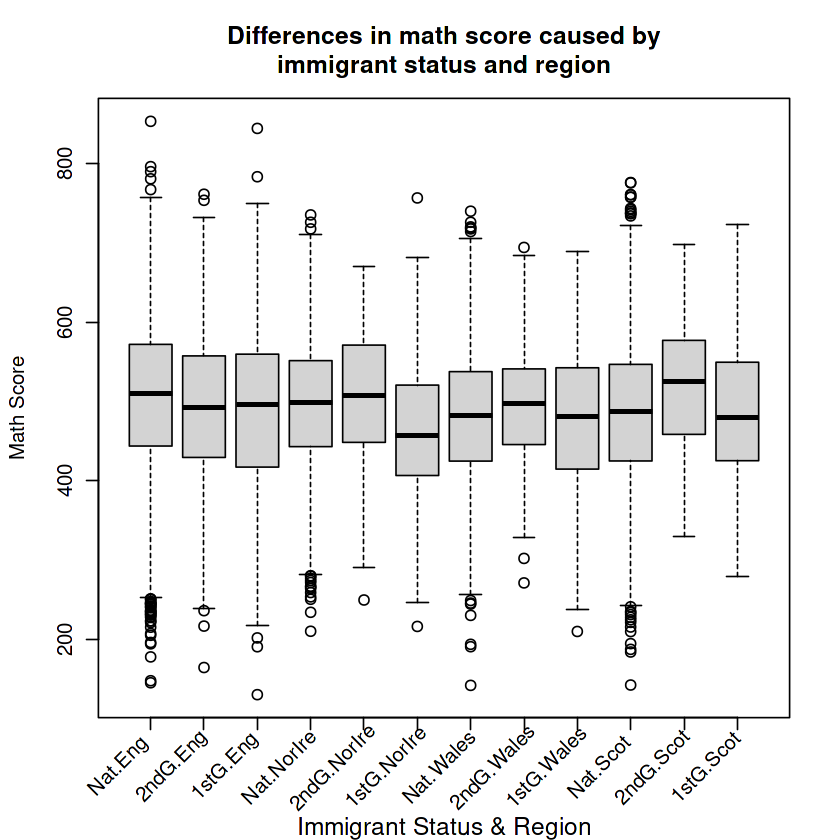

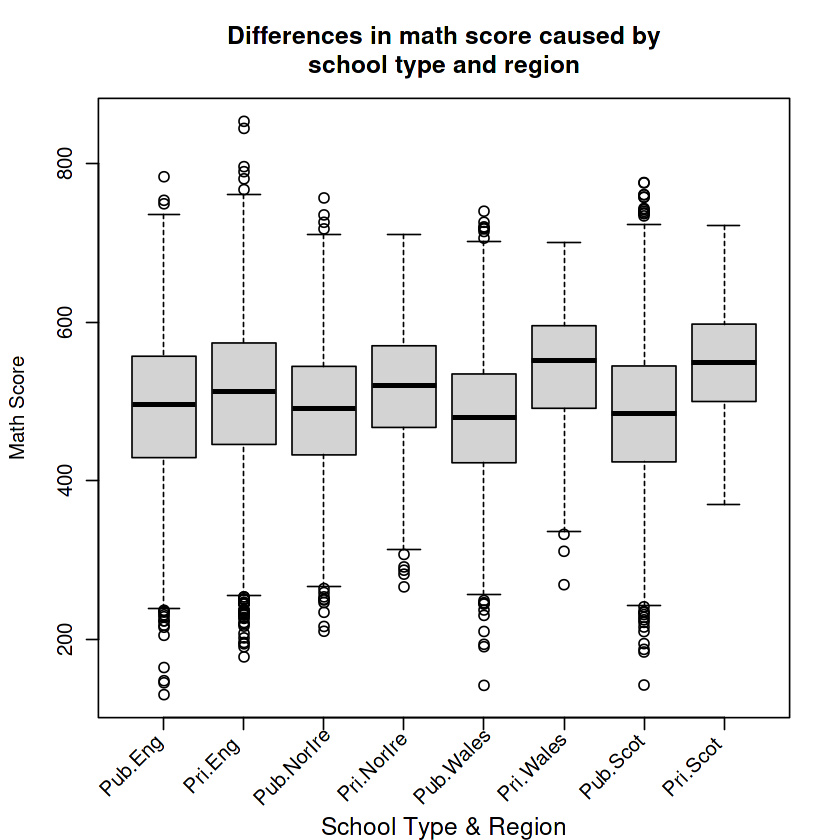


Call:
lm(formula = formula.math3, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-389.69  -52.55    2.34   54.31  317.97 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  440.4296    11.7405  37.514  < 2e-16 ***
ISCED1                         5.8765    14.8366   0.396 0.692048    
ISCED2                        14.9126    11.4921   1.298 0.194423    
ISCED3                         9.9574    11.1485   0.893 0.371775    
ISCED4                         8.6908    11.1722   0.778 0.436634    
ISCED5                        -8.4076    11.2195  -0.749 0.453639    
ISCED6                       -12.0890    11.2879  -1.071 0.284194    
ESCS                          30.7272     0.8050  38.172  < 2e-16 ***
GenderMale                    10.0032     0.9551  10.473  < 2e-16 ***
IMMIG2ndGener                 -2.1524     2.5842  -0.833 0.404907    
IMMIG1stGener                 -0.3826     2.8221  -0.136 0.892156    
TM

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6319966.59  1053327.766  165.658547 9.527106e-208
ESCS                      1  17112556.05 17112556.050 2691.319135  0.000000e+00
Gender                    1    689173.58   689173.581  108.387434  2.459580e-25
IMMIG                     2    171445.41    85722.705   13.481747  1.405317e-06
TMINS                     1    342018.40   342018.405   53.789783  2.291916e-13
Region                    3   1725031.67   575010.558   90.432833  3.094339e-58
I(exp(-3 * Deprived))     1  10961805.83 10961805.827 1723.980783  0.000000e+00
Year                      1     62657.27    62657.274    9.854210  1.696199e-03
School.Type               1    286060.41   286060.409   44.989179  2.019032e-11
Total.Student             1    218694.21   218694.208   34.394389  4.550790e-09
Area.Type                 4    191510.05    47877.514    7.529773  4.661637e-06
IMMIG:Region              6    366827.55    61137.925    9.615259  1.357918e-10
Residuals             27946 177692598.80     6358.427          NA            NA

[1] "The AIC of the GLM model is: 324412.673510397"



Call:
lm(formula = formula.math4, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-391.39  -52.57    2.25   54.30  318.58 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       440.67577   11.74999  37.504  < 2e-16 ***
ISCED1                              7.14919   14.83645   0.482 0.629904    
ISCED2                             16.20737   11.49399   1.410 0.158529    
ISCED3                             11.32776   11.15092   1.016 0.309705    
ISCED4                             10.12298   11.17510   0.906 0.365022    
ISCED5                             -6.83056   11.22349  -0.609 0.542798    
ISCED6                            -10.56841   11.29125  -0.936 0.349290    
ESCS                               30.50211    0.80672  37.810  < 2e-16 ***
GenderMale                          9.99213    0.95489  10.464  < 2e-16 ***
IMMIG2ndGener                      -2.35386    2.58412  -0.911 0.362358    
IMMIG1

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6319966.59  1053327.766  165.744950 7.431601e-208
ESCS                      1  17112556.05 17112556.050 2692.722852  0.000000e+00
Gender                    1    689173.58   689173.581  108.443966  2.390710e-25
IMMIG                     2    171445.41    85722.705   13.488779  1.395480e-06
TMINS                     1    342018.40   342018.405   53.817838  2.259490e-13
Region                    3   1725031.67   575010.558   90.480000  2.885879e-58
I(exp(-3 * Deprived))     1  10961805.83 10961805.827 1724.879963  0.000000e+00
Year                      1     62657.27    62657.274    9.859350  1.691468e-03
School.Type               1    286060.41   286060.409   45.012644  1.995025e-11
Total.Student             1    218694.21   218694.208   34.412328  4.509095e-09
Area.Type                 4    191510.05    47877.514    7.533701  4.627467e-06
IMMIG:Region              6    366827.55    61137.925    9.620275  1.339031e-10
Region:School.Type        3    111696.52    37232.175    5.858618  5.392673e-04
Residuals             27943 177580902.28     6355.112          NA            NA

[1] "The AIC of the GLM model is: 324401.083060559"



Call:
lm(formula = formula.math5, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-391.50  -52.62    2.28   54.36  318.90 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       440.0769    11.7473  37.462  < 2e-16 ***
ISCED1                              7.7563    14.8327   0.523 0.601036    
ISCED2                             15.3397    11.4924   1.335 0.181963    
ISCED3                             10.5065    11.1493   0.942 0.346022    
ISCED4                              9.3680    11.1732   0.838 0.401793    
ISCED5                             -7.6120    11.2217  -0.678 0.497570    
ISCED6                            -11.2760    11.2891  -0.999 0.317883    
ESCS                               41.3566     2.7023  15.304  < 2e-16 ***
GenderMale                         10.0273     0.9546  10.504  < 2e-16 ***
IMMIG2ndGener                      -2.2216     2.5835  -0.860 0.389845    
IMMIG1stGener    

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6319966.59  1053327.766  165.844081 5.584659e-208
ESCS                      1  17112556.05 17112556.050 2694.333356  0.000000e+00
Gender                    1    689173.58   689173.581  108.508826  2.314045e-25
IMMIG                     2    171445.41    85722.705   13.496847  1.384279e-06
TMINS                     1    342018.40   342018.405   53.850027  2.222847e-13
Region                    3   1725031.67   575010.558   90.534116  2.663802e-58
I(exp(-3 * Deprived))     1  10961805.83 10961805.827 1725.911606  0.000000e+00
Year                      1     62657.27    62657.274    9.865247  1.686057e-03
School.Type               1    286060.41   286060.409   45.039566  1.967830e-11
Total.Student             1    218694.21   218694.208   34.432910  4.461725e-09
Area.Type                 4    191510.05    47877.514    7.538207  4.588568e-06
IMMIG:Region              6    366827.55    61137.925    9.626028  1.317681e-10
Region:School.Type        3    111696.52    37232.175    5.862122  5.365867e-04
ESCS:TMINS                1    112498.08   112498.083   17.712570  2.577253e-05
Residuals             27942 177468404.20     6351.314          NA            NA

[1] "The AIC of the GLM model is: 324385.355190485"


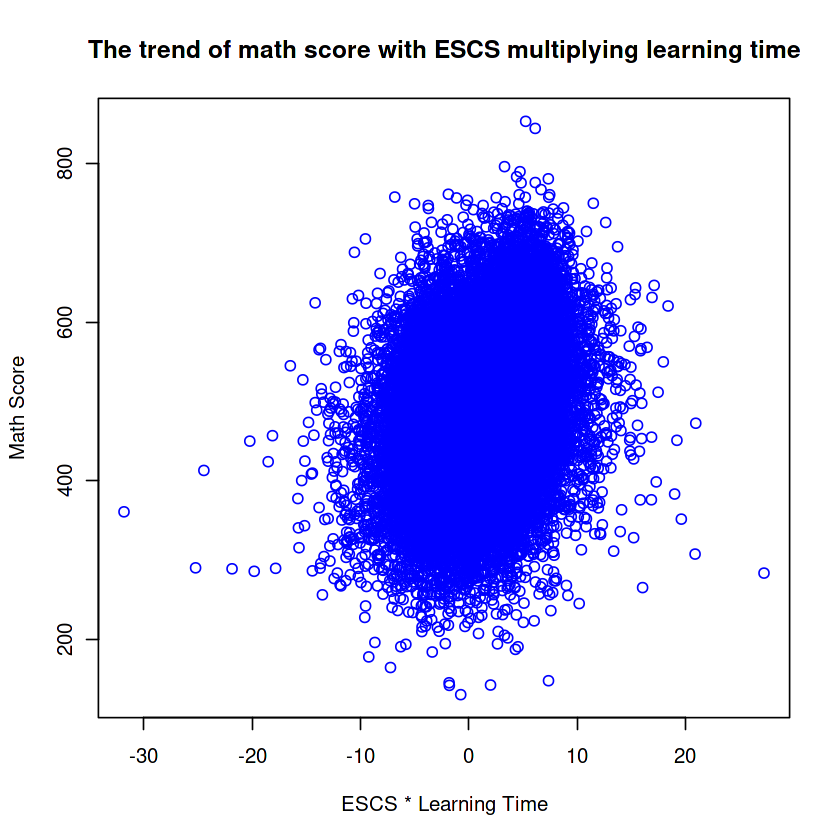

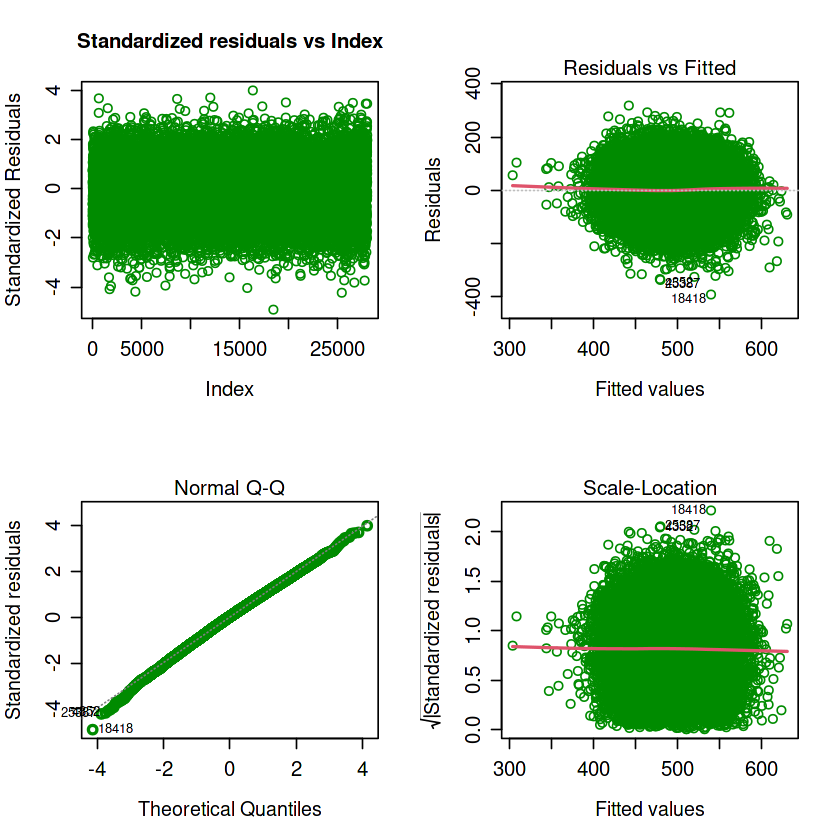

In [8]:
# Model selection for Math subject: Step one
formula.math1 = "get(math) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + Girl.Ratio"
fit.math1 = lm(formula.math1, data = GB.df)
summary(fit.math1)
anova(fit.math1)
print(paste("The AIC of the GLM model is:", AIC(fit.math1)))
vif(fit.math1)

# Model selection for Math subject: Step two
formula.math2 = "get(math) ~ ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + ISCED"
fit.math2 = lm(formula.math2, data = GB.df)
summary(fit.math2)
anova(fit.math2)
print(paste("The AIC of the GLM model is:", AIC(fit.math2)))

# Visualize the relationship between the math scores and some intersection terms
attach(GB.df)
names = c("Nat.Eng", "2ndG.Eng", "1stG.Eng", "Nat.NorIre", "2ndG.NorIre", "1stG.NorIre",
          "Nat.Wales", "2ndG.Wales", "1stG.Wales", "Nat.Scot", "2ndG.Scot", "1stG.Scot")
boxplot(formula = GB.df[, math] ~ IMMIG*Region, xaxt = "n",
        xlab = "", ylab = "Math Score", cex.main = 1.2,
        main = "Differences in math score caused by\nimmigrant status and region")
axis(side = 1, at = 1:12, labels = rep("", 12))
text(x = 1:12 - 0.6, y = 40, labels = names, xpd = TRUE, srt = 45)
title(xlab = "Immigrant Status & Region", line = 4, cex.lab = 1.2)
names = c("Pub.Eng", "Pri.Eng", "Pub.NorIre", "Pri.NorIre",
          "Pub.Wales", "Pri.Wales", "Pub.Scot", "Pri.Scot")
boxplot(formula = GB.df[, math] ~ School.Type*Region, xaxt = "n",
        xlab = "", ylab = "Math Score", cex.main = 1.2,
        main = "Differences in math score caused by\nschool type and region")
axis(side = 1, at = 1:8, labels = rep("", 8))
text(x = 1:8 - 0.4, y = 40, labels = names, xpd = TRUE, srt = 45)
title(xlab = "School Type & Region", line = 4, cex.lab = 1.2)
plot(ESCS*TMINS, GB.df[, math], col = "blue",
     xlab = "ESCS * Learning Time", ylab = "Math Score", cex.main = 1.2,
     main = "The trend of math score with ESCS multiplying learning time")
detach(GB.df)

# Model selection for Math subject: Step three
formula.math3 = "get(math) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + IMMIG:Region"
fit.math3 = lm(formula.math3, data = GB.df)
summary(fit.math3)
anova(fit.math3)
print(paste("The AIC of the GLM model is:", AIC(fit.math3)))

# Model selection for Math subject: Step four
formula.math4 = "get(math) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + IMMIG:Region + School.Type:Region"
fit.math4 = lm(formula.math4, data = GB.df)
summary(fit.math4)
anova(fit.math4)
print(paste("The AIC of the GLM model is:", AIC(fit.math4)))

# Model selection for Math subject: Step five
formula.math5 = "get(math) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + IMMIG:Region +
  School.Type:Region + ESCS:TMINS"
fit.math5 = lm(formula.math5, data = GB.df)
summary(fit.math5)
anova(fit.math5)
print(paste("The AIC of the GLM model is:", AIC(fit.math5)))

# Check the model assumptions
par(mfrow = c(2, 2))
plot(rstudent(fit.math5), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.math5, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
graphics.off()

Model selection process for Reading subject


Call:
lm(formula = formula.reading1, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.94  -58.21    1.74   60.48  320.14 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            448.5768    13.1447  34.126  < 2e-16 ***
ISCED1                  -5.7394    16.2924  -0.352 0.724634    
ISCED2                  15.8493    12.6208   1.256 0.209196    
ISCED3                  16.3091    12.2416   1.332 0.182783    
ISCED4                  11.8189    12.2679   0.963 0.335355    
ISCED5                  -4.9065    12.3203  -0.398 0.690455    
ISCED6                 -10.2373    12.3953  -0.826 0.408867    
ESCS                    31.8162     0.8842  35.984  < 2e-16 ***
GenderMale             -18.7688     1.1214 -16.736  < 2e-16 ***
IMMIG2ndGener           -1.5305     2.4064  -0.636 0.524769    
IMMIG1stGener          -14.1252     2.0431  -6.914 4.83e-12 ***
TMINS                   -3.7080     0.5268  -7.038 1.99e-12 ***
RegionN

Df    Sum Sq       Mean Sq      F value    
ISCED                      6   5587886.12   931314.353  121.302140
ESCS                       1  17763707.08 17763707.076 2313.693206
Gender                     1   2631987.45  2631987.451  342.811974
IMMIG                      2    449167.86   224583.932   29.251682
TMINS                      1    410038.40   410038.405   53.406818
Region                     3   2518440.79   839480.263  109.340903
I(exp(-3 * Deprived))      1   8787368.18  8787368.176 1144.540042
Year                       1     35409.17    35409.173    4.611986
School.Type                1    258102.31   258102.312   33.617395
I(sqrt(Total.Student))     1    534024.21   534024.212   69.555763
Area.Type                  4    544428.35   136107.088   17.727721
Girl.Ratio                 1     18140.00    18139.997    2.362704
Residuals              27951 214597758.76     7677.642          NA
                       Pr(>F)       
ISCED                  6.041450e-152
ESCS                    0.000000e+00
Gender                  4.445523e-76
IMMIG                   2.039071e-13
TMINS                   2.784151e-13
Region                  2.208920e-70
I(exp(-3 * Deprived))  6.323481e-246
Year                    3.175782e-02
School.Type             6.781135e-09
I(sqrt(Total.Student))  7.765969e-17
Area.Type               1.520858e-14
Girl.Ratio              1.242779e-01
Residuals                         NA

[1] "The AIC of the GLM model is: 329681.844208493"



Call:
lm(formula = formula.reading2, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.83  -58.15    1.78   60.47  320.38 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            451.0924    13.0427  34.586  < 2e-16 ***
ESCS                    31.8133     0.8842  35.979  < 2e-16 ***
GenderMale             -19.3779     1.0492 -18.470  < 2e-16 ***
IMMIG2ndGener           -1.5278     2.4065  -0.635 0.525508    
IMMIG1stGener          -14.0914     2.0431  -6.897 5.42e-12 ***
TMINS                   -3.7240     0.5267  -7.070 1.59e-12 ***
RegionNorthIre           6.9442     1.7945   3.870 0.000109 ***
RegionWales            -20.2305     1.7475 -11.577  < 2e-16 ***
RegionScotland          -0.2399     1.7818  -0.135 0.892911    
I(exp(-3 * Deprived))   82.4294     2.5081  32.865  < 2e-16 ***
Year2018                 1.4342     1.0634   1.349 0.177472    
School.TypePrivate       9.3870     1.5409   6.092 1.13e-09 ***
I(sqrt(

Df    Sum Sq       Mean Sq      F value    
ESCS                       1  20765422.12 20765422.125 2704.529732
Gender                     1   2699368.57  2699368.571  351.571113
IMMIG                      2    631154.66   315577.328   41.101417
TMINS                      1    407138.54   407138.542   53.026531
Region                     3   2675788.44   891929.479  116.166663
I(exp(-3 * Deprived))      1   9021536.72  9021536.721 1174.982822
Year                       1     28006.49    28006.494    3.647621
School.Type                1    301719.12   301719.120   39.296496
I(sqrt(Total.Student))     1    542733.75   542733.752   70.686719
Area.Type                  4    498945.08   124736.269   16.245899
ISCED                      6   1948746.43   324791.072   42.301433
Residuals              27952 214615898.75     7678.016          NA
                       Pr(>F)       
ESCS                    0.000000e+00
Gender                  5.805488e-78
IMMIG                   1.499952e-18
TMINS                   3.377607e-13
Region                  9.197351e-75
I(exp(-3 * Deprived))  2.806125e-252
Year                    5.615958e-02
School.Type             3.694095e-10
I(sqrt(Total.Student))  4.383542e-17
Area.Type               2.687380e-13
ISCED                   1.096196e-51
Residuals                         NA

[1] "The AIC of the GLM model is: 329682.208841592"


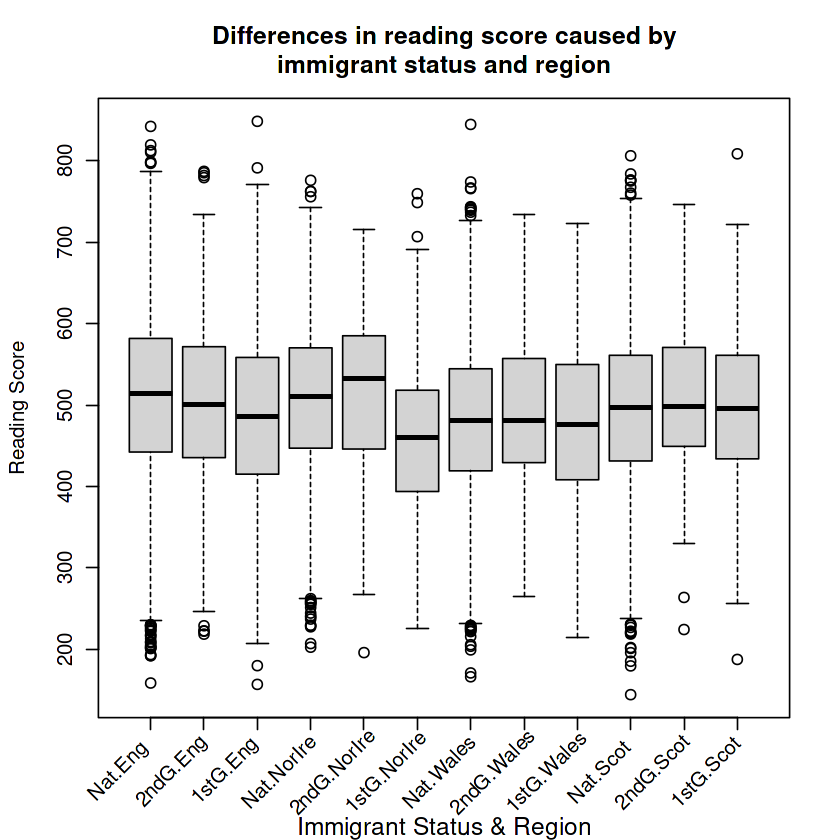

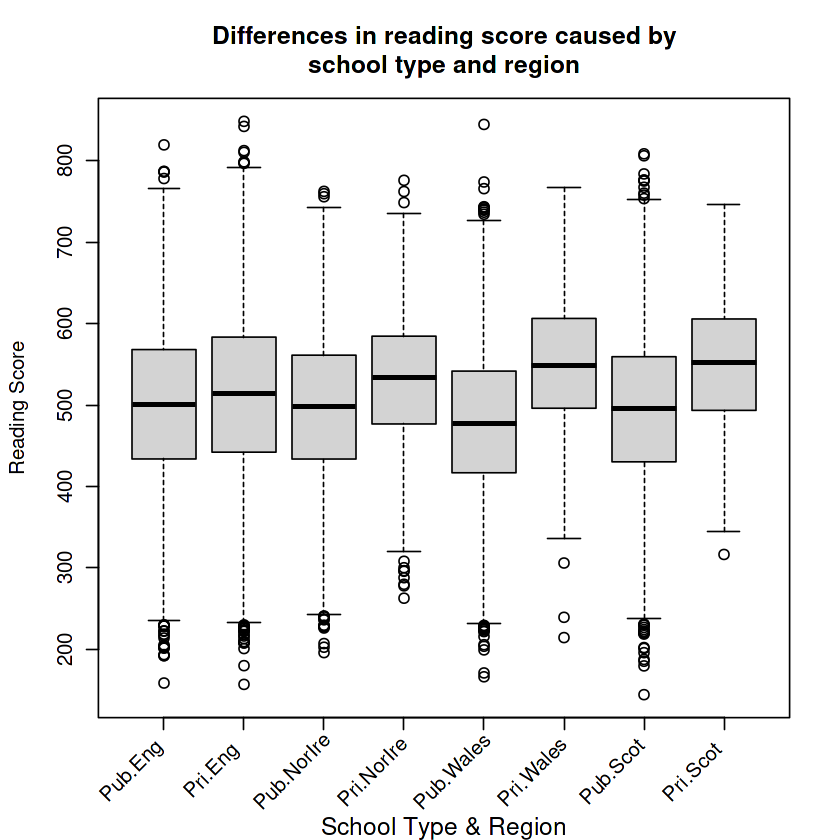


Call:
lm(formula = formula.reading3, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-394.30  -58.25    1.80   60.43  318.85 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  450.2479    13.0427  34.521  < 2e-16 ***
ISCED1                        -4.8326    16.2920  -0.297   0.7668    
ISCED2                        17.1263    12.6194   1.357   0.1747    
ISCED3                        17.7945    12.2420   1.454   0.1461    
ISCED4                        13.3573    12.2680   1.089   0.2763    
ISCED5                        -3.4093    12.3200  -0.277   0.7820    
ISCED6                        -8.8587    12.3951  -0.715   0.4748    
ESCS                          31.7704     0.8839  35.942  < 2e-16 ***
GenderMale                   -19.2085     1.0488 -18.315  < 2e-16 ***
IMMIG2ndGener                 -3.7507     2.8376  -1.322   0.1863    
IMMIG1stGener                -12.6480     3.0991  -4.081 4.49e-05 ***

Df    Sum Sq       Mean Sq      F value    
ISCED                      6   5587886.12   931314.353  121.470550
ESCS                       1  17763707.08 17763707.076 2316.905407
Gender                     1   2631987.45  2631987.451  343.287915
IMMIG                      2    449167.86   224583.932   29.292294
TMINS                      1    410038.40   410038.405   53.480965
Region                     3   2518440.79   839480.263  109.492706
I(exp(-3 * Deprived))      1   8787368.18  8787368.176 1146.129057
Year                       1     35409.17    35409.173    4.618389
School.Type                1    258102.31   258102.312   33.664068
I(sqrt(Total.Student))     1    534024.21   534024.212   69.652330
Area.Type                  4    544428.35   136107.088   17.752333
IMMIG:Region               6    353997.33    58999.554    7.695262
Residuals              27946 214261901.43     7666.997          NA
                       Pr(>F)       
ISCED                  3.705271e-152
ESCS                    0.000000e+00
Gender                  3.512463e-76
IMMIG                   1.958097e-13
TMINS                   2.681232e-13
Region                  1.765252e-70
I(exp(-3 * Deprived))  2.951660e-246
Year                    3.163950e-02
School.Type             6.620570e-09
I(sqrt(Total.Student))  7.395873e-17
Area.Type               1.449949e-14
IMMIG:Region            2.780606e-08
Residuals                         NA

[1] "The AIC of the GLM model is: 329648.0274936"



Call:
lm(formula = formula.reading4, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-392.59  -58.14    1.85   60.19  321.22 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       450.5982    13.0517  34.524  < 2e-16 ***
ISCED1                             -2.7538    16.2854  -0.169  0.86572    
ISCED2                             19.3274    12.6165   1.532  0.12555    
ISCED3                             20.0931    12.2399   1.642  0.10068    
ISCED4                             15.7312    12.2665   1.282  0.19969    
ISCED5                             -0.8467    12.3196  -0.069  0.94521    
ISCED6                             -6.3911    12.3940  -0.516  0.60609    
ESCS                               31.4749     0.8856  35.542  < 2e-16 ***
GenderMale                        -19.2309     1.0481 -18.348  < 2e-16 ***
IMMIG2ndGener                      -4.1015     2.8365  -1.446  0.14819    
IMMIG1stGener 

Df    Sum Sq       Mean Sq      F value    
ISCED                      6   5587886.12   931314.353  121.628931
ESCS                       1  17763707.08 17763707.076 2319.926349
Gender                     1   2631987.45  2631987.451  343.735517
IMMIG                      2    449167.86   224583.932   29.330487
TMINS                      1    410038.40   410038.405   53.550697
Region                     3   2518440.79   839480.263  109.635470
I(exp(-3 * Deprived))      1   8787368.18  8787368.176 1147.623459
Year                       1     35409.17    35409.173    4.624411
School.Type                1    258102.31   258102.312   33.707961
I(sqrt(Total.Student))     1    534024.21   534024.212   69.743147
Area.Type                  4    544428.35   136107.088   17.775480
IMMIG:Region               6    353997.33    58999.554    7.705296
Region:School.Type         3    301976.75   100658.915   13.145976
Residuals              27943 213959924.68     7657.013          NA
                       Pr(>F)       
ISCED                  2.338985e-152
ESCS                    0.000000e+00
Gender                  2.814280e-76
IMMIG                   1.884878e-13
TMINS                   2.587913e-13
Region                  1.429576e-70
I(exp(-3 * Deprived))  1.440800e-246
Year                    3.152864e-02
School.Type             6.473038e-09
I(sqrt(Total.Student))  7.063910e-17
Area.Type               1.386276e-14
IMMIG:Region            2.705019e-08
Region:School.Type      1.420440e-08
Residuals                         NA

[1] "The AIC of the GLM model is: 329614.572237634"



Call:
lm(formula = formula.reading5, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.96  -58.19    1.92   60.13  322.95 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       450.1255    13.0505  34.491  < 2e-16 ***
ISCED1                             -2.2565    16.2836  -0.139  0.88979    
ISCED2                             18.6173    12.6165   1.476  0.14005    
ISCED3                             19.4211    12.2399   1.587  0.11259    
ISCED4                             15.1134    12.2661   1.232  0.21791    
ISCED5                             -1.4861    12.3193  -0.121  0.90398    
ISCED6                             -6.9702    12.3934  -0.562  0.57384    
ESCS                               40.3613     2.9666  13.605  < 2e-16 ***
GenderMale                        -19.2022     1.0480 -18.323  < 2e-16 ***
IMMIG2ndGener                      -3.9934     2.8362  -1.408  0.15914    
IMMIG1stGener 

Df    Sum Sq       Mean Sq      F value    
ISCED                      6   5587886.12   931314.353  121.667456
ESCS                       1  17763707.08 17763707.076 2320.661161
Gender                     1   2631987.45  2631987.451  343.844392
IMMIG                      2    449167.86   224583.932   29.339777
TMINS                      1    410038.40   410038.405   53.567659
Region                     3   2518440.79   839480.263  109.670196
I(exp(-3 * Deprived))      1   8787368.18  8787368.176 1147.986957
Year                       1     35409.17    35409.173    4.625875
School.Type                1    258102.31   258102.312   33.718638
I(sqrt(Total.Student))     1    534024.21   534024.212   69.765238
Area.Type                  4    544428.35   136107.088   17.781110
IMMIG:Region               6    353997.33    58999.554    7.707737
Region:School.Type         3    301976.75   100658.915   13.150140
ESCS:TMINS                 1     75402.68    75402.681    9.850651
Residuals              27942 213884522.00     7654.589          NA
                       Pr(>F)       
ISCED                  2.091462e-152
ESCS                    0.000000e+00
Gender                  2.666622e-76
IMMIG                   1.867487e-13
TMINS                   2.565711e-13
Region                  1.358098e-70
I(exp(-3 * Deprived))  1.210301e-246
Year                    3.150174e-02
School.Type             6.437653e-09
I(sqrt(Total.Student))  6.985447e-17
Area.Type               1.371216e-14
IMMIG:Region            2.686945e-08
Region:School.Type      1.411822e-08
ESCS:TMINS              1.699483e-03
Residuals                         NA

[1] "The AIC of the GLM model is: 329606.711691221"


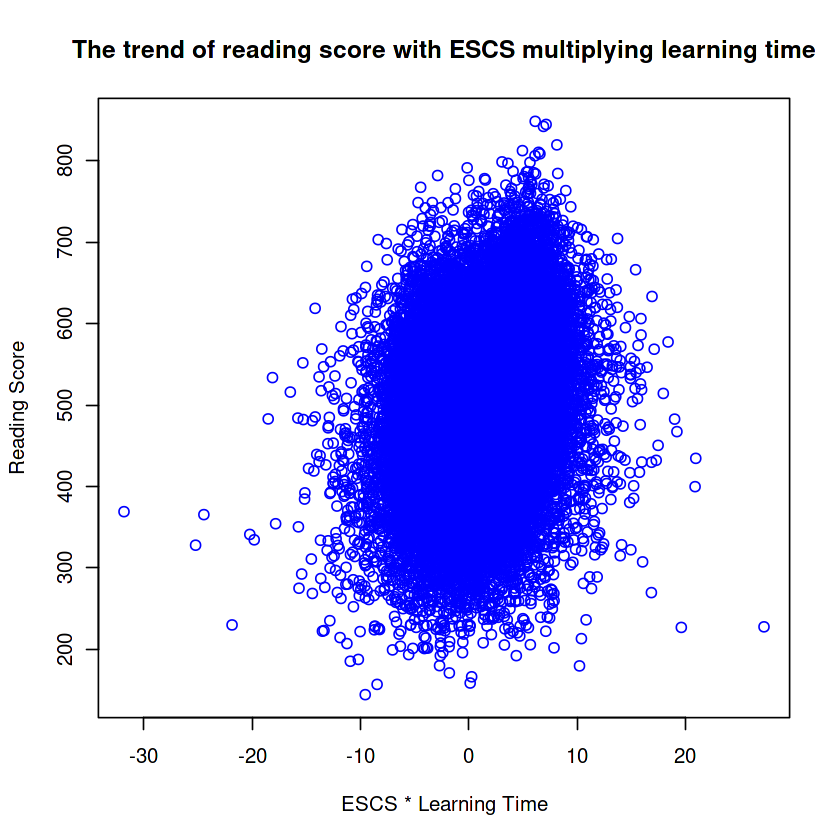

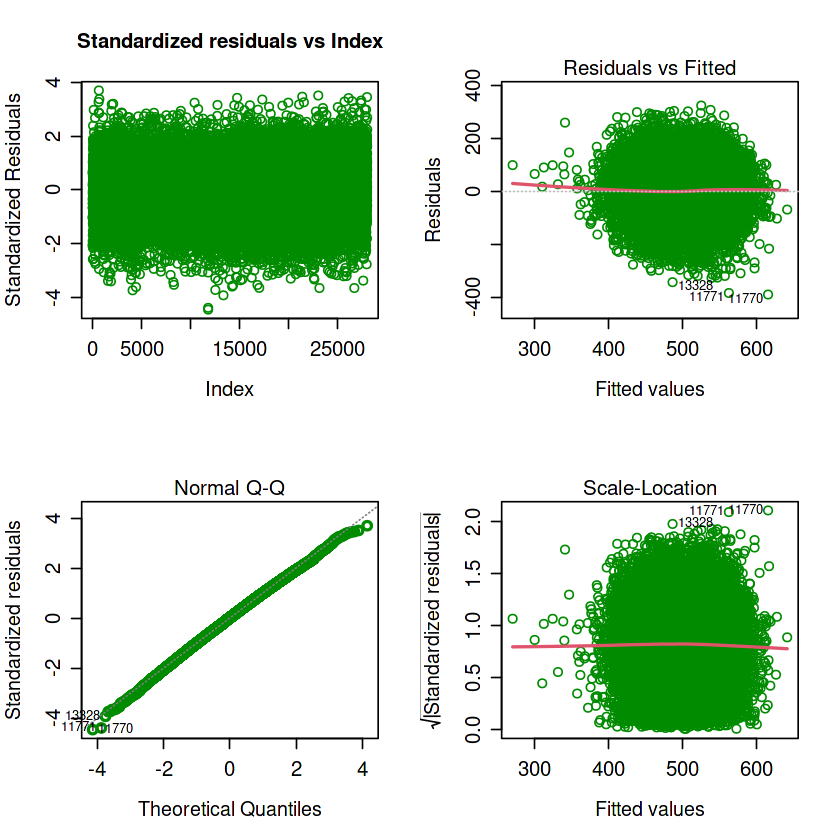

In [9]:
# Model selection for Reading subject: Step one
formula.reading1 = "get(reading) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  I(sqrt(Total.Student)) + Area.Type + Girl.Ratio"
fit.reading1 = lm(formula.reading1, data = GB.df)
summary(fit.reading1)
anova(fit.reading1)
print(paste("The AIC of the GLM model is:", AIC(fit.reading1)))

# Model selection for Reading subject: Step two
formula.reading2 = "get(reading) ~ ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  I(sqrt(Total.Student)) + Area.Type + ISCED"
fit.reading2 = lm(formula.reading2, data = GB.df)
summary(fit.reading2)
anova(fit.reading2)
print(paste("The AIC of the GLM model is:", AIC(fit.reading2)))

# Visualize the relationship between the reading scores and some intersection terms
attach(GB.df)
names = c("Nat.Eng", "2ndG.Eng", "1stG.Eng", "Nat.NorIre", "2ndG.NorIre", "1stG.NorIre",
          "Nat.Wales", "2ndG.Wales", "1stG.Wales", "Nat.Scot", "2ndG.Scot", "1stG.Scot")
boxplot(formula = GB.df[, reading] ~ IMMIG*Region, xaxt = "n",
        xlab = "", ylab = "Reading Score", cex.main = 1.2,
        main = "Differences in reading score caused by\nimmigrant status and region")
axis(side = 1, at = 1:12, labels = rep("", 12))
text(x = 1:12 - 0.6, y = 50, labels = names, xpd = TRUE, srt = 45)
title(xlab = "Immigrant Status & Region", line = 4, cex.lab = 1.2)
names = c("Pub.Eng", "Pri.Eng", "Pub.NorIre", "Pri.NorIre",
          "Pub.Wales", "Pri.Wales", "Pub.Scot", "Pri.Scot")
boxplot(formula = GB.df[, reading] ~ School.Type*Region, xaxt = "n",
        xlab = "", ylab = "Reading Score", cex.main = 1.2,
        main = "Differences in reading score caused by\nschool type and region")
axis(side = 1, at = 1:8, labels = rep("", 8))
text(x = 1:8 - 0.4, y = 50, labels = names, xpd = TRUE, srt = 45)
title(xlab = "School Type & Region", line = 4, cex.lab = 1.2)
plot(ESCS*TMINS, GB.df[, reading], col = "blue",
     xlab = "ESCS * Learning Time", ylab = "Reading Score", cex.main = 1.2,
     main = "The trend of reading score with ESCS multiplying learning time")
detach(GB.df)

# Model selection for Reading subject: Step three
formula.reading3 = "get(reading) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  I(sqrt(Total.Student)) + Area.Type + IMMIG:Region"
fit.reading3 = lm(formula.reading3, data = GB.df)
summary(fit.reading3)
anova(fit.reading3)
print(paste("The AIC of the GLM model is:", AIC(fit.reading3)))

# Model selection for Reading subject: Step four
formula.reading4 = "get(reading) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  I(sqrt(Total.Student)) + Area.Type + IMMIG:Region + School.Type:Region"
fit.reading4 = lm(formula.reading4, data = GB.df)
summary(fit.reading4)
anova(fit.reading4)
print(paste("The AIC of the GLM model is:", AIC(fit.reading4)))

# Model selection for Reading subject: Step five
formula.reading5 = "get(reading) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  I(sqrt(Total.Student)) + Area.Type +
  IMMIG:Region + School.Type:Region + ESCS:TMINS"
fit.reading5 = lm(formula.reading5, data = GB.df)
summary(fit.reading5)
anova(fit.reading5)
print(paste("The AIC of the GLM model is:", AIC(fit.reading5)))

# Check the model assumptions
par(mfrow = c(2, 2))
plot(rstudent(fit.reading5), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.reading5, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
graphics.off()

Model selection process for Science subject


Call:
lm(formula = formula.science1, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.35  -60.86    1.72   60.89  393.65 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           465.2733    13.0314  35.704  < 2e-16 ***
ISCED1                 -5.7930    16.3339  -0.355 0.722847    
ISCED2                  3.5278    12.6530   0.279 0.780393    
ISCED3                  1.5639    12.2728   0.127 0.898603    
ISCED4                 -1.4542    12.2992  -0.118 0.905880    
ISCED5                -16.1631    12.3517  -1.309 0.190691    
ISCED6                -21.2491    12.4269  -1.710 0.087290 .  
ESCS                   32.0206     0.8864  36.123  < 2e-16 ***
GenderMale              1.6057     1.1243   1.428 0.153243    
IMMIG2ndGener          -9.1973     2.4127  -3.812 0.000138 ***
IMMIG1stGener         -10.9799     2.0481  -5.361 8.34e-08 ***
TMINS                  -3.2226     0.5282  -6.102 1.06e-09 ***
RegionNorthIre      

Df    Sum Sq       Mean Sq      F value     
ISCED                     6 6.924951e+06  1154158.441  149.5646649
ESCS                      1 1.951780e+07 19517798.316 2529.2653599
Gender                    1 2.202163e+04    22021.627    2.8537306
IMMIG                     2 2.749972e+05   137498.579   17.8181159
TMINS                     1 4.201592e+05   420159.243   54.4474434
Region                    3 3.345281e+06  1115093.744  144.5023632
I(exp(-3 * Deprived))     1 1.267746e+07 12677455.559 1642.8415069
Year                      1 2.483404e+05   248340.422   32.1818484
School.Type               1 4.538073e+05   453807.291   58.8078145
Total.Student             1 2.019526e+05   201952.628   26.1705638
Area.Type                 4 2.680269e+05    67006.737    8.6832447
Girl.Ratio                1 1.322469e+03     1322.469    0.1713757
Residuals             27951 2.156919e+08     7716.786           NA
                      Pr(>F)       
ISCED                 1.495863e-187
ESCS                   0.000000e+00
Gender                 9.117333e-02
IMMIG                  1.847649e-08
TMINS                  1.641041e-13
Region                 6.393971e-93
I(exp(-3 * Deprived))  0.000000e+00
Year                   1.417824e-08
School.Type            1.794904e-14
Total.Student          3.146152e-07
Area.Type              5.321424e-07
Girl.Ratio             6.788953e-01
Residuals                        NA

[1] "The AIC of the GLM model is: 329824.110658663"



Call:
lm(formula = formula.science2, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.28  -60.85    1.73   60.94  393.58 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           465.9626    12.9244  36.053  < 2e-16 ***
ESCS                   32.0199     0.8864  36.123  < 2e-16 ***
GenderMale              1.4413     1.0518   1.370 0.170592    
IMMIG2ndGener          -9.1965     2.4126  -3.812 0.000138 ***
IMMIG1stGener         -10.9710     2.0480  -5.357 8.53e-08 ***
TMINS                  -3.2269     0.5280  -6.111 1.00e-09 ***
RegionNorthIre         -3.8390     1.7971  -2.136 0.032670 *  
RegionWales           -22.5497     1.7506 -12.881  < 2e-16 ***
RegionScotland        -12.0090     1.7847  -6.729 1.74e-11 ***
I(exp(-3 * Deprived))  97.9968     2.5152  38.962  < 2e-16 ***
Year2018               -6.6599     1.0661  -6.247 4.24e-10 ***
School.TypePrivate     12.0101     1.5434   7.782 7.40e-15 ***
Total.Student       

Df    Sum Sq       Mean Sq      F value     Pr(>F)      
ESCS                      1  24306825.01 24306825.008 3149.957391 0.000000e+00
Gender                    1     17243.27    17243.268    2.234581 1.349645e-01
IMMIG                     2    430897.64   215448.822   27.920331 7.699277e-13
TMINS                     1    419450.53   419450.525   54.357214 1.717993e-13
Region                    3   3539467.19  1179822.395  152.894929 2.731322e-98
I(exp(-3 * Deprived))     1  12955883.29 12955883.293 1678.972071 0.000000e+00
Year                      1    268354.25   268354.248   34.776424 3.740734e-09
School.Type               1    507521.13   507521.130   65.770414 5.271992e-16
Total.Student             1    207484.04   207484.037   26.888163 2.170756e-07
Area.Type                 4    243618.81    60904.702    7.892730 2.359405e-06
ISCED                     6   1458045.92   243007.654   31.491721 5.768369e-38
Residuals             27952 215693194.66     7716.557          NA           NA

[1] "The AIC of the GLM model is: 329822.282180959"


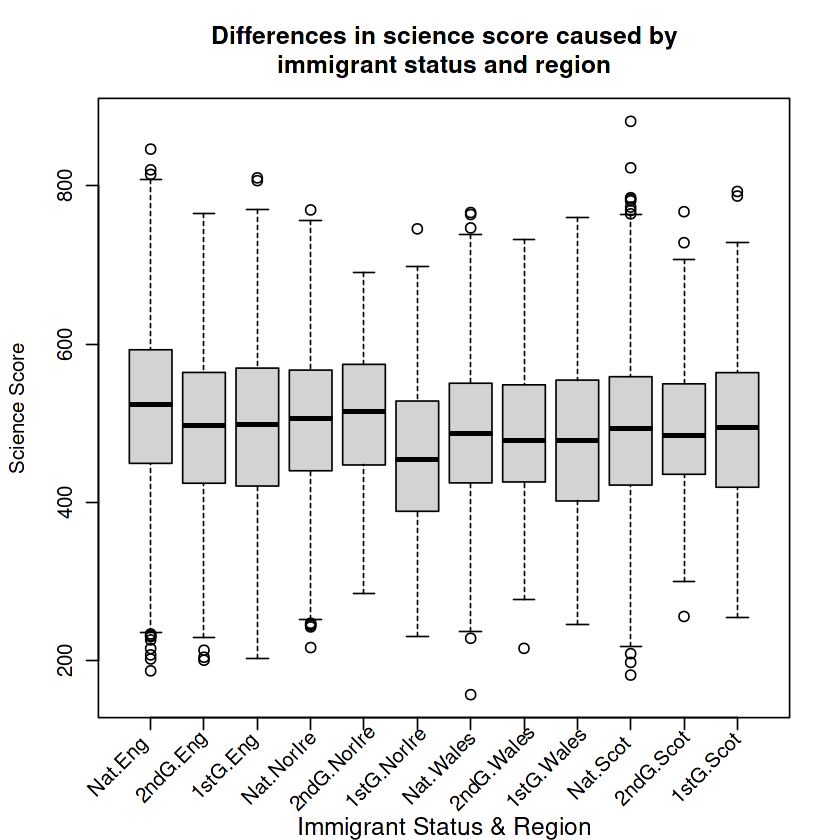

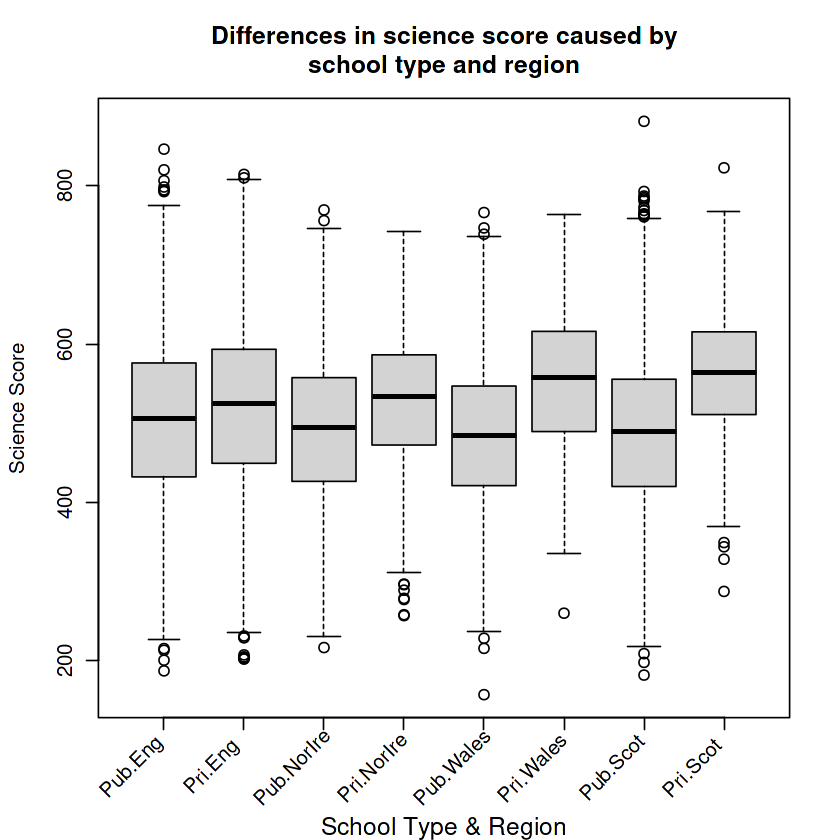


Call:
lm(formula = formula.science3, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-332.87  -60.46    1.62   60.84  370.71 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  464.9995    12.9223  35.984  < 2e-16 ***
ISCED1                        -5.2405    16.3302  -0.321 0.748280    
ISCED2                         4.5535    12.6490   0.360 0.718860    
ISCED3                         2.8597    12.2707   0.233 0.815725    
ISCED4                        -0.1443    12.2968  -0.012 0.990636    
ISCED5                       -14.8931    12.3489  -1.206 0.227820    
ISCED6                       -20.1071    12.4242  -1.618 0.105591    
ESCS                          31.9913     0.8860  36.108  < 2e-16 ***
GenderMale                     1.6381     1.0512   1.558 0.119177    
IMMIG2ndGener                -11.3290     2.8443  -3.983 6.82e-05 ***
IMMIG1stGener                 -7.3813     3.1062  -2.376 0.017493 *  

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6924950.65  1154158.441  149.832427 6.901212e-188
ESCS                      1  19517798.32 19517798.316 2533.793452  0.000000e+00
Gender                    1     22021.63    22021.627    2.858840  9.088419e-02
IMMIG                     2    274997.16   137498.579   17.850015  1.789716e-08
TMINS                     1    420159.24   420159.243   54.544920  1.561786e-13
Region                    3   3345281.23  1115093.744  144.761063  4.368452e-93
I(exp(-3 * Deprived))     1  12677455.56 12677455.559 1645.782652  0.000000e+00
Year                      1    248340.42   248340.422   32.239463  1.376448e-08
School.Type               1    453807.29   453807.291   58.913097  1.701589e-14
Total.Student             1    201952.63   201952.628   26.217416  3.070810e-07
Area.Type                 4    268026.95    67006.737    8.698790  5.167452e-07
IMMIG:Region              6    425296.09    70882.682    9.201964  4.300600e-10
Residuals             27946 215267898.56     7702.995          NA            NA

[1] "The AIC of the GLM model is: 329779.067627843"



Call:
lm(formula = formula.science4, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-332.31  -60.58    1.84   60.86  371.36 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       465.7825    12.9321  36.018  < 2e-16 ***
ISCED1                             -3.6199    16.3290  -0.222 0.824560    
ISCED2                              6.1956    12.6503   0.490 0.624310    
ISCED3                              4.5736    12.2727   0.373 0.709401    
ISCED4                              1.6511    12.2993   0.134 0.893211    
ISCED5                            -12.9303    12.3526  -1.047 0.295217    
ISCED6                            -18.2226    12.4272  -1.466 0.142563    
ESCS                               31.7269     0.8879  35.734  < 2e-16 ***
GenderMale                          1.6179     1.0509   1.539 0.123712    
IMMIG2ndGener                     -11.5934     2.8441  -4.076 4.59e-05 ***
IMMIG1stGener 

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6924950.65  1154158.441  149.927924 5.238884e-188
ESCS                      1  19517798.32 19517798.316 2535.408382  0.000000e+00
Gender                    1     22021.63    22021.627    2.860662  9.078131e-02
IMMIG                     2    274997.16   137498.579   17.861392  1.769498e-08
TMINS                     1    420159.24   420159.243   54.579684  1.534458e-13
Region                    3   3345281.23  1115093.744  144.853327  3.813775e-93
I(exp(-3 * Deprived))     1  12677455.56 12677455.559 1646.831603  0.000000e+00
Year                      1    248340.42   248340.422   32.260011  1.361986e-08
School.Type               1    453807.29   453807.291   58.950646  1.669498e-14
Total.Student             1    201952.63   201952.628   26.234126  3.044380e-07
Area.Type                 4    268026.95    67006.737    8.704334  5.113621e-07
IMMIG:Region              6    425296.09    70882.682    9.207829  4.230934e-10
Region:School.Type        3    160209.33    53403.111    6.937191  1.156072e-04
Residuals             27943 215107689.23     7698.089          NA            NA

[1] "The AIC of the GLM model is: 329764.239976604"



Call:
lm(formula = formula.science5, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-348.40  -60.49    1.66   61.00  370.99 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       465.2263    12.9303  35.980  < 2e-16 ***
ISCED1                             -3.0560    16.3264  -0.187 0.851519    
ISCED2                              5.3896    12.6497   0.426 0.670061    
ISCED3                              3.8108    12.2720   0.311 0.756163    
ISCED4                              0.9499    12.2984   0.077 0.938437    
ISCED5                            -13.6561    12.3517  -1.106 0.268909    
ISCED6                            -18.8799    12.4260  -1.519 0.128676    
ESCS                               41.8090     2.9744  14.056  < 2e-16 ***
GenderMale                          1.6505     1.0508   1.571 0.116241    
IMMIG2ndGener                     -11.4706     2.8437  -4.034 5.51e-05 ***
IMMIG1stGener 

Df    Sum Sq       Mean Sq      F value     Pr(>F)       
ISCED                     6   6924950.65  1154158.441  149.990235 4.375659e-188
ESCS                      1  19517798.32 19517798.316 2536.462112  0.000000e+00
Gender                    1     22021.63    22021.627    2.861851  9.071425e-02
IMMIG                     2    274997.16   137498.579   17.868815  1.756429e-08
TMINS                     1    420159.24   420159.243   54.602368  1.516884e-13
Region                    3   3345281.23  1115093.744  144.913529  3.490212e-93
I(exp(-3 * Deprived))     1  12677455.56 12677455.559 1647.516035  0.000000e+00
Year                      1    248340.42   248340.422   32.273418  1.352632e-08
School.Type               1    453807.29   453807.291   58.975146  1.648884e-14
Total.Student             1    201952.63   201952.628   26.245029  3.027258e-07
Area.Type                 4    268026.95    67006.737    8.707952  5.078797e-07
IMMIG:Region              6    425296.09    70882.682    9.211656  4.186082e-10
Region:School.Type        3    160209.33    53403.111    6.940074  1.151306e-04
ESCS:TMINS                1     97057.67    97057.672   12.613262  3.836494e-04
Residuals             27942 215010631.56     7694.891          NA            NA

[1] "The AIC of the GLM model is: 329753.614667309"


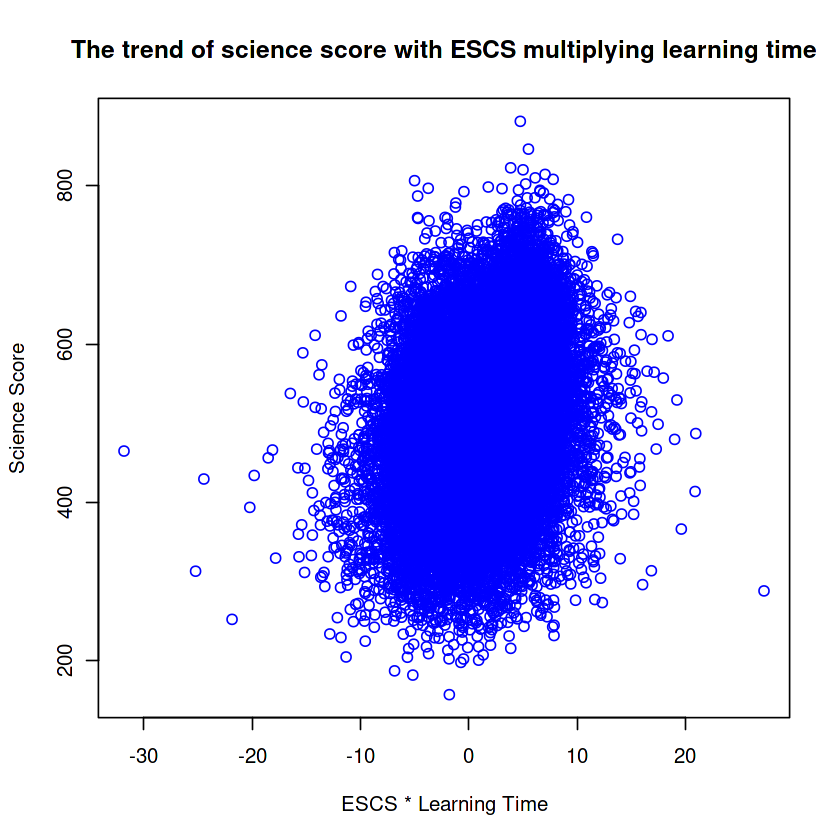

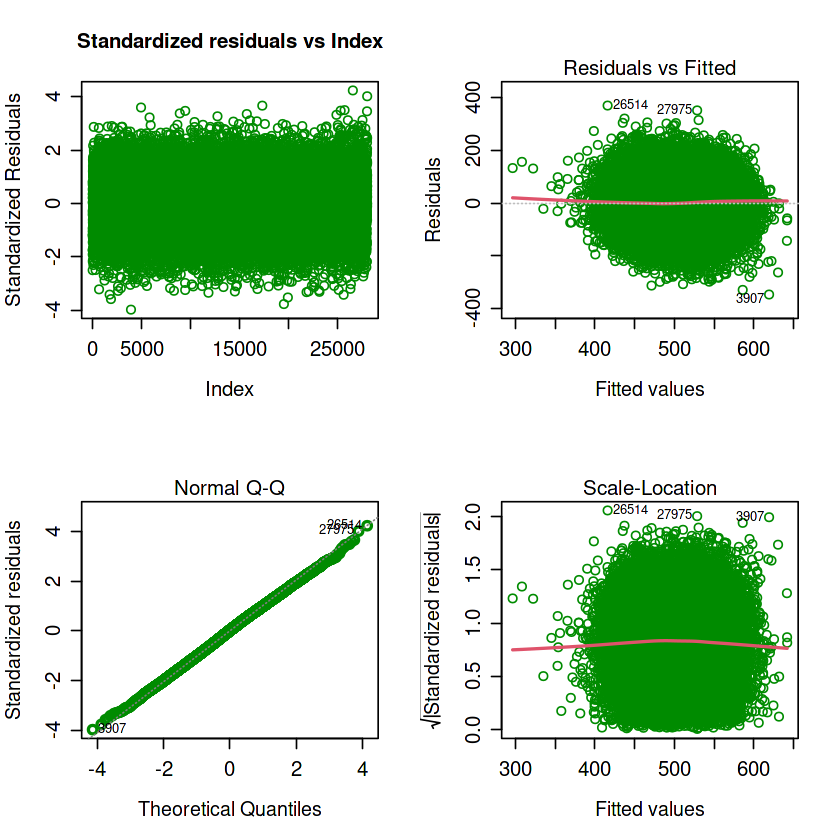

In [10]:
# Model selection for Science subject: Step one
formula.science1 = "get(science) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + Girl.Ratio"
fit.science1 = lm(formula.science1, data = GB.df)
summary(fit.science1)
anova(fit.science1)
print(paste("The AIC of the GLM model is:", AIC(fit.science1)))

# Model selection for Science subject: Step two
formula.science2 = "get(science) ~ ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + ISCED"
fit.science2 = lm(formula.science2, data = GB.df)
summary(fit.science2)
anova(fit.science2)
print(paste("The AIC of the GLM model is:", AIC(fit.science2)))

# Visualize the relationship between the science scores and some intersection terms
attach(GB.df)
names = c("Nat.Eng", "2ndG.Eng", "1stG.Eng", "Nat.NorIre", "2ndG.NorIre", "1stG.NorIre",
          "Nat.Wales", "2ndG.Wales", "1stG.Wales", "Nat.Scot", "2ndG.Scot", "1stG.Scot")
boxplot(formula = GB.df[, science] ~ IMMIG*Region, xaxt = "n",
        xlab = "", ylab = "Science Score", cex.main = 1.2,
        main = "Differences in science score caused by\nimmigrant status and region")
axis(side = 1, at = 1:12, labels = rep("", 12))
text(x = 1:12 - 0.6, y = 65, labels = names, xpd = TRUE, srt = 45)
title(xlab = "Immigrant Status & Region", line = 4, cex.lab = 1.2)
names = c("Pub.Eng", "Pri.Eng", "Pub.NorIre", "Pri.NorIre",
          "Pub.Wales", "Pri.Wales", "Pub.Scot", "Pri.Scot")
boxplot(formula = GB.df[, science] ~ School.Type*Region, xaxt = "n",
        xlab = "", ylab = "Science Score", cex.main = 1.2,
        main = "Differences in science score caused by\nschool type and region")
axis(side = 1, at = 1:8, labels = rep("", 8))
text(x = 1:8 - 0.4, y = 65, labels = names, xpd = TRUE, srt = 45)
title(xlab = "School Type & Region", line = 4, cex.lab = 1.2)
plot(ESCS*TMINS, GB.df[,science], col = "blue",
     xlab = "ESCS * Learning Time", ylab = "Science Score", cex.main = 1.2,
     main = "The trend of science score with ESCS multiplying learning time")
detach(GB.df)

# Model selection for Science subject: Step three
formula.science3 = "get(science) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + IMMIG*Region"
fit.science3 = lm(formula.science3, data = GB.df)
summary(fit.science3)
anova(fit.science3)
print(paste("The AIC of the GLM model is:", AIC(fit.science3)))

# Model selection for Science subject: Step four
formula.science4 = "get(science) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type + IMMIG:Region + School.Type*Region"
fit.science4 = lm(formula.science4, data = GB.df)
summary(fit.science4)
anova(fit.science4)
print(paste("The AIC of the GLM model is:", AIC(fit.science4)))

# Model selection for Science subject: Step five
formula.science5 = "get(science) ~ ISCED + ESCS + Gender + IMMIG +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + Area.Type +
  IMMIG:Region + School.Type*Region + ESCS:TMINS"
fit.science5 = lm(formula.science5, data = GB.df)
summary(fit.science5)
anova(fit.science5)
print(paste("The AIC of the GLM model is:", AIC(fit.science5)))

# Check the model assumptions
par(mfrow = c(2, 2))
plot(rstudent(fit.science5), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.science5, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
graphics.off()

## Part 3 - The Factors Associated with Educational Attainments and the Nature of the Associations

Explore the nature of the influence of the associated factors on PISA results one after another

[1] "1. The effects of ESCS and learning time (TMINS):"
[1] "(1) The effect of ESCS:"



Call:
lm(formula = get(math) ~ ESCS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-385.47  -55.76    2.17   57.31  329.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 485.0455     0.5153  941.22   <2e-16 ***
ESCS         31.7490     0.5730   55.41   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83.44 on 27973 degrees of freedom
Multiple R-squared:  0.09889,	Adjusted R-squared:  0.09886 
F-statistic:  3070 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ ESCS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-377.33  -61.03    1.35   64.25  325.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 490.5234     0.5641  869.57   <2e-16 ***
ESCS         31.2940     0.6273   49.89   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.34 on 27973 degrees of freedom
Multiple R-squared:  0.08171,	Adjusted R-squared:  0.08168 
F-statistic:  2489 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ ESCS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-329.11  -63.67    1.77   64.76  358.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 492.5767     0.5670   868.8   <2e-16 ***
ESCS         33.8575     0.6304    53.7   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.8 on 27973 degrees of freedom
Multiple R-squared:  0.09347,	Adjusted R-squared:  0.09344 
F-statistic:  2884 on 1 and 27973 DF,  p-value: < 2.2e-16


[1] "2.5% quantile of ESCS: -1.41886"
[1] "97.5% quantile of ESCS: 1.70142"


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



[1] "(2) The effect of learning time (TMINS):"



Call:
lm(formula = get(math) ~ TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-357.96  -59.74    1.94   60.95  359.05 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 507.0678     2.6022 194.860  < 2e-16 ***
TMINS        -3.0653     0.5255  -5.833 5.51e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.85 on 27973 degrees of freedom
Multiple R-squared:  0.001215,	Adjusted R-squared:  0.001179 
F-statistic: 34.02 on 1 and 27973 DF,  p-value: 5.51e-09



Call:
lm(formula = get(reading) ~ TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-342.28  -65.06    1.53   67.17  354.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 515.5856     2.8213 182.750  < 2e-16 ***
TMINS        -3.7132     0.5698  -6.517 7.28e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.24 on 27973 degrees of freedom
Multiple R-squared:  0.001516,	Adjusted R-squared:  0.00148 
F-statistic: 42.47 on 1 and 27973 DF,  p-value: 7.284e-11



Call:
lm(formula = get(science) ~ TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-343.40  -68.32    1.59   68.31  383.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 517.1356     2.8542 181.186  < 2e-16 ***
TMINS        -3.4903     0.5764  -6.055 1.42e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.35 on 27973 degrees of freedom
Multiple R-squared:  0.001309,	Adjusted R-squared:  0.001273 
F-statistic: 36.67 on 1 and 27973 DF,  p-value: 1.419e-09


[1] "Standard deviation of the variable \"TMINS\" in the original data set: 333.598108950234"


`geom_smooth()` using formula 'y ~ x'



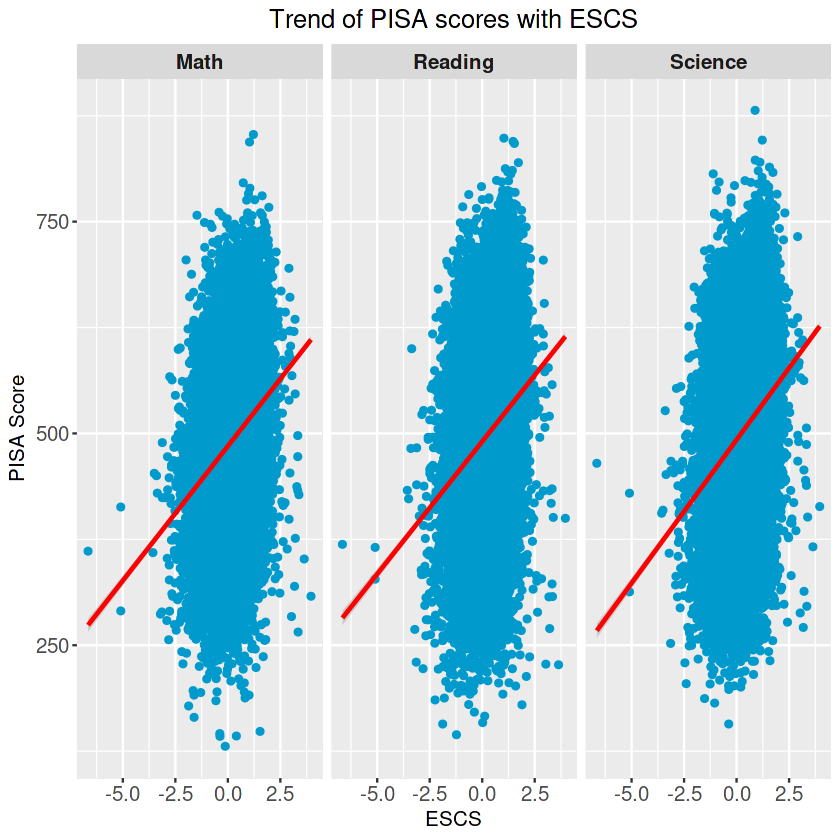

`geom_smooth()` using formula 'y ~ x'



[1] "(3) The intersection of ESCS and learning time (TMINS):"



Call:
lm(formula = get(math) ~ ESCS * TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-385.89  -55.58    2.26   57.19  332.36 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 500.1420     2.4953 200.431  < 2e-16 ***
ESCS         44.2774     2.7565  16.063  < 2e-16 ***
TMINS        -3.1068     0.5041  -6.163 7.23e-10 ***
ESCS:TMINS   -2.5814     0.5580  -4.626 3.75e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83.34 on 27971 degrees of freedom
Multiple R-squared:  0.1011,	Adjusted R-squared:  0.101 
F-statistic:  1049 on 3 and 27971 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ ESCS * TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-370.56  -60.96    1.56   63.76  332.43 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 508.8318     2.7313 186.295  < 2e-16 ***
ESCS         43.0806     3.0172  14.278  < 2e-16 ***
TMINS        -3.7701     0.5518  -6.833 8.50e-12 ***
ESCS:TMINS   -2.4257     0.6108  -3.971 7.16e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.22 on 27971 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08397 
F-statistic: 855.8 on 3 and 27971 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ ESCS * TMINS, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-358.38  -63.61    1.54   64.64  362.06 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 509.9132     2.7454 185.733  < 2e-16 ***
ESCS         45.9600     3.0327  15.155  < 2e-16 ***
TMINS        -3.5694     0.5546  -6.436 1.25e-10 ***
ESCS:TMINS   -2.4918     0.6139  -4.059 4.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.69 on 27971 degrees of freedom
Multiple R-squared:  0.09564,	Adjusted R-squared:  0.09554 
F-statistic:   986 on 3 and 27971 DF,  p-value: < 2.2e-16


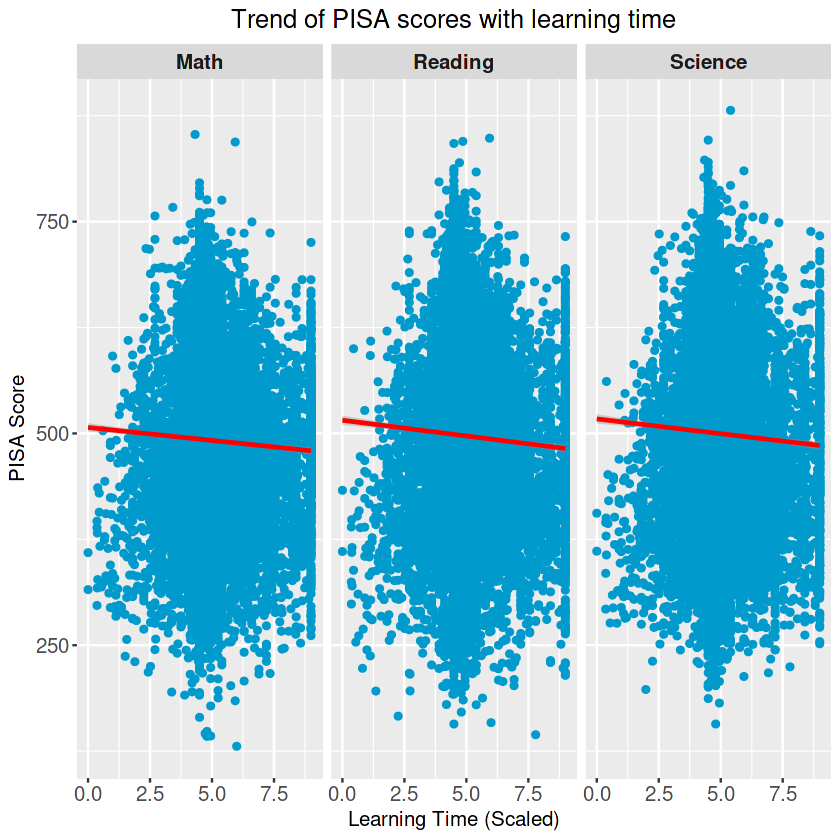

[1] "2. The effect of parental education level (ISCED):"



Call:
lm(formula = get(math) ~ ISCED, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-376.50  -58.55    2.57   60.01  371.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   416.23      11.90  34.984  < 2e-16 ***
ISCED1         16.88      16.09   1.049 0.294063    
ISCED2         42.76      12.40   3.447 0.000567 ***
ISCED3         58.10      11.97   4.854 1.22e-06 ***
ISCED4         69.48      11.96   5.808 6.39e-09 ***
ISCED5         65.06      11.96   5.441 5.34e-08 ***
ISCED6         91.01      11.92   7.633 2.36e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 86.62 on 27968 degrees of freedom
Multiple R-squared:  0.02924,	Adjusted R-squared:  0.02903 
F-statistic: 140.4 on 6 and 27968 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ ISCED, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-344.93  -63.90    2.22   66.60  337.26 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   407.10      12.95  31.439  < 2e-16 ***
ISCED1         11.56      17.51   0.660    0.509    
ISCED2         55.51      13.50   4.112 3.94e-05 ***
ISCED3         76.15      13.03   5.845 5.13e-09 ***
ISCED4         83.97      13.02   6.449 1.14e-10 ***
ISCED5         80.58      13.01   6.192 6.03e-10 ***
ISCED6        104.15      12.98   8.026 1.04e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.27 on 27968 degrees of freedom
Multiple R-squared:  0.02199,	Adjusted R-squared:  0.02178 
F-statistic: 104.8 on 6 and 27968 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ ISCED, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-358.77  -67.16    2.63   67.96  365.60 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  423.049     13.068  32.374  < 2e-16 ***
ISCED1         8.609     17.669   0.487    0.626    
ISCED2        37.441     13.624   2.748    0.006 ** 
ISCED3        58.930     13.147   4.482 7.42e-06 ***
ISCED4        68.837     13.139   5.239 1.63e-07 ***
ISCED5        67.798     13.134   5.162 2.46e-07 ***
ISCED6        92.719     13.094   7.081 1.47e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.13 on 27968 degrees of freedom
Multiple R-squared:  0.02663,	Adjusted R-squared:  0.02642 
F-statistic: 127.5 on 6 and 27968 DF,  p-value: < 2.2e-16


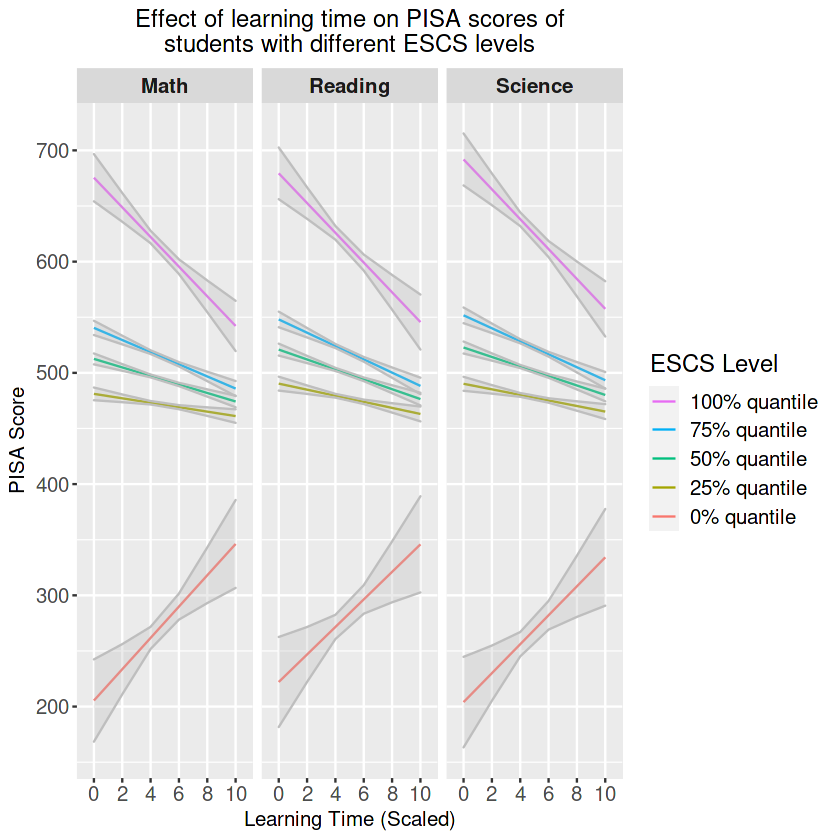

[1] "3. The effect of gender:"



Call:
lm(formula = get(math) ~ Gender, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.33  -59.55    2.35   61.00  355.59 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 487.0571     0.7438 654.799   <2e-16 ***
GenderMale   10.2388     1.0493   9.758   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.75 on 27973 degrees of freedom
Multiple R-squared:  0.003392,	Adjusted R-squared:  0.003356 
F-statistic: 95.21 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ Gender, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-343.66  -64.91    1.23   66.81  360.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 507.2202     0.8038  631.00   <2e-16 ***
GenderMale  -19.1905     1.1340  -16.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.83 on 27973 degrees of freedom
Multiple R-squared:  0.01013,	Adjusted R-squared:  0.0101 
F-statistic: 286.4 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ Gender, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-342.18  -68.66    1.75   68.19  380.13 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 499.1720     0.8172 610.810   <2e-16 ***
GenderMale    2.0626     1.1529   1.789   0.0736 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.41 on 27973 degrees of freedom
Multiple R-squared:  0.0001144,	Adjusted R-squared:  7.867e-05 
F-statistic: 3.201 on 1 and 27973 DF,  p-value: 0.07361


[1] "4. The effects of immigrant status (IMMIG) and school type:"
[1] "(1) The effect of immigrant status (IMMIG):"



Call:
lm(formula = get(math) ~ IMMIG, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-350.78  -59.73    1.85   60.92  365.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   493.2019     0.5636 875.016  < 2e-16 ***
IMMIG2ndGener   1.8286     2.2848   0.800    0.424    
IMMIG1stGener -14.4976     1.9854  -7.302 2.91e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.82 on 27972 degrees of freedom
Multiple R-squared:  0.001964,	Adjusted R-squared:  0.001893 
F-statistic: 27.53 on 2 and 27972 DF,  p-value: 1.142e-12



Call:
lm(formula = get(reading) ~ IMMIG, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-354.97  -65.31    1.47   67.42  372.09 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   499.3348     0.6105 817.850   <2e-16 ***
IMMIG2ndGener  -0.2543     2.4749  -0.103    0.918    
IMMIG1stGener -22.9162     2.1506 -10.656   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.12 on 27972 degrees of freedom
Multiple R-squared:  0.004058,	Adjusted R-squared:  0.003987 
F-statistic: 56.98 on 2 and 27972 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ IMMIG, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-345.20  -68.48    1.50   68.27  379.18 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   502.1895     0.6178 812.836  < 2e-16 ***
IMMIG2ndGener  -7.5174     2.5044  -3.002  0.00269 ** 
IMMIG1stGener -20.4868     2.1762  -9.414  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.26 on 27972 degrees of freedom
Multiple R-squared:  0.003354,	Adjusted R-squared:  0.003283 
F-statistic: 47.07 on 2 and 27972 DF,  p-value: < 2.2e-16


[1] "(2) The effect of school type:"



Call:
lm(formula = get(math) ~ School.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-353.52  -59.01    2.60   60.51  341.75 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        484.2534     0.6201  780.93   <2e-16 ***
School.TypePrivate  26.8810     1.1404   23.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.04 on 27973 degrees of freedom
Multiple R-squared:  0.01948,	Adjusted R-squared:  0.01944 
F-statistic: 555.7 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ School.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-358.47  -63.97    1.93   66.82  354.63 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         490.074      0.674  727.10   <2e-16 ***
School.TypePrivate   25.376      1.240   20.47   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.61 on 27973 degrees of freedom
Multiple R-squared:  0.01476,	Adjusted R-squared:  0.01473 
F-statistic: 419.1 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ School.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-333.57  -67.66    1.92   67.41  390.80 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        490.5683     0.6787  722.84   <2e-16 ***
School.TypePrivate  32.6016     1.2481   26.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.26 on 27973 degrees of freedom
Multiple R-squared:  0.02381,	Adjusted R-squared:  0.02378 
F-statistic: 682.3 on 1 and 27973 DF,  p-value: < 2.2e-16


[1] "(3) The intersection of immigrant status (IMMIG) and region:"


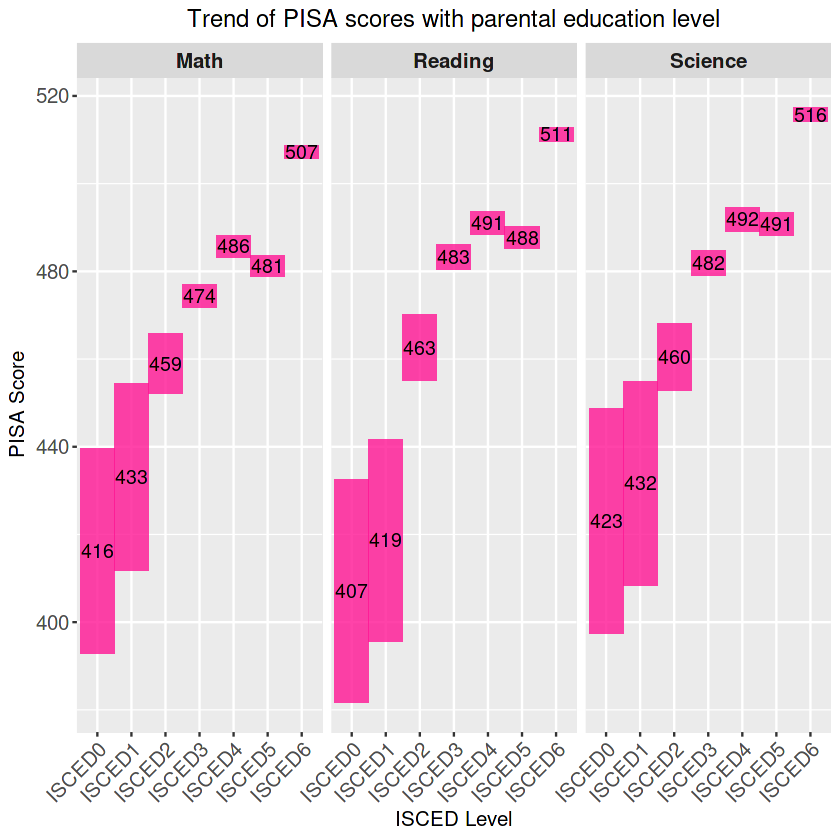

[1] "(4) The intersection of school type and region:"


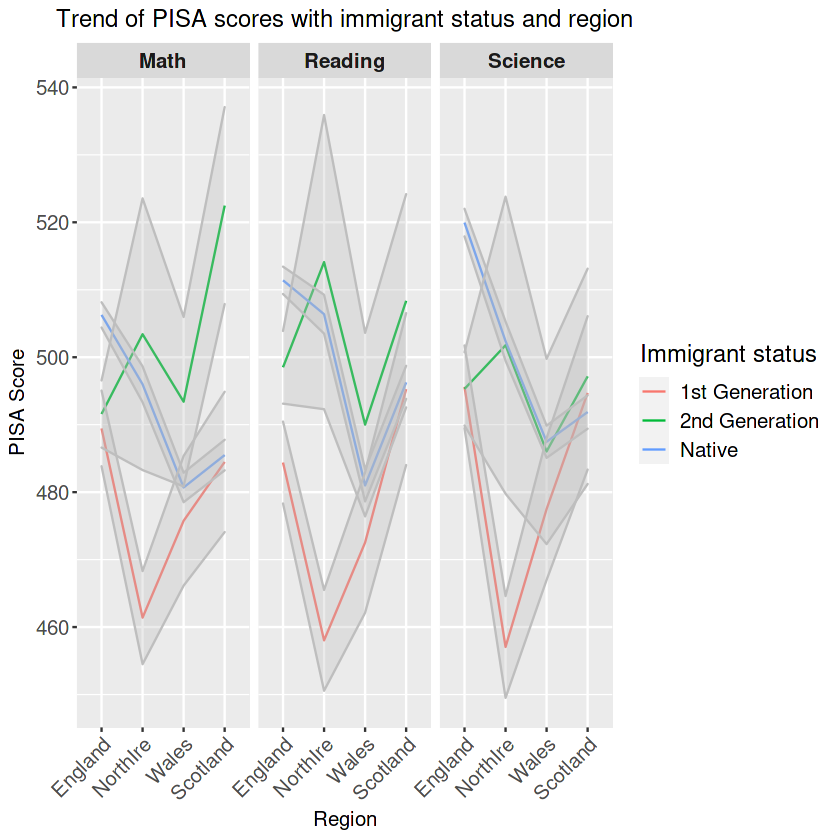

[1] "5. The effect of the proportion of deprived students in the school:"



Call:
lm(formula = get(math) ~ I(exp(-3 * Deprived)), data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-369.00  -55.73    2.35   58.08  333.73 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            429.370      1.265  339.43   <2e-16 ***
I(exp(-3 * Deprived))  117.613      2.175   54.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 83.64 on 27973 degrees of freedom
Multiple R-squared:  0.09464,	Adjusted R-squared:  0.09461 
F-statistic:  2924 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ I(exp(-3 * Deprived)), data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-388.16  -62.06    1.65   64.08  352.27 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            440.381      1.393  316.22   <2e-16 ***
I(exp(-3 * Deprived))  107.062      2.395   44.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.08 on 27973 degrees of freedom
Multiple R-squared:  0.0667,	Adjusted R-squared:  0.06667 
F-statistic:  1999 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ I(exp(-3 * Deprived)), data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-363.95  -64.33    1.67   64.55  350.17 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             432.45       1.39  311.13   <2e-16 ***
I(exp(-3 * Deprived))   126.84       2.39   53.07   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 91.9 on 27973 degrees of freedom
Multiple R-squared:  0.09148,	Adjusted R-squared:  0.09145 
F-statistic:  2817 on 1 and 27973 DF,  p-value: < 2.2e-16


[1] "6. The effect of the scale of schools and communities:"
[1] "(1) The effect of the scale of schools (the total number of students in the school):"



Call:
lm(formula = get(math) ~ Total.Student, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-367.41  -59.44    1.75   60.65  360.25 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   473.9932     1.4071  336.87   <2e-16 ***
Total.Student   7.3230     0.5252   13.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.6 on 27973 degrees of freedom
Multiple R-squared:  0.006902,	Adjusted R-squared:  0.006866 
F-statistic: 194.4 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(reading) ~ Total.Student, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.46  -65.53    1.41   66.99  353.44 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   477.2726     1.5254  312.88   <2e-16 ***
Total.Student   8.1659     0.5694   14.34   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.97 on 27973 degrees of freedom
Multiple R-squared:  0.007299,	Adjusted R-squared:  0.007263 
F-statistic: 205.7 on 1 and 27973 DF,  p-value: < 2.2e-16



Call:
lm(formula = get(science) ~ Total.Student, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-344.75  -68.64    1.55   67.93  372.85 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   481.7561     1.5442  311.99   <2e-16 ***
Total.Student   7.4209     0.5764   12.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.13 on 27973 degrees of freedom
Multiple R-squared:  0.005891,	Adjusted R-squared:  0.005855 
F-statistic: 165.8 on 1 and 27973 DF,  p-value: < 2.2e-16


[1] "Standard deviation of the variable \"Total.Student\": 392.394897984827"
[1] "(2) The effect of the scale of the area where the school locates:"



Call:
lm(formula = get(math) ~ Area.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-360.48  -59.88    1.93   60.85  361.67 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          487.061      1.943 250.679  < 2e-16 ***
Area.TypeSmall.Town    3.716      2.201   1.688  0.09135 .  
Area.TypeTown          6.811      2.116   3.220  0.00129 ** 
Area.TypeCity          5.773      2.242   2.575  0.01004 *  
Area.TypeLarge.City    4.151      2.976   1.395  0.16304    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.89 on 27970 degrees of freedom
Multiple R-squared:  0.0004786,	Adjusted R-squared:  0.0003356 
F-statistic: 3.348 on 4 and 27970 DF,  p-value: 0.009523



Call:
lm(formula = get(reading) ~ Area.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.95  -65.20    1.31   67.38  350.90 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          488.019      2.106 231.772  < 2e-16 ***
Area.TypeSmall.Town    5.783      2.385   2.424   0.0153 *  
Area.TypeTown         12.295      2.293   5.363 8.26e-08 ***
Area.TypeCity         11.141      2.430   4.585 4.56e-06 ***
Area.TypeLarge.City   14.096      3.225   4.371 1.24e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.24 on 27970 degrees of freedom
Multiple R-squared:  0.001649,	Adjusted R-squared:  0.001507 
F-statistic: 11.55 on 4 and 27970 DF,  p-value: 2.267e-09



Call:
lm(formula = get(science) ~ Area.Type, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-340.22  -68.26    1.72   68.21  383.01 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          495.981      2.131 232.793  < 2e-16 ***
Area.TypeSmall.Town    1.229      2.414   0.509 0.610504    
Area.TypeTown          7.978      2.320   3.439 0.000585 ***
Area.TypeCity          2.376      2.459   0.966 0.333937    
Area.TypeLarge.City    4.477      3.263   1.372 0.170073    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 96.37 on 27970 degrees of freedom
Multiple R-squared:  0.001068,	Adjusted R-squared:  0.0009253 
F-statistic: 7.477 on 4 and 27970 DF,  p-value: 5.147e-06


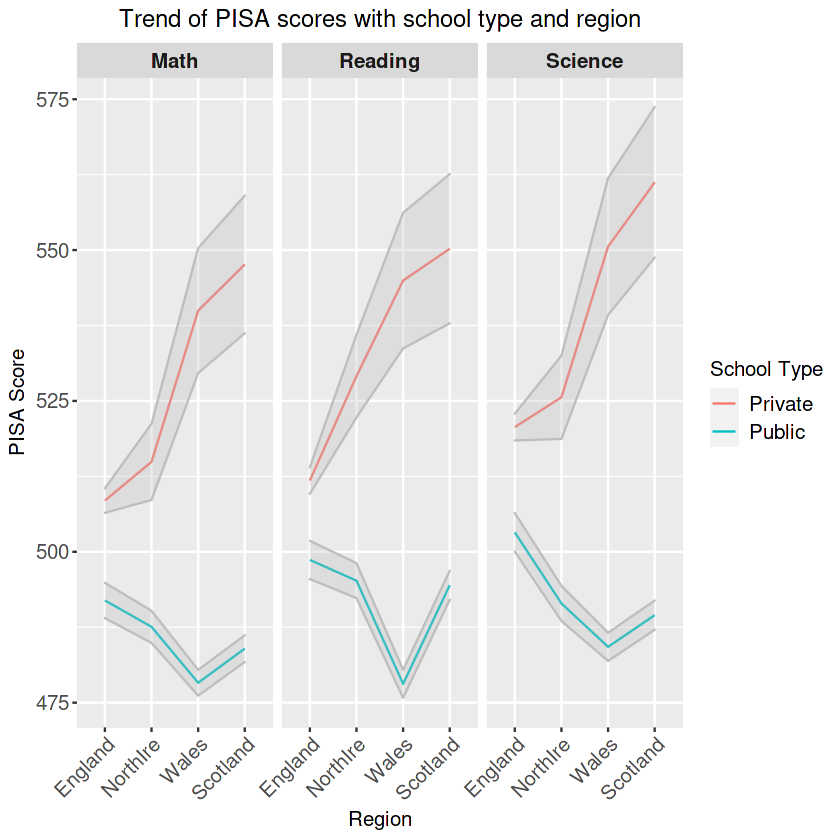

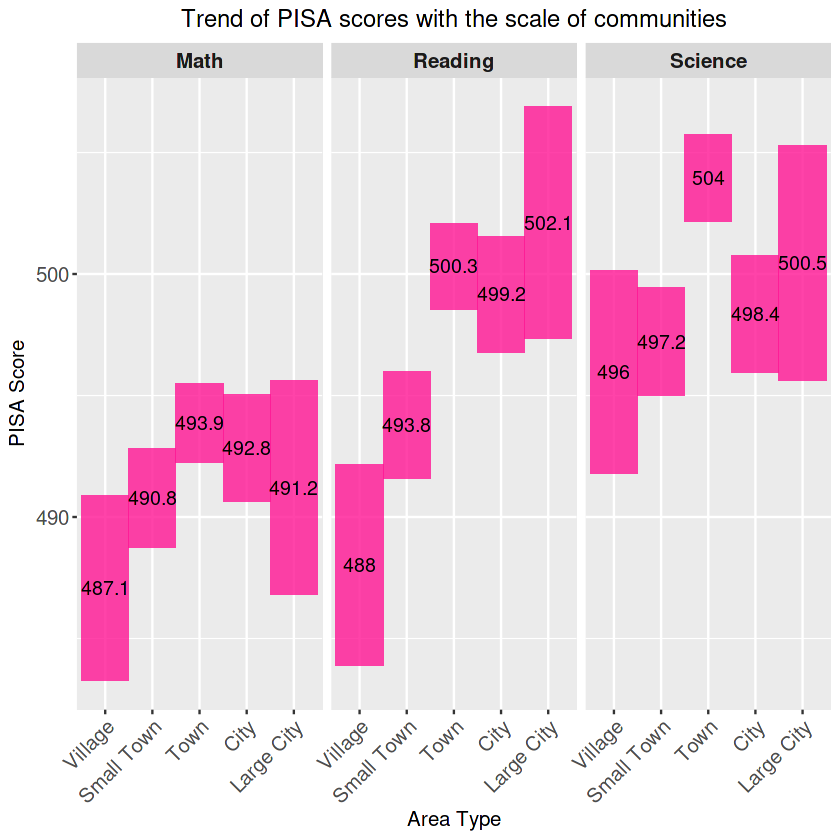

In [11]:
# Explore the effects of ESCS and learning time (TMINS)
print("1. The effects of ESCS and learning time (TMINS):")
# The effect of ESCS
print("(1) The effect of ESCS:")
summary(lm(get(math) ~ ESCS, data = GB.df))
summary(lm(get(reading) ~ ESCS, data = GB.df))
summary(lm(get(science) ~ ESCS, data = GB.df))
print(paste("2.5% quantile of ESCS:", quantile(GB.df$ESCS, 0.025)))
print(paste("97.5% quantile of ESCS:", quantile(GB.df$ESCS, 0.975)))
Subject = c("Math", "Reading", "Science")
names(Subject) = c("PV2MATH", "PV2READ", "PV2SCIE")
GB.df %>% select(PV2MATH, PV2READ, PV2SCIE, ESCS) %>%
  pivot_longer(c(PV2MATH, PV2READ, PV2SCIE), names_to = "Subject", values_to = "Score") %>%
  ggplot(aes(x = ESCS, y = Score)) + geom_point(color = "deepskyblue3") +
  geom_smooth(method = "lm", fullrange = TRUE, color = "red") +
  facet_wrap(~Subject, ncol = 3, labeller = labeller(Subject = Subject)) +
  labs(y = "PISA Score", title = "Trend of PISA scores with ESCS") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 15),
        strip.text = element_text(size = 12, face = "bold"))
ggsave("P3F1.png", width = 8, height = 4)

# The effect of learning time (TMINS)
print("(2) The effect of learning time (TMINS):")
summary(lm(get(math) ~ TMINS, data = GB.df))
summary(lm(get(reading) ~ TMINS, data = GB.df))
summary(lm(get(science) ~ TMINS, data = GB.df))
print(paste("Standard deviation of the variable \"TMINS\"",
            "in the original data set:", sd(GB$TMINS, na.rm = TRUE)))
GB.df %>% select(PV2MATH, PV2READ, PV2SCIE, TMINS) %>%
  pivot_longer(c(PV2MATH, PV2READ, PV2SCIE), names_to = "Subject", values_to = "Score") %>%
  ggplot(aes(x = TMINS, y = Score)) + geom_point(color = "deepskyblue3") +
  geom_smooth(method = "lm", fullrange = TRUE, color = "red") +
  facet_wrap(~Subject, ncol = 3, labeller = labeller(Subject = Subject)) +
  labs(x = "Learning Time (Scaled)", y = "PISA Score",
       title = "Trend of PISA scores with learning time") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 15),
        strip.text = element_text(size = 12, face = "bold"))
ggsave("P3F2.png", width = 8, height = 4)

# Exploration on the intersection of ESCS and learning time (TMINS)
print("(3) The intersection of ESCS and learning time (TMINS):")
fit.ESCSTime.math = lm(get(math) ~ ESCS*TMINS, data = GB.df)
fit.ESCSTime.read = lm(get(reading) ~ ESCS*TMINS, data = GB.df)
fit.ESCSTime.scie = lm(get(science) ~ ESCS*TMINS, data = GB.df)
summary(fit.ESCSTime.math); summary(fit.ESCSTime.read); summary(fit.ESCSTime.scie)
ESCS.level = quantile(GB.df$ESCS, probs = c(0, 0.25, 0.5, 0.75, 1))
TMINS.level = seq(0, 10, 2)
Effect.ESCSTime = rbind(
  as.data.frame(effect("ESCS*TMINS", fit.ESCSTime.math,
  xlevels = list(ESCS = ESCS.level, TMINS = TMINS.level), typical = mean)),
  as.data.frame(effect("ESCS*TMINS", fit.ESCSTime.read,
  xlevels = list(ESCS = ESCS.level, TMINS = TMINS.level), typical = mean)),
  as.data.frame(effect("ESCS*TMINS", fit.ESCSTime.scie,
  xlevels = list(ESCS = ESCS.level, TMINS = TMINS.level), typical = mean))) %>%
  mutate(Subject = c(rep("Math", 30), rep("Reading", 30), rep("Science", 30)),
         ESCS = factor(ESCS), TMINS = factor(TMINS))
Effect.ESCSTime %>% ggplot(aes(x = TMINS, y = fit)) +
  geom_line(aes(color = ESCS, group = ESCS)) +
  facet_wrap(~Subject, ncol = 3) +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = ESCS),
              color = "gray", fill = "gray", alpha = 0.3) +
  labs(x = "Learning Time (Scaled)", y = "PISA Score",
       title = paste("Effect of learning time on PISA scores of\n",
                     "students with different ESCS levels", sep = "")) +
  scale_color_discrete(name = "ESCS Level",
    labels = paste(as.character(seq(0, 100, 25)), "% quantile", sep = "")) +
  guides(color = guide_legend(reverse = TRUE)) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 14), legend.text = element_text(size = 12))
ggsave("P3F3.png", width = 8, height = 5)

# Explore the effect of parental education level (ISCED)
print("2. The effect of parental education level (ISCED):")
fit.ISCED.math = lm(get(math) ~ ISCED, data = GB.df)
fit.ISCED.read = lm(get(reading) ~ ISCED, data = GB.df)
fit.ISCED.scie = lm(get(science) ~ ISCED, data = GB.df)
summary(fit.ISCED.math); summary(fit.ISCED.read); summary(fit.ISCED.scie)
Effect.ISCED = rbind(
  as.data.frame(effect("ISCED", fit.ISCED.math)),
  as.data.frame(effect("ISCED", fit.ISCED.read)),
  as.data.frame(effect("ISCED", fit.ISCED.scie))) %>%
  mutate(Subject = c(rep("Math", 7), rep("Reading", 7), rep("Science", 7)))
Effect.ISCED %>% ggplot(aes(x = ISCED, y = fit)) +
  geom_tile(aes(height = (upper - lower)), fill = "deeppink", alpha = 0.8) +
  geom_text(aes(label = round(fit, 0)), size = 4) +
  facet_wrap(~Subject, ncol = 3) +
  labs(x = "ISCED Level", y = "PISA Score",
       title = "Trend of PISA scores with parental education level") +
  scale_x_discrete(labels = paste("ISCED", as.character(0:6), sep = "")) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14))
ggsave("P3F4.png", width = 8, height = 5)

# Explore the effect of gender
print("3. The effect of gender:")
summary(lm(get(math) ~ Gender, data = GB.df))
summary(lm(get(reading) ~ Gender, data = GB.df))
summary(lm(get(science) ~ Gender, data = GB.df))

# Explore the effects of immigrant status (IMMIG) and school type
print("4. The effects of immigrant status (IMMIG) and school type:")
# The effect of immigrant status (IMMIG)
print("(1) The effect of immigrant status (IMMIG):")
summary(lm(get(math) ~ IMMIG, data = GB.df))
summary(lm(get(reading) ~ IMMIG, data = GB.df))
summary(lm(get(science) ~ IMMIG, data = GB.df))

# The effect of school type
print("(2) The effect of school type:")
summary(lm(get(math) ~ School.Type, data = GB.df))
summary(lm(get(reading) ~ School.Type, data = GB.df))
summary(lm(get(science) ~ School.Type, data = GB.df))

# Exploration on the intersection of immigrant status (IMMIG) and region
print("(3) The intersection of immigrant status (IMMIG) and region:")
fit.IMMIGReg.math = lm(get(math) ~ IMMIG*Region, data = GB.df)
fit.IMMIGReg.read = lm(get(reading) ~ IMMIG*Region, data = GB.df)
fit.IMMIGReg.scie = lm(get(science) ~ IMMIG*Region, data = GB.df)
Effect.IMMIGReg = rbind(
  as.data.frame(effect("IMMIG*Region", fit.IMMIGReg.math)),
  as.data.frame(effect("IMMIG*Region", fit.IMMIGReg.read)),
  as.data.frame(effect("IMMIG*Region", fit.IMMIGReg.scie))) %>%
  mutate(Subject = c(rep("Math", 12), rep("Reading", 12), rep("Science", 12)),
         Region = factor(Region, levels = c("England", "NorthIre", "Wales", "Scotland")))
Effect.IMMIGReg %>% ggplot(aes(x = Region, y = fit)) +
  geom_line(aes(color = IMMIG, group = IMMIG)) +
  facet_wrap(~Subject, ncol = 3) +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = IMMIG),
              color = "gray", fill = "gray", alpha = 0.3) +
  labs(x = "Region", y = "PISA Score",
       title = "Trend of PISA scores with immigrant status and region") +
  scale_color_discrete(name = "Immigrant status",
    labels = c("1st Generation", "2nd Generation", "Native")) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 14), legend.text = element_text(size = 12))
ggsave("P3F5.png", width = 8, height = 5)

# Exploration on the intersection of school type and region
print("(4) The intersection of school type and region:")
fit.STReg.math = lm(get(math) ~ School.Type*Region, data = GB.df)
fit.STReg.read = lm(get(reading) ~ School.Type*Region, data = GB.df)
fit.STReg.scie = lm(get(science) ~ School.Type*Region, data = GB.df)
Effect.STReg = rbind(
  as.data.frame(effect("School.Type*Region", fit.STReg.math)),
  as.data.frame(effect("School.Type*Region", fit.STReg.read)),
  as.data.frame(effect("School.Type*Region", fit.STReg.scie))) %>%
  mutate(Subject = c(rep("Math", 8), rep("Reading", 8), rep("Science", 8)),
         Region = factor(Region, levels = c("England", "NorthIre", "Wales", "Scotland")))
Effect.STReg %>% ggplot(aes(x = Region, y = fit)) +
  geom_line(aes(color = School.Type, group = School.Type)) +
  facet_wrap(~Subject, ncol = 3) +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = School.Type),
              color = "gray", fill = "gray", alpha = 0.3) +
  labs(x = "Region", y = "PISA Score",
       title = "Trend of PISA scores with school type and region") +
  scale_color_discrete(name = "School Type") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12), legend.text = element_text(size = 12))
ggsave("P3F6.png", width = 8, height = 5)

# Explore the effect of the proportion of deprived students in the school
print("5. The effect of the proportion of deprived students in the school:")
summary(lm(get(math) ~ I(exp(-3*Deprived)), data = GB.df))
summary(lm(get(reading) ~ I(exp(-3*Deprived)), data = GB.df))
summary(lm(get(science) ~ I(exp(-3*Deprived)), data = GB.df))

# Explore the effect of the scale of schools and communities
print("6. The effect of the scale of schools and communities:")
# The effect of the scale of schools, the total number of students in the school
print(paste("(1) The effect of the scale of schools",
            "(the total number of students in the school):"))
summary(lm(get(math) ~ Total.Student, data = GB.df))
summary(lm(get(reading) ~ Total.Student, data = GB.df))
summary(lm(get(science) ~ Total.Student, data = GB.df))
print(paste("Standard deviation of the variable \"Total.Student\":",
            sd(GB$SC002Q01TA + GB$SC002Q02TA, na.rm = TRUE)))

# The effect of the scale of the area where the school locates
print("(2) The effect of the scale of the area where the school locates:")
fit.area.math = lm(get(math) ~ Area.Type, data = GB.df)
fit.area.read = lm(get(reading) ~ Area.Type, data = GB.df)
fit.area.scie = lm(get(science) ~ Area.Type, data = GB.df)
summary(fit.area.math); summary(fit.area.read); summary(fit.area.scie)
Effect.Area = rbind(
  as.data.frame(effect("Area.Type", fit.area.math)),
  as.data.frame(effect("Area.Type", fit.area.read)),
  as.data.frame(effect("Area.Type", fit.area.scie))) %>%
  mutate(Subject = c(rep("Math", 5), rep("Reading", 5), rep("Science", 5)),
         Area.Type = factor(Area.Type,
         levels = c("Village", "Small.Town", "Town", "City", "Large.City"),
         labels = c("Village", "Small Town", "Town", "City", "Large City")))
Effect.Area %>% ggplot(aes(x = Area.Type, y = fit)) +
  geom_tile(aes(height = (upper - lower)), fill = "deeppink", alpha = 0.8) +
  geom_text(aes(label = round(fit, 1)), size = 4) +
  facet_wrap(~Subject, ncol = 3) +
  labs(x = "Area Type", y = "PISA Score",
       title = "Trend of PISA scores with the scale of communities") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14))
ggsave("P3F7.png", width = 8, height = 5)

## Part 4 - Comparison between the UK Nations and the Changes over Years

In this section, I am going to compare the PISA results between the UK nations (England, Northern Ireland, Wales and Scotland), and analyze the changes of PISA results from 2015 to 2018.

Create boxplots to visualize the relationship between PISA scores and the intersection of the variable `Region` and `Year`

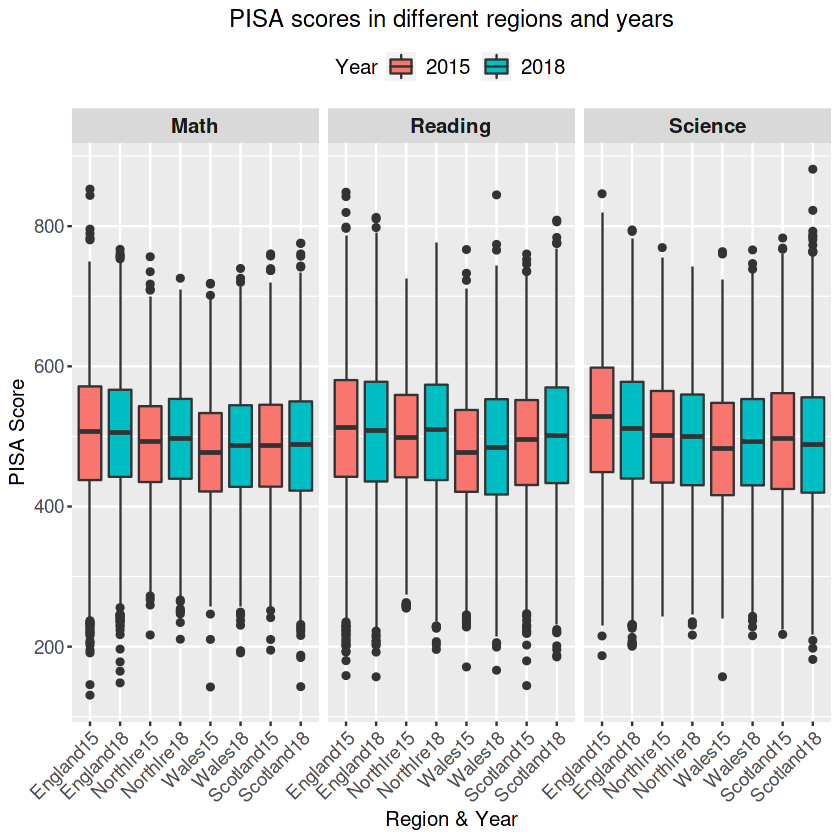

In [12]:
# Prepare the labels for each class
Labels = c("England15", "England18", "NorthIre15", "NorthIre18",
           "Wales15", "Wales18", "Scotland15", "Scotland18")

# Create boxplots to visualize the relationship between PISA scores and
# the intersection of the variable `Region` and `Year`
GB.df %>% pivot_longer(
  cols = c(PV2MATH, PV2READ, PV2SCIE), names_to = "Subject", values_to = "Score") %>%
  ggplot(aes(x = Region:Year, y = Score)) + geom_boxplot(aes(fill = Year)) +
  facet_wrap(~Subject, ncol = 3, labeller = labeller(Subject =
             c("PV2MATH" = "Math", "PV2READ" = "Reading", "PV2SCIE" = "Science"))) +
  labs(x = "Region & Year", y = "PISA Score",
       title = "PISA scores in different regions and years") +
  scale_x_discrete(labels = Labels) +
  scale_y_continuous(breaks = seq(200, 800, 200)) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 11),
        axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12), legend.text = element_text(size = 12),
        legend.position = "top", strip.text = element_text(size = 12, face = "bold"))
ggsave("P4F1.png", width = 8, height = 5)

**1. Statistical inference based on normal samples**

(1) Build confidence intervals for the PISA score of each subject in each group  
(2) Compare the PISA score of each subject between the four nations of the UK and analyze the changes of the score from 2015 to 2018

[1] "Comparison between the year 2015 and 2018:"
[1] "The math subject:"


T.TestStat Df    alpha Type      p.value      Result   
1 -3.41026   27973 0.05  One.sided 0.0003249633 Less than

[1] "The reading subject:"


T.TestStat Df    alpha Type      p.value     Result   
1 -3.003383  27973 0.05  One.sided 0.001336162 Less than

[1] "The science subject:"


T.TestStat Df    alpha Type      p.value      Result      
1 4.5798     27973 0.05  One.sided 2.337124e-06 Greater than

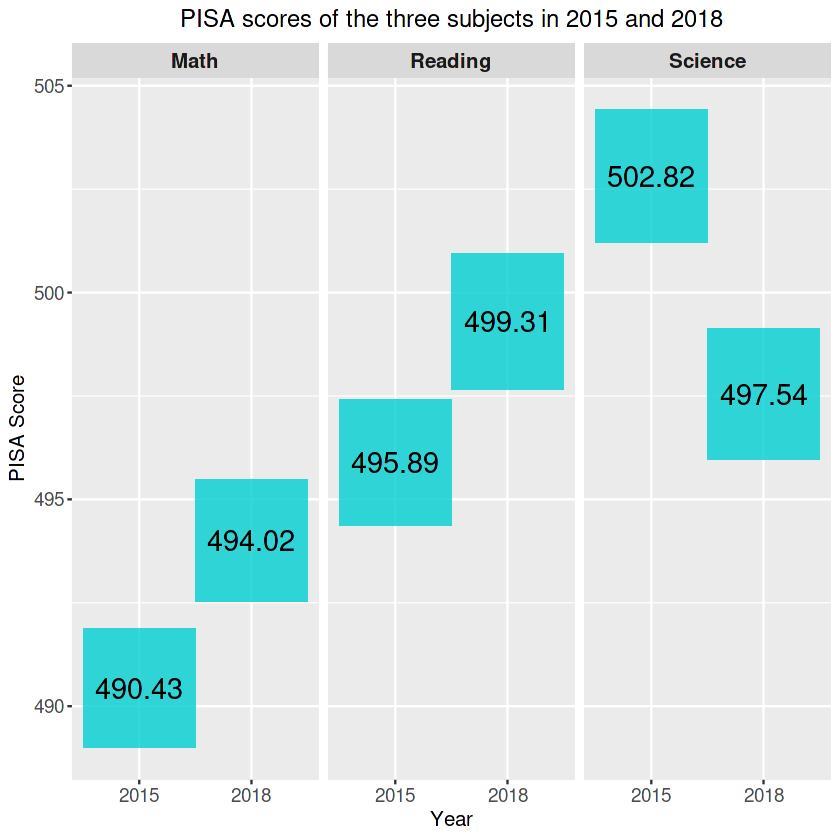

[1] "Comparison among the four nations of the UK:"
[1] "The math subject:"


T.TestStat Df    alpha Type      p.value      Result      
1 7.266251   15248 0.05  One.sided 1.937339e-13 Greater than

T.TestStat Df    alpha Type      p.value     Result      
1 3.317269   10921 0.05  One.sided 0.000455994 Greater than

T.TestStat Df    alpha Type      p.value      Result      
1 3.669633   12723 0.05  One.sided 0.0001219455 Greater than

[1] "The reading subject:"


T.TestStat Df    alpha Type      p.value      Result      
1 4.254241   15248 0.05  One.sided 1.055052e-05 Greater than

T.TestStat Df    alpha Type      p.value    Result      
1 2.161206   10921 0.05  One.sided 0.01535053 Greater than

T.TestStat Df    alpha Type      p.value Result      
1 9.612287   12723 0.05  One.sided 0       Greater than

[1] "The science subject:"


T.TestStat Df    alpha Type      p.value Result      
1 10.7547    15248 0.05  One.sided 0       Greater than

T.TestStat Df    alpha Type      p.value     Result      
1 2.479308   10921 0.05  One.sided 0.006589373 Greater than

T.TestStat Df    alpha Type      p.value      Result      
1 3.145319   12723 0.05  One.sided 0.0008314388 Greater than

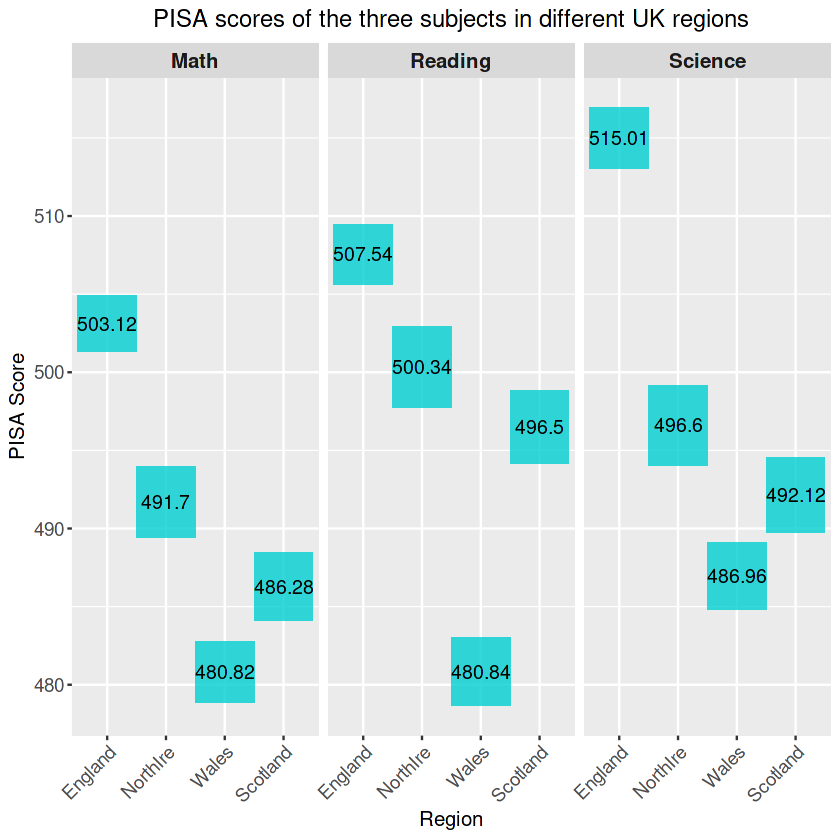

[1] "Comparison between the year 2015 and 2018 and among the four nations of the UK:"
[1] "1. The comparison between the year 2015 and 2018:"
[1] "(1) The math subject:"


T.TestStat Df    alpha Type      p.value   Result 
1 -0.516852  10434 0.05  Two.sided 0.6052704 Similar

T.TestStat Df   alpha Type      p.value    Result   
1 -1.890331  4812 0.05  One.sided 0.02938688 Less than

T.TestStat Df   alpha Type      p.value      Result   
1 -4.708618  6614 0.05  One.sided 1.272433e-06 Less than

T.TestStat Df   alpha Type      p.value   Result 
1 0.08024605 6107 0.05  Two.sided 0.9360442 Similar

[1] "(2) The reading subject:"


T.TestStat Df    alpha Type      p.value     Result      
1 2.390481   10434 0.05  One.sided 0.008421972 Greater than

T.TestStat Df   alpha Type      p.value    Result   
1 -2.317304  4812 0.05  One.sided 0.01026446 Less than

T.TestStat Df   alpha Type      p.value    Result   
1 -2.485928  6614 0.05  One.sided 0.00647296 Less than

T.TestStat Df   alpha Type      p.value      Result   
1 -4.672792  6107 0.05  One.sided 1.517533e-06 Less than

[1] "(3) The science subject:"


T.TestStat Df    alpha Type      p.value      Result      
1 7.501463   10434 0.05  One.sided 3.419487e-14 Greater than

T.TestStat Df   alpha Type      p.value    Result      
1 1.795218   4812 0.05  One.sided 0.03634084 Greater than

T.TestStat Df   alpha Type      p.value      Result   
1 -3.611532  6614 0.05  One.sided 0.0001533247 Less than

T.TestStat Df   alpha Type      p.value    Result      
1 2.225262   6107 0.05  One.sided 0.01305003 Greater than

[1] "2. The comparison among the four nations of the UK:"
[1] "(1) The math subject:"


T.TestStat Df   alpha Type      p.value      Result      
1 5.848366   7593 0.05  One.sided 2.585042e-09 Greater than

T.TestStat Df   alpha Type      p.value   Result 
1 1.413798   5510 0.05  Two.sided 0.1574778 Similar

T.TestStat Df   alpha Type      p.value     Result      
1 4.976316   6560 0.05  One.sided 3.32287e-07 Greater than

T.TestStat Df   alpha Type      p.value      Result      
1 4.415112   7653 0.05  One.sided 5.117208e-06 Greater than

T.TestStat Df   alpha Type      p.value      Result      
1 3.199649   5409 0.05  One.sided 0.0006919475 Greater than

T.TestStat Df   alpha Type      p.value  Result 
1 0.2394017  6161 0.05  Two.sided 0.810802 Similar

[1] "(2) The reading subject:"


T.TestStat Df   alpha Type      p.value      Result      
1 5.39376    7593 0.05  One.sided 3.553852e-08 Greater than

T.TestStat Df   alpha Type      p.value    Result      
1 2.635868   5510 0.05  One.sided 0.00420788 Greater than

T.TestStat Df   alpha Type      p.value      Result      
1 5.964358   6560 0.05  One.sided 1.291889e-09 Greater than

T.TestStat Df   alpha Type      p.value   Result 
1 0.7534085  7653 0.05  Two.sided 0.4512276 Similar

T.TestStat Df   alpha Type      p.value   Result 
1 0.4591201  5409 0.05  Two.sided 0.6461664 Similar

T.TestStat Df   alpha Type      p.value   Result 
1 1.353332   8238 0.05  Two.sided 0.1759868 Similar

T.TestStat Df   alpha Type      p.value      Result      
1 7.509026   6161 0.05  One.sided 3.397282e-14 Greater than

[1] "(3) The science subject:"


T.TestStat Df   alpha Type      p.value Result      
1 9.556679   7593 0.05  One.sided 0       Greater than

T.TestStat Df   alpha Type      p.value   Result 
1 1.640132   5510 0.05  Two.sided 0.1010348 Similar

T.TestStat Df   alpha Type      p.value      Result      
1 5.080696   6560 0.05  One.sided 1.932236e-07 Greater than

T.TestStat Df   alpha Type      p.value      Result      
1 5.636735   7653 0.05  One.sided 8.973259e-09 Greater than

T.TestStat Df   alpha Type      p.value    Result      
1 1.909256   5409 0.05  One.sided 0.02814099 Greater than

T.TestStat Df   alpha Type      p.value   Result 
1 -0.7463147 6161 0.05  Two.sided 0.4555058 Similar

T.TestStat Df   alpha Type      p.value  Result 
1 1.308269   5576 0.05  Two.sided 0.190836 Similar

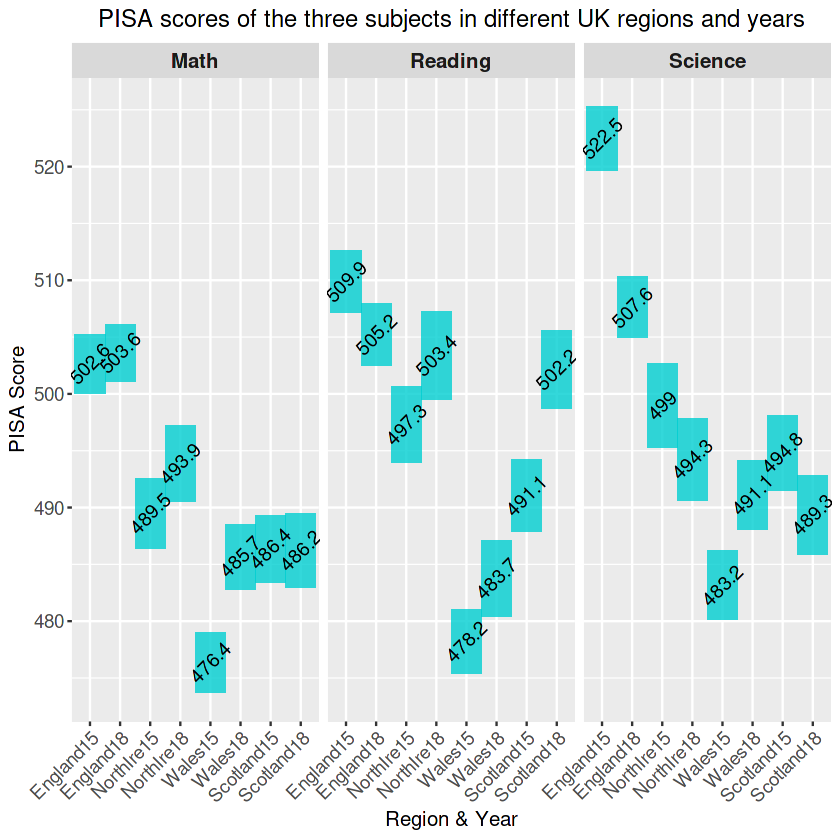

In [13]:
# Construct the function to perform the two-sample T-test for normal data
T.TwoSample = function(sample1, sample2, alpha = 0.05){
  "
  This function is used to perform the two-sample T-test for normal data.
  Input: sample1 (numeric): The first sample of normal data
         sample2 (numeric): The second sample of normal data
         alpha (numeric, between 0 and 1): The significance level of the T-test
  Output: Result (data frame): The data frame that contains the information and
                               the results of the two-sample T-test
  "
  # Calculate the test statistic and some other values
  n1 = length(sample1); n2 = length(sample2)
  mean1 = mean(sample1); mean2 = mean(sample2)
  S1 = sd(sample1); S2 = sd(sample2)
  Sp = sqrt(((n1 - 1)*S1^2 + (n2 - 1)*S2^2)/(n1 + n2 - 2))
  T = (mean1 - mean2)/Sp/sqrt(1/n1 + 1/n2)
  Df = n1 + n2 - 2

  # Compare the test statistic with critical values
  if(T > qt(1 - alpha, df = Df)){
    Type = "One.sided"
    p = 1 - pt(T, df = Df)
    Result = "Greater than"
  }
  else if(T < qt(alpha, df = Df)){
    Type = "One.sided"
    p = pt(T, df = Df)
    Result = "Less than"
  }
  else{
    Type = "Two.sided"
    p = 2*(1 - pt(abs(T), df = Df))
    Result = "Similar"
  }

  # Organize the results of the two-sample T-test into a data frame
  Result = data.frame(
    T.TestStat = T, Df = Df, alpha = alpha, Type = Type,
    p.value = p, Result = Result
  )
  return(Result)
}

# Construct the function to build the confidence interval for the mean of a normal sample
T.OneSample = function(sample, alpha = 0.05){
  "
  This function is used to build the confidence interval for the mean of a normal sample.
  Input: sample (numeric): The sample of normal data that we need to build a confidence
                           interval for its mean
         alpha (numeric, between 0 and 1): The significance level of the confidence interval
  Output: Confid (data frame): The data frame that contains the information about the
                               confidence interval that we build
  "
  # Calculate the confidence interval for the mean of the normal sample
  n = length(sample)
  mean = mean(sample)
  S = sd(sample)
  lower = mean - S*qt(1 - alpha/2, df = n - 1)/sqrt(n)
  upper = mean + S*qt(1 - alpha/2, df = n - 1)/sqrt(n)
  Confid = data.frame("lower" = lower, "mean" = mean, "upper" = upper)
  return(Confid)
}

# Analyze the changes of the PISA score of each subject in the UK from 2015 to 2018
# and build confidence intervals for the score of each group

# Prepare the data
Math15 = (GB.df %>% filter(Year == 2015) %>% select(PV2MATH))[, 1]
Math18 = (GB.df %>% filter(Year == 2018) %>% select(PV2MATH))[, 1]
Reading15 = (GB.df %>% filter(Year == 2015) %>% select(PV2READ))[, 1]
Reading18 = (GB.df %>% filter(Year == 2018) %>% select(PV2READ))[, 1]
Science15 = (GB.df %>% filter(Year == 2015) %>% select(PV2SCIE))[, 1]
Science18 = (GB.df %>% filter(Year == 2018) %>% select(PV2SCIE))[, 1]

# Build confidence intervals for the score of each group
Result.Year = cbind(data.frame(
  Subject = c(rep("Math", 2), rep("Reading", 2), rep("Science", 2)),
  Year = factor(rep(c(2015, 2018), 3))),
  rbind(T.OneSample(Math15), T.OneSample(Math18), T.OneSample(Reading15),
  T.OneSample(Reading18), T.OneSample(Science15), T.OneSample(Science18)))
Result.Year %>% ggplot(aes(x = Year, y = mean)) +
  geom_tile(aes(height = (upper - lower)),
            fill = "darkturquoise", alpha = 0.8) +
  geom_text(aes(label = round(mean, 2)), size = 6) +
  facet_wrap(~Subject, ncol = 3) +
  labs(y = "PISA Score",
       title = "PISA scores of the three subjects in 2015 and 2018") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 11),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14))
ggsave("P4F2.png", width = 8, height = 5)

# Analyze the changes of the overall PISA score of each subject
# in the UK from 2015 to 2018
print("Comparison between the year 2015 and 2018:")
print("The math subject:")
T.TwoSample(Math15, Math18)
print("The reading subject:")
T.TwoSample(Reading15, Reading18)
print("The science subject:")
T.TwoSample(Science15, Science18)

# Compare the PISA score of each subject between the four nations of the UK
# and build confidence intervals for the score of each group

# Prepare the data
Eng.math = (GB.df %>% filter(Region == "England") %>% select(PV2MATH))[, 1]
NorIre.math = (GB.df %>% filter(Region == "NorthIre") %>% select(PV2MATH))[, 1]
Wales.math = (GB.df %>% filter(Region == "Wales") %>% select(PV2MATH))[, 1]
Scot.math = (GB.df %>% filter(Region == "Scotland") %>% select(PV2MATH))[, 1]
Eng.reading = (GB.df %>% filter(Region == "England") %>% select(PV2READ))[, 1]
NorIre.reading = (GB.df %>% filter(Region == "NorthIre") %>% select(PV2READ))[, 1]
Wales.reading = (GB.df %>% filter(Region == "Wales") %>% select(PV2READ))[, 1]
Scot.reading = (GB.df %>% filter(Region == "Scotland") %>% select(PV2READ))[, 1]
Eng.science = (GB.df %>% filter(Region == "England") %>% select(PV2SCIE))[, 1]
NorIre.science = (GB.df %>% filter(Region == "NorthIre") %>% select(PV2SCIE))[, 1]
Wales.science = (GB.df %>% filter(Region == "Wales") %>% select(PV2SCIE))[, 1]
Scot.science = (GB.df %>% filter(Region == "Scotland") %>% select(PV2SCIE))[, 1]

# Build confidence intervals for the score of each group
Result.Region = cbind(data.frame(
  Subject = c(rep("Math", 4), rep("Reading", 4), rep("Science", 4)),
  Region = factor(rep(c("England", "NorthIre", "Wales", "Scotland"), 3),
                  levels = c("England", "NorthIre", "Wales", "Scotland")),
  rbind(T.OneSample(Eng.math), T.OneSample(NorIre.math),
        T.OneSample(Wales.math), T.OneSample(Scot.math),
        T.OneSample(Eng.reading), T.OneSample(NorIre.reading),
        T.OneSample(Wales.reading), T.OneSample(Scot.reading),
        T.OneSample(Eng.science), T.OneSample(NorIre.science),
        T.OneSample(Wales.science), T.OneSample(Scot.science))))
Result.Region %>% ggplot(aes(x = Region, y = mean)) +
  geom_tile(aes(height = (upper - lower)),
            fill = "darkturquoise", alpha = 0.8) +
  geom_text(aes(label = round(mean, 2)), size = 4) +
  facet_wrap(~Subject, ncol = 3) +
  labs(y = "PISA Score",
       title = "PISA scores of the three subjects in different UK regions") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 11),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14))
ggsave("P4F3.png", width = 8, height = 5)

# Compare the PISA score of each subject between the four nations of the UK
print("Comparison among the four nations of the UK:")
print("The math subject:")
T.TwoSample(Eng.math, NorIre.math)
T.TwoSample(NorIre.math, Scot.math)
T.TwoSample(Scot.math, Wales.math)
print("The reading subject:")
T.TwoSample(Eng.reading, NorIre.reading)
T.TwoSample(NorIre.reading, Scot.reading)
T.TwoSample(Scot.reading, Wales.reading)
print("The science subject:")
T.TwoSample(Eng.science, NorIre.science)
T.TwoSample(NorIre.science, Scot.science)
T.TwoSample(Scot.science, Wales.science)

# Compare the PISA score of each subject between the four nations of the UK and
# analyze the changes of the score from 2015 to 2018, and build confidence intervals
# for the score of each group

# Prepare the data
Eng15.math = (GB.df %>% filter(Year == 2015, Region == "England") %>% select(PV2MATH))[, 1]
Eng18.math = (GB.df %>% filter(Year == 2018, Region == "England") %>% select(PV2MATH))[, 1]
NorIre15.math = (GB.df %>% filter(Year == 2015, Region == "NorthIre") %>% select(PV2MATH))[, 1]
NorIre18.math = (GB.df %>% filter(Year == 2018, Region == "NorthIre") %>% select(PV2MATH))[, 1]
Wales15.math = (GB.df %>% filter(Year == 2015, Region == "Wales") %>% select(PV2MATH))[, 1]
Wales18.math = (GB.df %>% filter(Year == 2018, Region == "Wales") %>% select(PV2MATH))[, 1]
Scot15.math = (GB.df %>% filter(Year == 2015, Region == "Scotland") %>% select(PV2MATH))[, 1]
Scot18.math = (GB.df %>% filter(Year == 2018, Region == "Scotland") %>% select(PV2MATH))[, 1]
Eng15.read = (GB.df %>% filter(Year == 2015, Region == "England") %>% select(PV2READ))[, 1]
Eng18.read = (GB.df %>% filter(Year == 2018, Region == "England") %>% select(PV2READ))[, 1]
NorIre15.read = (GB.df %>% filter(Year == 2015, Region == "NorthIre") %>% select(PV2READ))[, 1]
NorIre18.read = (GB.df %>% filter(Year == 2018, Region == "NorthIre") %>% select(PV2READ))[, 1]
Wales15.read = (GB.df %>% filter(Year == 2015, Region == "Wales") %>% select(PV2READ))[, 1]
Wales18.read = (GB.df %>% filter(Year == 2018, Region == "Wales") %>% select(PV2READ))[, 1]
Scot15.read = (GB.df %>% filter(Year == 2015, Region == "Scotland") %>% select(PV2READ))[, 1]
Scot18.read = (GB.df %>% filter(Year == 2018, Region == "Scotland") %>% select(PV2READ))[, 1]
Eng15.scie = (GB.df %>% filter(Year == 2015, Region == "England") %>% select(PV2SCIE))[, 1]
Eng18.scie = (GB.df %>% filter(Year == 2018, Region == "England") %>% select(PV2SCIE))[, 1]
NorIre15.scie = (GB.df %>% filter(Year == 2015, Region == "NorthIre") %>% select(PV2SCIE))[, 1]
NorIre18.scie = (GB.df %>% filter(Year == 2018, Region == "NorthIre") %>% select(PV2SCIE))[, 1]
Wales15.scie = (GB.df %>% filter(Year == 2015, Region == "Wales") %>% select(PV2SCIE))[, 1]
Wales18.scie = (GB.df %>% filter(Year == 2018, Region == "Wales") %>% select(PV2SCIE))[, 1]
Scot15.scie = (GB.df %>% filter(Year == 2015, Region == "Scotland") %>% select(PV2SCIE))[, 1]
Scot18.scie = (GB.df %>% filter(Year == 2018, Region == "Scotland") %>% select(PV2SCIE))[, 1]

# Build confidence intervals for the score of each group
Res.YearReg = cbind(data.frame(
  Subject = c(rep("Math", 8), rep("Reading", 8), rep("Science", 8)),
  Year = factor(rep(c(2015, 2018), 12)),
  Region = factor(rep(c(rep("England", 2), rep("NorthIre", 2),
                      rep("Wales", 2), rep("Scotland", 2)), 3),
                  levels = c("England", "NorthIre", "Wales", "Scotland")),
  rbind(T.OneSample(Eng15.math), T.OneSample(Eng18.math),
        T.OneSample(NorIre15.math), T.OneSample(NorIre18.math),
        T.OneSample(Wales15.math), T.OneSample(Wales18.math),
        T.OneSample(Scot15.math), T.OneSample(Scot18.math),
        T.OneSample(Eng15.read), T.OneSample(Eng18.read),
        T.OneSample(NorIre15.read), T.OneSample(NorIre18.read),
        T.OneSample(Wales15.read), T.OneSample(Wales18.read),
        T.OneSample(Scot15.read), T.OneSample(Scot18.read),
        T.OneSample(Eng15.scie), T.OneSample(Eng18.scie),
        T.OneSample(NorIre15.scie), T.OneSample(NorIre18.scie),
        T.OneSample(Wales15.scie), T.OneSample(Wales18.scie),
        T.OneSample(Scot15.scie), T.OneSample(Scot18.scie))))
Res.YearReg %>% ggplot(aes(x = Region:Year, y = mean)) +
  geom_tile(aes(height = (upper - lower)),
            fill = "darkturquoise", alpha = 0.8) +
  geom_text(aes(label = round(mean, 1)), size = 4, angle = 45) +
  facet_wrap(~Subject, ncol = 3) +
  labs(x = "Region & Year", y = "PISA Score",
       title = "PISA scores of the three subjects in different UK regions and years") +
  scale_x_discrete(labels = Labels) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 11),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14))
ggsave("P4F4.png", width = 8, height = 6)

# Compare the PISA score of each subject between the four nations of the UK and
# analyze the changes of the score from 2015 to 2018
print("Comparison between the year 2015 and 2018 and among the four nations of the UK:")
print("1. The comparison between the year 2015 and 2018:")
print("(1) The math subject:")
T.TwoSample(Eng15.math, Eng18.math)
T.TwoSample(NorIre15.math, NorIre18.math)
T.TwoSample(Wales15.math, Wales18.math)
T.TwoSample(Scot15.math, Scot18.math)
print("(2) The reading subject:")
T.TwoSample(Eng15.read, Eng18.read)
T.TwoSample(NorIre15.read, NorIre18.read)
T.TwoSample(Wales15.read, Wales18.read)
T.TwoSample(Scot15.read, Scot18.read)
print("(3) The science subject:")
T.TwoSample(Eng15.scie, Eng18.scie)
T.TwoSample(NorIre15.scie, NorIre18.scie)
T.TwoSample(Wales15.scie, Wales18.scie)
T.TwoSample(Scot15.scie, Scot18.scie)
print("2. The comparison among the four nations of the UK:")
print("(1) The math subject:")
T.TwoSample(Eng15.math, NorIre15.math)
T.TwoSample(NorIre15.math, Scot15.math)
T.TwoSample(Scot15.math, Wales15.math)
T.TwoSample(Eng18.math, NorIre18.math)
T.TwoSample(NorIre18.math, Scot18.math)
T.TwoSample(Scot18.math, Wales18.math)
print("(2) The reading subject:")
T.TwoSample(Eng15.read, NorIre15.read)
T.TwoSample(NorIre15.read, Scot15.read)
T.TwoSample(Scot15.read, Wales15.read)
T.TwoSample(Eng18.read, NorIre18.read)
T.TwoSample(NorIre18.read, Scot18.read)
T.TwoSample(Eng18.read, Scot18.read)
T.TwoSample(Scot18.read, Wales18.read)
print("(3) The science subject:")
T.TwoSample(Eng15.scie, NorIre15.scie)
T.TwoSample(NorIre15.scie, Scot15.scie)
T.TwoSample(Scot15.scie, Wales15.scie)
T.TwoSample(Eng18.scie, NorIre18.scie)
T.TwoSample(NorIre18.scie, Scot18.scie)
T.TwoSample(Scot18.scie, Wales18.scie)
T.TwoSample(NorIre18.scie, Wales18.scie)

**2. The analyses based on generalized linear models (GLMs)**

Use GLMs to analyze the difference of PISA scores between the UK nations and the changes from 2015 to 2018, i.e. studying the effects of the variable `Region` and `Year` in the regression model


Call:
lm(formula = get(math) ~ Year + Region + Year:Region, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-371.91  -59.27    2.53   61.19  350.24 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             502.6394     1.2128 414.451  < 2e-16 ***
Year2018                  0.9546     1.7112   0.558  0.57696    
RegionNorthIre          -13.1449     2.1570  -6.094 1.12e-09 ***
RegionWales             -26.2686     1.9195 -13.685  < 2e-16 ***
RegionScotland          -16.2685     1.9815  -8.210 2.31e-16 ***
Year2018:RegionNorthIre   3.4373     3.0457   1.129  0.25907    
Year2018:RegionWales      8.3370     2.7488   3.033  0.00242 ** 
Year2018:RegionScotland  -1.1348     2.8164  -0.403  0.68701    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.4 on 27967 degrees of freedom
Multiple R-squared:  0.0115,	Adjusted R-squared:  0.01125 
F-statistic: 46.47 on 7 and 27967 DF,  p-value


Call:
lm(formula = get(reading) ~ Year + Region + Year:Region, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-351.23  -64.72    2.12   67.47  360.97 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              509.889      1.314 387.999  < 2e-16 ***
Year2018                  -4.674      1.854  -2.521 0.011723 *  
RegionNorthIre           -12.596      2.337  -5.389 7.14e-08 ***
RegionWales              -31.698      2.080 -15.240  < 2e-16 ***
RegionScotland           -18.834      2.147  -8.772  < 2e-16 ***
Year2018:RegionNorthIre   10.750      3.300   3.257 0.001126 ** 
Year2018:RegionWales      10.221      2.979   3.432 0.000601 ***
Year2018:RegionScotland   15.774      3.052   5.169 2.37e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.71 on 27967 degrees of freedom
Multiple R-squared:  0.01288,	Adjusted R-squared:  0.01263 
F-statistic: 52.12 on 7 and 27967 DF,  p-

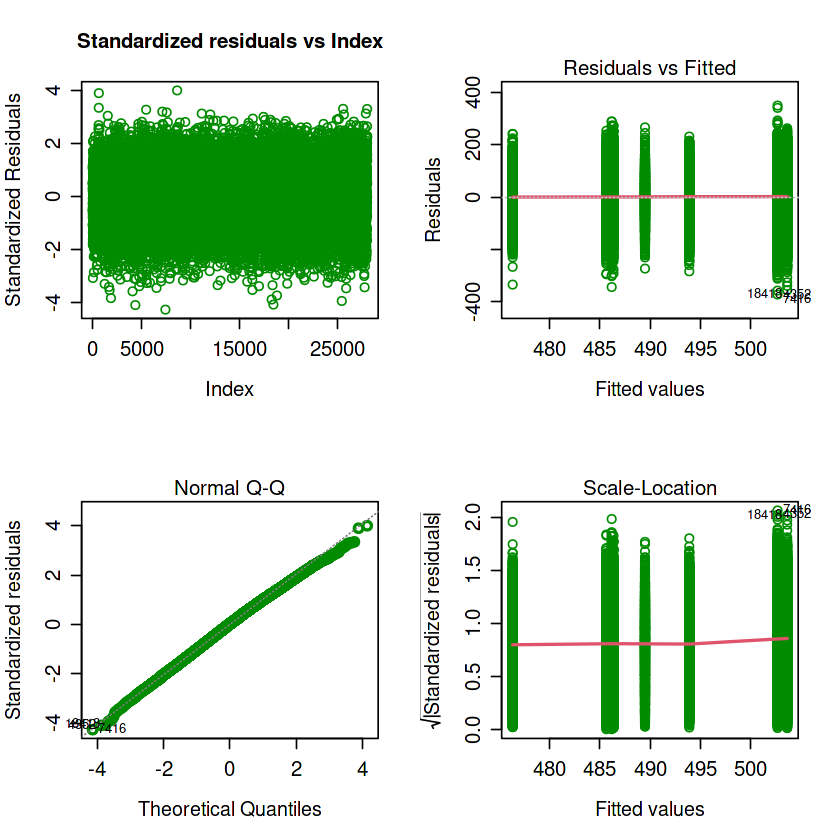


Call:
lm(formula = get(science) ~ Year + Region + Year:Region, data = GB.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-335.38  -67.59    2.42   67.80  392.02 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              522.459      1.326 394.027  < 2e-16 ***
Year2018                 -14.838      1.871  -7.931 2.26e-15 ***
RegionNorthIre           -23.490      2.358  -9.961  < 2e-16 ***
RegionWales              -39.305      2.099 -18.729  < 2e-16 ***
RegionScotland           -27.658      2.166 -12.766  < 2e-16 ***
Year2018:RegionNorthIre   10.123      3.330   3.040  0.00237 ** 
Year2018:RegionWales      22.784      3.005   7.582 3.52e-14 ***
Year2018:RegionScotland    9.380      3.079   3.046  0.00232 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.56 on 27967 degrees of freedom
Multiple R-squared:  0.01792,	Adjusted R-squared:  0.01767 
F-statistic:  72.9 on 7 and 27967 DF,  p-

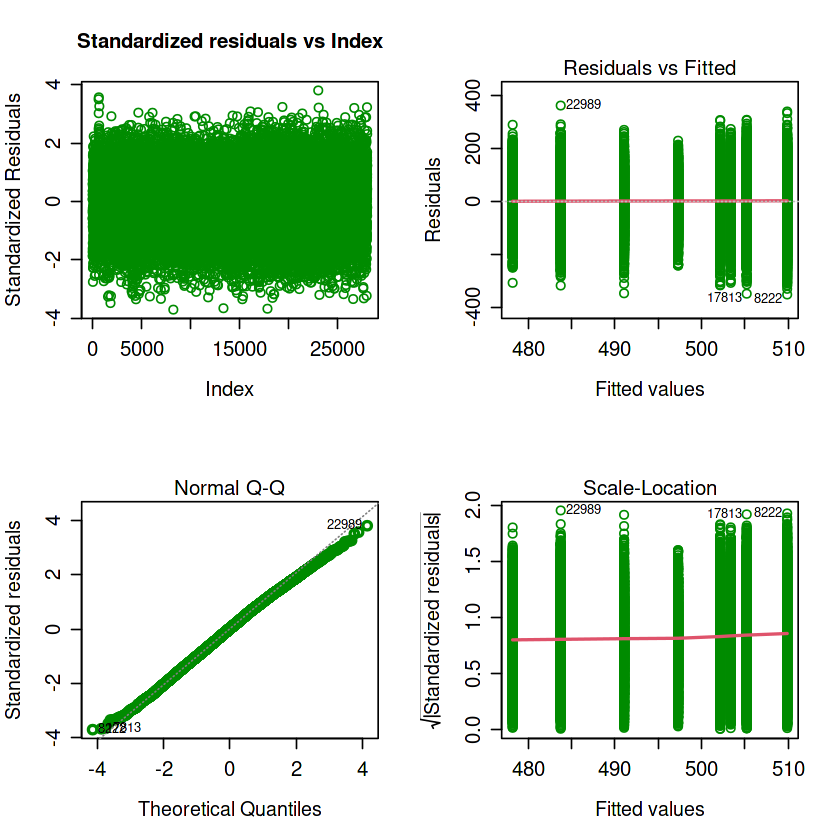

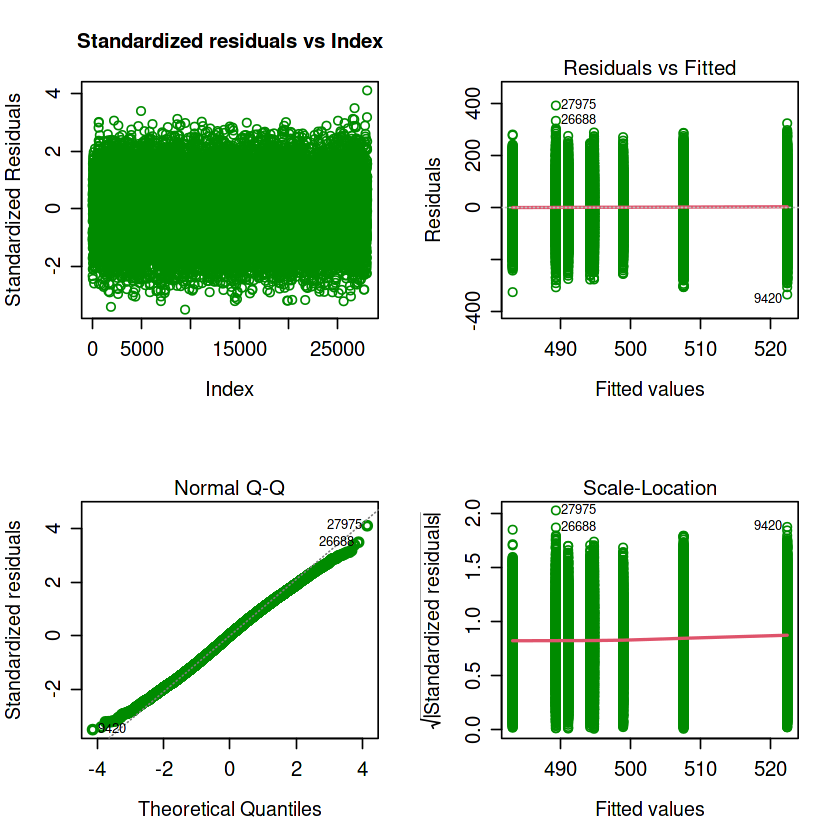

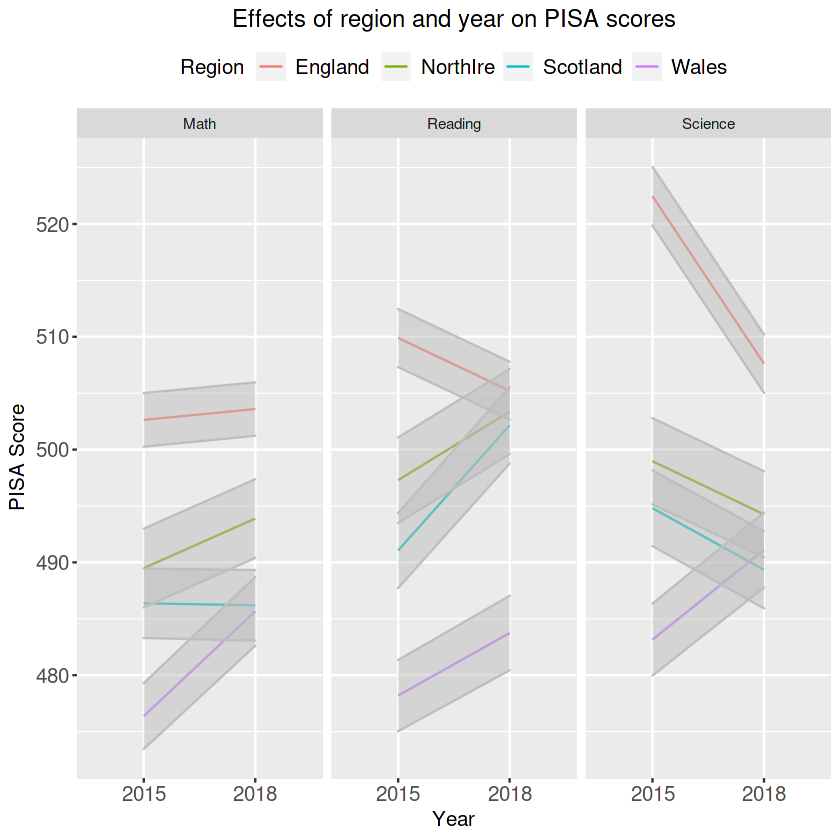

In [14]:
# The generalized linear model for the math subject
fit.YearReg.math = lm(get(math) ~ Year + Region + Year:Region, data = GB.df)
summary(fit.YearReg.math)
par(mfrow = c(2, 2))
plot(rstudent(fit.YearReg.math), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.YearReg.math, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
Effect.math = as.data.frame(effect("Year*Region", fit.YearReg.math))

# The generalized linear model for the reading subject
fit.YearReg.reading = lm(get(reading) ~ Year + Region + Year:Region, data = GB.df)
summary(fit.YearReg.reading)
plot(rstudent(fit.YearReg.reading), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.YearReg.reading, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
Effect.reading = as.data.frame(effect("Year*Region", fit.YearReg.reading))

# The generalized linear model for the science subject
fit.YearReg.science = lm(get(science) ~ Year + Region + Year:Region, data = GB.df)
summary(fit.YearReg.science)
plot(rstudent(fit.YearReg.science), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "green4")
plot(fit.YearReg.science, col = "green4", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
Effect.science = as.data.frame(effect("Year*Region", fit.YearReg.science))

# Visualize the difference of PISA scores between the UK nations and the changes
# from 2015 to 2018, i.e. the effects of the variable `Region` and `Year`
Effects = rbind(Effect.math, Effect.reading, Effect.science) %>%
  mutate(Subject = c(rep("Math", 8), rep("Reading", 8), rep("Science", 8)))
Effects %>% ggplot(aes(x = Year, y = fit, color = Region)) +
  geom_line(aes(group = Region)) + facet_wrap(~Subject, ncol = 3) +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = Region),
              color = "gray", fill = "gray", alpha = 0.5) +
  labs(y = "PISA Score", title = "Effects of region and year on PISA scores") +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12), legend.position = "top",
        legend.text = element_text(size = 12))
ggsave("P4F5.png", width = 8, height = 5)
graphics.off()

**3. The analyses based on Bayesian modelling**

(1) Construct Bayesian linear regression models for every subject and sample from the posterior distributions of the model parameters  
(2) Compute and visualize the posterior predictive samples (density) of the average PISA score of each subject for each group of data

Warning message in .recacheSubclasses(def@className, def, env):
“undefined subclass "numericVector" of class "Mnumeric"; definition not updated”



Call:
   c("inla(formula = get(math) ~ ISCED + ESCS + Gender + TMINS + Region + 
   ", " I(exp(-3 * Deprived)) + Year + School.Type + Total.Student + ", " 
   School.Type:Region + IMMIG:Region + ESCS:TMINS, family = \"gaussian\", 
   ", " data = GB.df, control.compute = list(config = TRUE), 
   control.family = list(hyper = prec.prior), ", " control.fixed = 
   prior.beta)") 
Time used:
    Pre = 1.31, Running = 17.8, Post = 0.256, Total = 19.4 
Fixed effects:
                                     mean     sd 0.025quant 0.5quant 0.975quant
(Intercept)                       433.997  9.110    416.111  433.996    451.867
ISCED1                             16.266 12.356     -7.993   16.265     40.504
ISCED2                             25.191  8.964      7.591   25.191     42.776
ISCED3                             20.525  8.541      3.757   20.524     37.278
ISCED4                             19.489  8.555      2.693   19.489     36.271
ISCED5                              2.604  8.594    -1

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3732166  199.4   6044302   322.9   6044302  322.9
Vcells 133889093 1021.5 452737383  3454.2 565919908 4317.7


Call:
   c("inla(formula = get(reading) ~ ISCED + ESCS + Gender + TMINS + ", " 
   Region + I(exp(-3 * Deprived)) + Year + School.Type + Total.Student + 
   ", " School.Type:Region + IMMIG:Region + ESCS:TMINS, family = 
   \"gaussian\", ", " data = GB.df, control.compute = list(config = TRUE), 
   control.family = list(hyper = prec.prior), ", " control.fixed = 
   prior.beta)") 
Time used:
    Pre = 0.911, Running = 15.3, Post = 0.127, Total = 16.3 
Fixed effects:
                                     mean     sd 0.025quant 0.5quant 0.975quant
(Intercept)                       458.765  9.775    439.550  458.773    477.920
ISCED1                              5.636 13.224    -20.324    5.634     31.581
ISCED2                             26.725  9.535      8.017   26.720     45.443
ISCED3                             27.647  9.063      9.870   27.641     45.442
ISCED4                             23.416  9.078      5.610   23.410     41.241
ISCED5                              6.931  9.121  

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3736651  199.6   6044302   322.9   6044302  322.9
Vcells 220366231 1681.3 669768778  5110.0 669767991 5110.0


Call:
   c("inla(formula = get(science) ~ ISCED + ESCS + Gender + TMINS + ", " 
   Region + I(exp(-3 * Deprived)) + Year + School.Type + Total.Student + 
   ", " School.Type:Region + IMMIG:Region + ESCS:TMINS, family = 
   \"gaussian\", ", " data = GB.df, control.compute = list(config = TRUE), 
   control.family = list(hyper = prec.prior), ", " control.fixed = 
   prior.beta)") 
Time used:
    Pre = 0.906, Running = 16.8, Post = 0.0919, Total = 17.8 
Fixed effects:
                                     mean     sd 0.025quant 0.5quant 0.975quant
(Intercept)                       460.094  9.567    441.310  460.093    478.861
ISCED1                              6.005 13.013    -19.543    6.004     31.531
ISCED2                             14.889  9.395     -3.557   14.888     33.319
ISCED3                             13.459  8.934     -4.082   13.458     30.985
ISCED4                             10.673  8.949     -6.896   10.673     28.229
ISCED5                             -3.831  8.991 

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3740955  199.8   6044302   322.9   6044302  322.9
Vcells 305854733 2333.5 803802533  6132.6 803794729 6132.5

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3738507  199.7   6044302   322.9   6044302  322.9
Vcells 222031608 1694.0 643042027  4906.1 803794729 6132.5

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3738509  199.7   6044302   322.9   6044302  322.9
Vcells 222025632 1694.0 643042027  4906.1 803794729 6132.5

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3735505  199.5   6044302   322.9   6044302  322.9
Vcells 138066662 1053.4 514433622  3924.9 803794729 6132.5

used      (Mb)   gc trigger (Mb)   max used  (Mb)  
Ncells   3735500  199.5   6044302   322.9   6044302  322.9
Vcells 138060657 1053.4 411546898  3139.9 803794729 6132.5

used     (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells  3701522 197.7   6044302   322.9   6044302  322.9
Vcells 54039837 412.3 329237519  2511.9 803794729 6132.5

used     (Mb)  gc trigger (Mb)   max used  (Mb)  
Ncells  3698516 197.6   6044302   322.9   6044302  322.9
Vcells 54027831 412.2 263390016  2009.6 803794729 6132.5

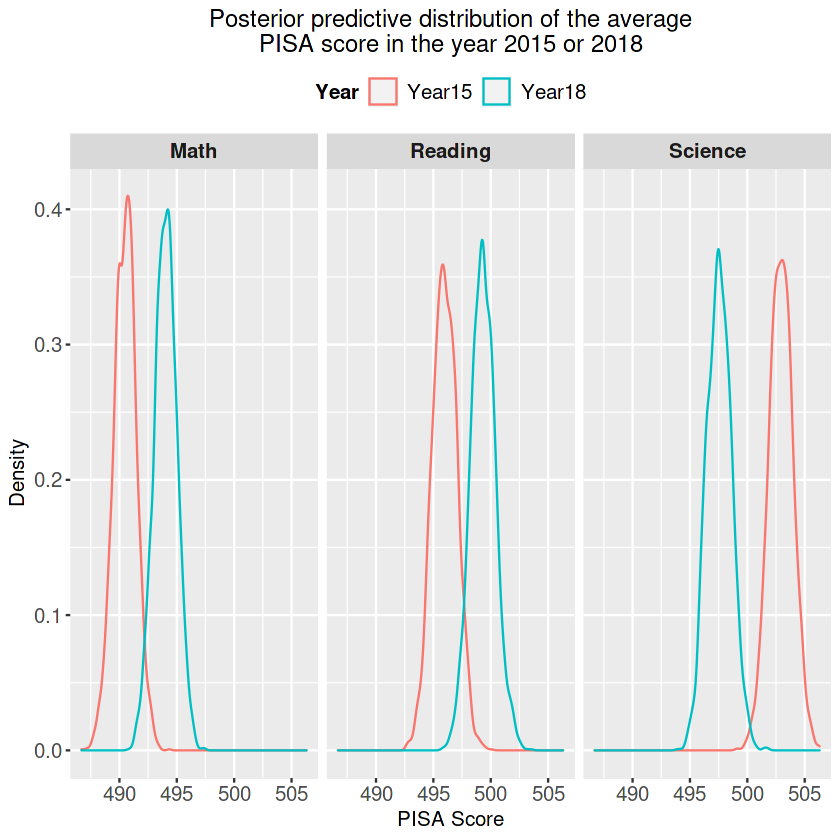

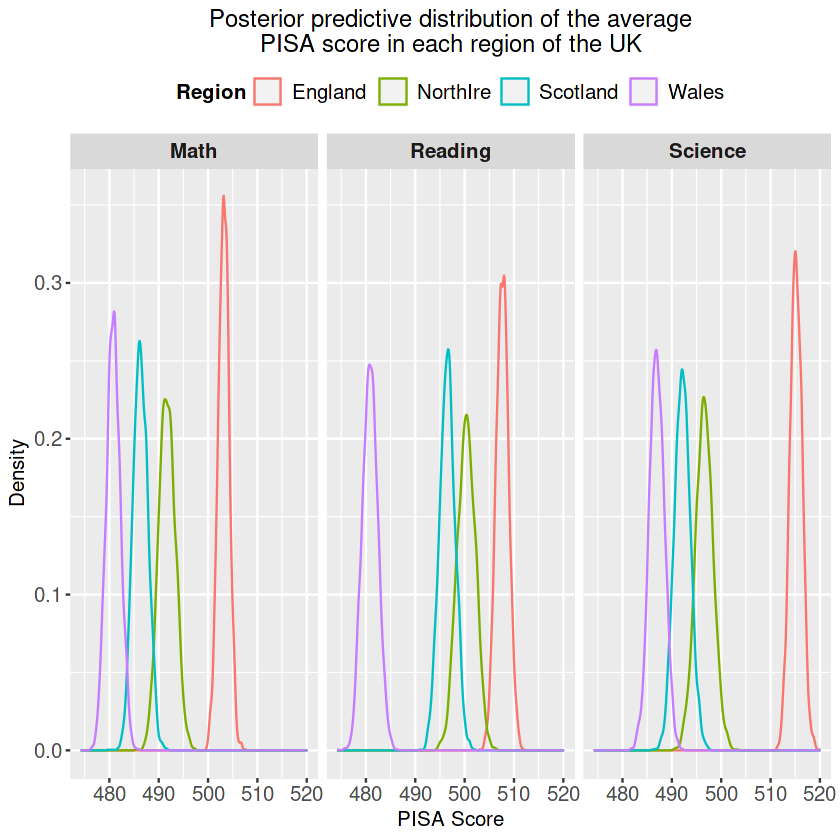

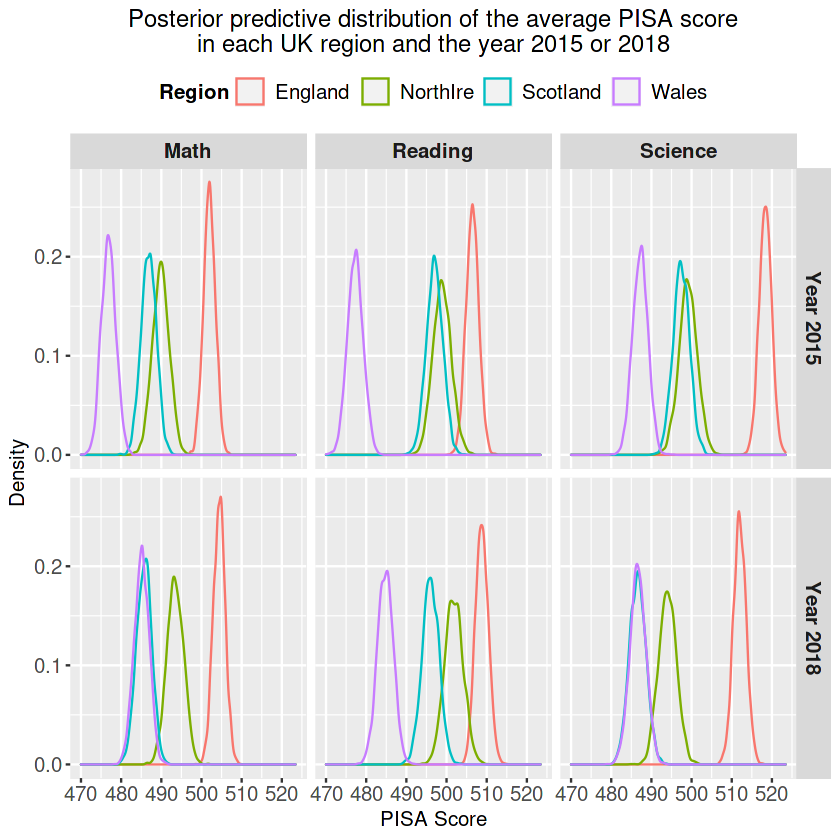

In [15]:
# Specify priors for regression parameters (coefficients) and the standard
# deviation of the response variable
prec.prior = list(prec = list(prior = "logtnormal", param = c(100, 0.01)))
prior.beta = list(mean.intercept = 0, prec.intercept = 0.001,
  mean = 0, prec = 0.001)

# Construct the Bayesian linear regression model for math subject and
# sample from the posterior distributions of the model parameters
Math.inla.model = inla(formula = get(math) ~ ISCED + ESCS + Gender +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + School.Type:Region + IMMIG:Region + ESCS:TMINS,
  data = GB.df, family = "gaussian", control.compute = list(config = TRUE),
  control.fixed = prior.beta, control.family = list(hyper = prec.prior))
summary(Math.inla.model)
nsamp = 3000; set.seed(1000)
inla.seed = as.integer(runif(1)*.Machine$integer.max)
Math.inla.sample = inla.posterior.sample(
  n = nsamp, result = Math.inla.model, seed = inla.seed, num.threads = "1:1")
Math.predictor = data.frame(
  inla.posterior.sample.eval(function(...){Predictor}, Math.inla.sample))
Math.sigma = 1/sqrt(inla.posterior.sample.eval(function(...){theta}, Math.inla.sample))
gc(rm(Math.inla.sample))

# Construct the Bayesian linear regression model for reading subject and
# sample from the posterior distributions of the model parameters
Read.inla.model = inla(formula = get(reading) ~ ISCED + ESCS + Gender +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + School.Type:Region + IMMIG:Region + ESCS:TMINS,
  data = GB.df, family = "gaussian", control.compute = list(config = TRUE),
  control.fixed = prior.beta, control.family = list(hyper = prec.prior))
summary(Read.inla.model)
nsamp = 3000; set.seed(1500)
inla.seed = as.integer(runif(1)*.Machine$integer.max)
Read.inla.sample = inla.posterior.sample(
  n = nsamp, result = Read.inla.model, seed = inla.seed, num.threads = "1:1")
Read.predictor = data.frame(
  inla.posterior.sample.eval(function(...){Predictor}, Read.inla.sample))
Read.sigma = 1/sqrt(inla.posterior.sample.eval(function(...){theta}, Read.inla.sample))
gc(rm(Read.inla.sample))

# Construct the Bayesian linear regression model for science subject and
# sample from the posterior distributions of the model parameters
Scie.inla.model = inla(formula = get(science) ~ ISCED + ESCS + Gender +
  TMINS + Region + I(exp(-3*Deprived)) + Year + School.Type +
  Total.Student + School.Type:Region + IMMIG:Region + ESCS:TMINS,
  data = GB.df, family = "gaussian", control.compute = list(config = TRUE),
  control.fixed = prior.beta, control.family = list(hyper = prec.prior))
summary(Scie.inla.model)
nsamp = 3000; set.seed(2000)
inla.seed = as.integer(runif(1)*.Machine$integer.max)
Scie.inla.sample = inla.posterior.sample(
  n = nsamp, result = Scie.inla.model, seed = inla.seed, num.threads = "1:1")
Scie.predictor = data.frame(
  inla.posterior.sample.eval(function(...){Predictor}, Scie.inla.sample))
Scie.sigma = 1/sqrt(inla.posterior.sample.eval(function(...){theta}, Scie.inla.sample))
gc(rm(Scie.inla.sample))

# Create the data frames that will be used to record the results
Subject = c(rep("Math", nsamp), rep("Reading", nsamp), rep("Science", nsamp))
Year.aver = data.frame(
  Subject = Subject, Year15 = numeric(3*nsamp), Year18 = numeric(3*nsamp))
Region.aver = data.frame(
  Subject = Subject, England = numeric(3*nsamp), NorthIre = numeric(3*nsamp),
  Wales = numeric(3*nsamp), Scotland = numeric(3*nsamp))
YearReg.aver = data.frame(
  Subject = Subject, England_15 = numeric(3*nsamp), England_18 = numeric(3*nsamp),
  NorthIre_15 = numeric(3*nsamp), NorthIre_18 = numeric(3*nsamp),
  Wales_15 = numeric(3*nsamp), Wales_18 = numeric(3*nsamp),
  Scotland_15 = numeric(3*nsamp), Scotland_18 = numeric(3*nsamp))

# Calculate some parameters
Year.n1 = sum(GB.df$Year == 2015)
Year.n2 = sum(GB.df$Year == 2018)
Region.n1 = sum(GB.df$Region == "England")
Region.n2 = sum(GB.df$Region == "NorthIre")
Region.n3 = sum(GB.df$Region == "Wales")
Region.n4 = sum(GB.df$Region == "Scotland")
YearReg.n1 = sum((GB.df$Year == 2015) & (GB.df$Region == "England"))
YearReg.n2 = sum((GB.df$Year == 2018) & (GB.df$Region == "England"))
YearReg.n3 = sum((GB.df$Year == 2015) & (GB.df$Region == "NorthIre"))
YearReg.n4 = sum((GB.df$Year == 2018) & (GB.df$Region == "NorthIre"))
YearReg.n5 = sum((GB.df$Year == 2015) & (GB.df$Region == "Wales"))
YearReg.n6 = sum((GB.df$Year == 2018) & (GB.df$Region == "Wales"))
YearReg.n7 = sum((GB.df$Year == 2015) & (GB.df$Region == "Scotland"))
YearReg.n8 = sum((GB.df$Year == 2018) & (GB.df$Region == "Scotland"))

# Compute the posterior predictive samples of the average PISA score
# of each subject for each group
attach(GB.df)
for(i in 1:nsamp){
  # Compute the posterior predictive samples of the average PISA score of the
  # whole UK in the year 2015 and 2018 respectively for each subject
  Year.aver[i, "Year15"] = mean(rnorm(n = Year.n1,
    mean = Math.predictor[Year == 2015, i], sd = Math.sigma[, i]))
  Year.aver[i, "Year18"] = mean(rnorm(n = Year.n2,
    mean = Math.predictor[Year == 2018, i], sd = Math.sigma[, i]))
  Year.aver[i + nsamp, "Year15"] = mean(rnorm(n = Year.n1,
    mean = Read.predictor[Year == 2015, i], sd = Read.sigma[, i]))
  Year.aver[i + nsamp, "Year18"] = mean(rnorm(n = Year.n2,
    mean = Read.predictor[Year == 2018, i], sd = Read.sigma[, i]))
  Year.aver[i + 2*nsamp, "Year15"] = mean(rnorm(n = Year.n1,
    mean = Scie.predictor[Year == 2015, i], sd = Scie.sigma[, i]))
  Year.aver[i + 2*nsamp, "Year18"] = mean(rnorm(n = Year.n2,
    mean = Scie.predictor[Year == 2018, i], sd = Scie.sigma[, i]))

  # Compute the posterior predictive samples of the average PISA score of each region in
  # the UK respectively (combining the data of the year 2015 and 2018) for each subject
  Region.aver[i, "England"] = mean(rnorm(n = Region.n1,
    mean = Math.predictor[Region == "England", i], sd = Math.sigma[, i]))
  Region.aver[i, "NorthIre"] = mean(rnorm(n = Region.n2,
    mean = Math.predictor[Region == "NorthIre", i], sd = Math.sigma[, i]))
  Region.aver[i, "Wales"] = mean(rnorm(n = Region.n3,
    mean = Math.predictor[Region == "Wales", i], sd = Math.sigma[, i]))
  Region.aver[i, "Scotland"] = mean(rnorm(n = Region.n4,
    mean = Math.predictor[Region == "Scotland", i], sd = Math.sigma[, i]))
  Region.aver[i + nsamp, "England"] = mean(rnorm(n = Region.n1,
    mean = Read.predictor[Region == "England", i], sd = Read.sigma[, i]))
  Region.aver[i + nsamp, "NorthIre"] = mean(rnorm(n = Region.n2,
    mean = Read.predictor[Region == "NorthIre", i], sd = Read.sigma[, i]))
  Region.aver[i + nsamp, "Wales"] = mean(rnorm(n = Region.n3,
    mean = Read.predictor[Region == "Wales", i], sd = Read.sigma[, i]))
  Region.aver[i + nsamp, "Scotland"] = mean(rnorm(n = Region.n4,
    mean = Read.predictor[Region == "Scotland", i], sd = Read.sigma[, i]))
  Region.aver[i + 2*nsamp, "England"] = mean(rnorm(n = Region.n1,
    mean = Scie.predictor[Region == "England", i], sd = Scie.sigma[, i]))
  Region.aver[i + 2*nsamp, "NorthIre"] = mean(rnorm(n = Region.n2,
    mean = Scie.predictor[Region == "NorthIre", i], sd = Scie.sigma[, i]))
  Region.aver[i + 2*nsamp, "Wales"] = mean(rnorm(n = Region.n3,
    mean = Scie.predictor[Region == "Wales", i], sd = Scie.sigma[, i]))
  Region.aver[i + 2*nsamp, "Scotland"] = mean(rnorm(n = Region.n4,
    mean = Scie.predictor[Region == "Scotland", i], sd = Scie.sigma[, i]))

  # Compute the posterior predictive samples of the average PISA score of each UK region
  # in the year 2015 or 2018 respectively for each subject

  # The computation for math subject
  YearReg.aver[i, "England_15"] = mean(rnorm(n = YearReg.n1, mean =
    Math.predictor[(Year == 2015) & (Region == "England"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "England_18"] = mean(rnorm(n = YearReg.n2, mean =
    Math.predictor[(Year == 2018) & (Region == "England"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "NorthIre_15"] = mean(rnorm(n = YearReg.n3, mean =
    Math.predictor[(Year == 2015) & (Region == "NorthIre"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "NorthIre_18"] = mean(rnorm(n = YearReg.n4, mean =
    Math.predictor[(Year == 2018) & (Region == "NorthIre"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "Wales_15"] = mean(rnorm(n = YearReg.n5, mean =
    Math.predictor[(Year == 2015) & (Region == "Wales"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "Wales_18"] = mean(rnorm(n = YearReg.n6, mean =
    Math.predictor[(Year == 2018) & (Region == "Wales"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "Scotland_15"] = mean(rnorm(n = YearReg.n7, mean =
    Math.predictor[(Year == 2015) & (Region == "Scotland"), i], sd = Math.sigma[, i]))
  YearReg.aver[i, "Scotland_18"] = mean(rnorm(n = YearReg.n8, mean =
    Math.predictor[(Year == 2018) & (Region == "Scotland"), i], sd = Math.sigma[, i]))

  # The computation for reading subject
  YearReg.aver[i + nsamp, "England_15"] = mean(rnorm(n = YearReg.n1, mean =
    Read.predictor[(Year == 2015) & (Region == "England"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "England_18"] = mean(rnorm(n = YearReg.n2, mean =
    Read.predictor[(Year == 2018) & (Region == "England"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "NorthIre_15"] = mean(rnorm(n = YearReg.n3, mean =
    Read.predictor[(Year == 2015) & (Region == "NorthIre"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "NorthIre_18"] = mean(rnorm(n = YearReg.n4, mean =
    Read.predictor[(Year == 2018) & (Region == "NorthIre"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "Wales_15"] = mean(rnorm(n = YearReg.n5, mean =
    Read.predictor[(Year == 2015) & (Region == "Wales"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "Wales_18"] = mean(rnorm(n = YearReg.n6, mean =
    Read.predictor[(Year == 2018) & (Region == "Wales"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "Scotland_15"] = mean(rnorm(n = YearReg.n7, mean =
    Read.predictor[(Year == 2015) & (Region == "Scotland"), i], sd = Read.sigma[, i]))
  YearReg.aver[i + nsamp, "Scotland_18"] = mean(rnorm(n = YearReg.n8, mean =
    Read.predictor[(Year == 2018) & (Region == "Scotland"), i], sd = Read.sigma[, i]))

  # The computation for science subject
  YearReg.aver[i + 2*nsamp, "England_15"] = mean(rnorm(n = YearReg.n1, mean =
    Scie.predictor[(Year == 2015) & (Region == "England"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "England_18"] = mean(rnorm(n = YearReg.n2, mean =
    Scie.predictor[(Year == 2018) & (Region == "England"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "NorthIre_15"] = mean(rnorm(n = YearReg.n3, mean =
    Scie.predictor[(Year == 2015) & (Region == "NorthIre"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "NorthIre_18"] = mean(rnorm(n = YearReg.n4, mean =
    Scie.predictor[(Year == 2018) & (Region == "NorthIre"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "Wales_15"] = mean(rnorm(n = YearReg.n5, mean =
    Scie.predictor[(Year == 2015) & (Region == "Wales"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "Wales_18"] = mean(rnorm(n = YearReg.n6, mean =
    Scie.predictor[(Year == 2018) & (Region == "Wales"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "Scotland_15"] = mean(rnorm(n = YearReg.n7, mean =
    Scie.predictor[(Year == 2015) & (Region == "Scotland"), i], sd = Scie.sigma[, i]))
  YearReg.aver[i + 2*nsamp, "Scotland_18"] = mean(rnorm(n = YearReg.n8, mean =
    Scie.predictor[(Year == 2018) & (Region == "Scotland"), i], sd = Scie.sigma[, i]))
}
gc(rm(Math.predictor)); gc(rm(Math.sigma))
gc(rm(Read.predictor)); gc(rm(Read.sigma))
gc(rm(Scie.predictor)); gc(rm(Scie.sigma))
detach(GB.df)

# Visualize the posterior predictive density of the average PISA score of
# each subject for each group

# Visualize the posterior predictive density of the average PISA score of the
# whole UK in the year 2015 and 2018 for each subject respectively
Year.aver %>% pivot_longer(cols = Year15:Year18,
  names_to = "Year", values_to = "Score") %>%
  ggplot(aes(x = Score, color = Year)) +
  geom_density() + facet_wrap(~Subject, ncol = 3) +
  labs(x = "PISA Score", y = "Density",
       title = paste("Posterior predictive distribution of the average\n",
                     "PISA score in the year 2015 or 2018", sep = "")) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
ggsave("P4F6.png", width = 8, height = 5)

# Visualize the posterior predictive density of the average PISA score of each region in
# the UK (combining the data of the year 2015 and 2018) for each subject respectively
Region.aver %>% pivot_longer(cols = England:Scotland,
  names_to = "Region", values_to = "Score") %>%
  ggplot(aes(x = Score, color = Region)) +
  geom_density() + facet_wrap(~Subject, ncol = 3) +
  labs(x = "PISA Score", y = "Density",
       title = paste("Posterior predictive distribution of the average\n",
                     "PISA score in each region of the UK", sep = "")) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
ggsave("P4F7.png", width = 8, height = 5)

# Visualize the posterior predictive density of the average PISA score of each UK region
# in the year 2015 or 2018 for each subject respectively
Year.labs = c("Year 2015", "Year 2018"); names(Year.labs) = c("15", "18")
YearReg.aver %>% pivot_longer(cols = England_15:Scotland_18,
  names_to = c("Region", "Year"), names_sep = "_", values_to = "Score") %>%
  ggplot(aes(x = Score, color = Region)) + geom_density() +
  facet_grid(Year ~ Subject, labeller = labeller(Year = Year.labs)) +
  labs(x = "PISA Score", y = "Density",
       title = paste("Posterior predictive distribution of the average PISA score\n",
                     "in each UK region and the year 2015 or 2018", sep = "")) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        strip.text = element_text(size = 12, face = "bold"),
        plot.title = element_text(hjust = 0.5, size = 14),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
ggsave("P4F8.png", width = 8, height = 6)

## Part 5 - Comparison of Competition Pressure between the UK and Italy
In this section, I am going to compare the pressure of competition on students between the UK and Italy and its effects on PISA scores in these two countries.

Firstly, I load the data set `Competition18.RData` which is extracted from the original data file of PISA.  
You need to upload this data set to the following path on Kaggle:  
**"../input/competition/Competition18.RData"**

Then, I perform some operations on this data set and draw a boxplot to compare the overall competition pressure on students between the UK and Italy.

     CNT               PV1MATH         PV2MATH         PV3MATH     
 Length:25603       Min.   :114.0   Min.   :142.9   Min.   :109.5  
 Class :character   1st Qu.:435.2   1st Qu.:434.4   1st Qu.:434.4  
 Mode  :character   Median :498.1   Median :498.0   Median :496.7  
                    Mean   :495.9   Mean   :494.7   Mean   :494.2  
                    3rd Qu.:558.9   3rd Qu.:557.2   3rd Qu.:557.1  
                    Max.   :815.5   Max.   :779.5   Max.   :835.7  
                                                                   
    PV4MATH          PV5MATH         PV1READ         PV2READ     
 Min.   : 89.98   Min.   :102.9   Min.   :148.7   Min.   :148.6  
 1st Qu.:435.04   1st Qu.:433.6   1st Qu.:425.6   1st Qu.:424.8  
 Median :497.97   Median :497.3   Median :494.5   Median :493.5  
 Mean   :495.45   Mean   :494.7   Mean   :491.3   Mean   :490.8  
 3rd Qu.:557.39   3rd Qu.:557.8   3rd Qu.:559.3   3rd Qu.:559.9  
 Max.   :803.70   Max.   :792.9   Max.   :841.6   Max.   :84

   Country             PV1MATH         PV2MATH         PV3MATH     
 Length:21045       Min.   :114.0   Min.   :142.9   Min.   :109.5  
 Class :character   1st Qu.:442.5   1st Qu.:440.9   1st Qu.:440.5  
 Mode  :character   Median :504.0   Median :503.1   Median :501.8  
                    Mean   :501.6   Mean   :500.0   Mean   :500.0  
                    3rd Qu.:563.1   3rd Qu.:561.6   3rd Qu.:561.6  
                    Max.   :815.5   Max.   :779.5   Max.   :835.7  
    PV4MATH          PV5MATH         PV1READ         PV2READ     
 Min.   : 89.98   Min.   :102.9   Min.   :177.1   Min.   :148.6  
 1st Qu.:441.53   1st Qu.:440.0   1st Qu.:434.7   1st Qu.:433.7  
 Median :502.73   Median :502.4   Median :502.0   Median :501.3  
 Mean   :500.84   Mean   :500.1   Mean   :499.5   Mean   :499.1  
 3rd Qu.:561.85   3rd Qu.:562.5   3rd Qu.:565.7   3rd Qu.:566.9  
 Max.   :803.70   Max.   :792.9   Max.   :841.6   Max.   :844.7  
    PV3READ         PV4READ         PV5READ         PV1SCIE   

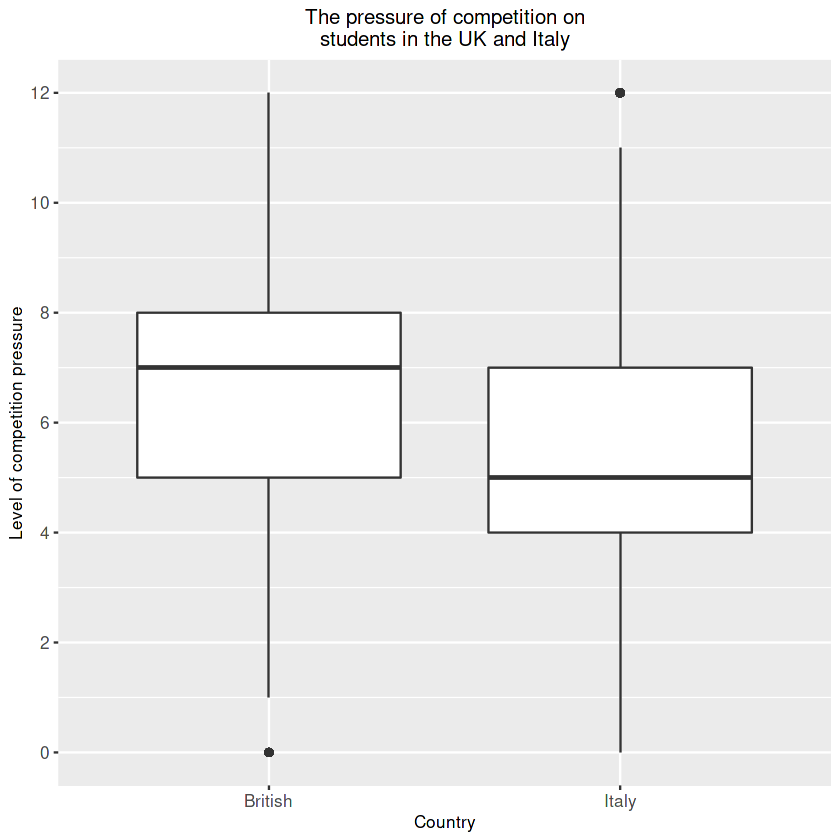

In [16]:
# Load the data set `Competition18.RData`, which records the information
# about the competition pressure on students in the UK and Italy
load("../input/competition/Competition18.RData")
summary(Competition18)

# Perform some operations on this data set
Compe18.data = Competition18 %>%
  mutate(Competition = ST205Q01HA + ST205Q02HA + ST205Q03HA + ST205Q04HA - 4,
         GBR.Indi = as.integer(CNT == "GBR"),
         CNT = ifelse(CNT == "GBR", "British", "Italy")) %>%
  select(!c(ST205Q01HA, ST205Q02HA, ST205Q03HA, ST205Q04HA)) %>%
  rename(Country = CNT) %>%
  filter(!is.na(Competition))
summary(Compe18.data)

# Draw a boxplot to compare the overall competition pressure on students
# between the UK and Italy
Compe18.data %>% ggplot(aes(x = Country, y = Competition)) + geom_boxplot() +
  labs(title = "The pressure of competition on\nstudents in the UK and Italy") +
  ylab("Level of competition pressure") +
  scale_y_continuous(breaks = seq(0, 12, 2)) +
  theme(axis.title = element_text(size = 10), axis.text = element_text(size = 10),
        plot.title = element_text(hjust = 0.5, size = 12))
ggsave("P5F1.png", width = 4, height = 4)

**1. Conduct frequentist analyses to explore the relationship between PISA scores and competition pressure levels in British and Italy**

(1) Plot the scores of the three subjects against competition pressure levels respectively  
(2) Construct generalized linear models to predict PISA scores based on country and competition pressure level  
(3) Visualize the results of the GLMs for the three subjects

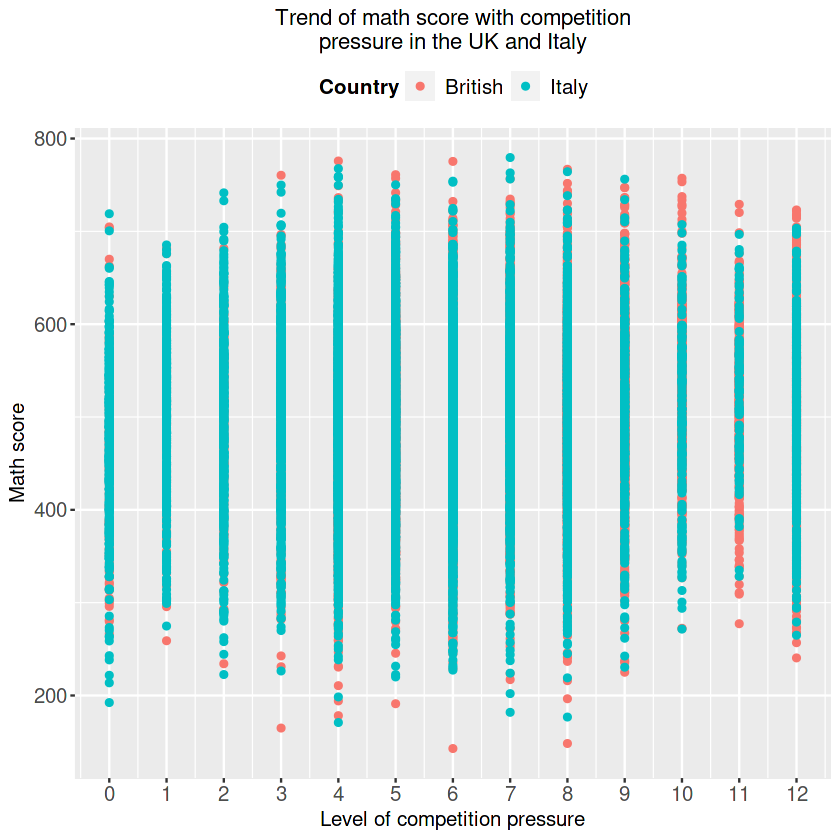

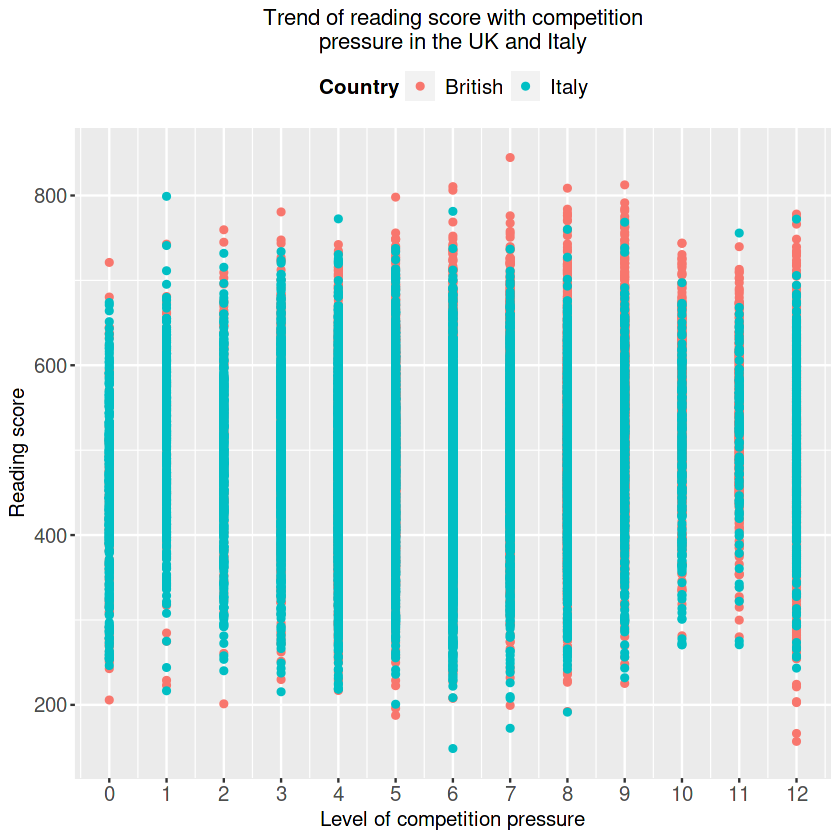


Call:
lm(formula = get(math) ~ Country + Competition + Country:Competition, 
    data = Compe18.center)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.38  -59.50    2.86   60.99  288.71 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                501.4094     0.9881 507.447  < 2e-16 ***
CountryBritish              -4.4968     1.2880  -3.491 0.000482 ***
Competition                  1.2357     0.3381   3.654 0.000258 ***
CountryBritish:Competition   2.9090     0.4553   6.389  1.7e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 87.98 on 21041 degrees of freedom
Multiple R-squared:  0.009336,	Adjusted R-squared:  0.009195 
F-statistic:  66.1 on 3 and 21041 DF,  p-value: < 2.2e-16


2.5 %      97.5 %    
(Intercept)                499.472610 503.346119
CountryBritish              -7.021292  -1.972249
Competition                  0.572937   1.898519
CountryBritish:Competition   2.016587   3.801365

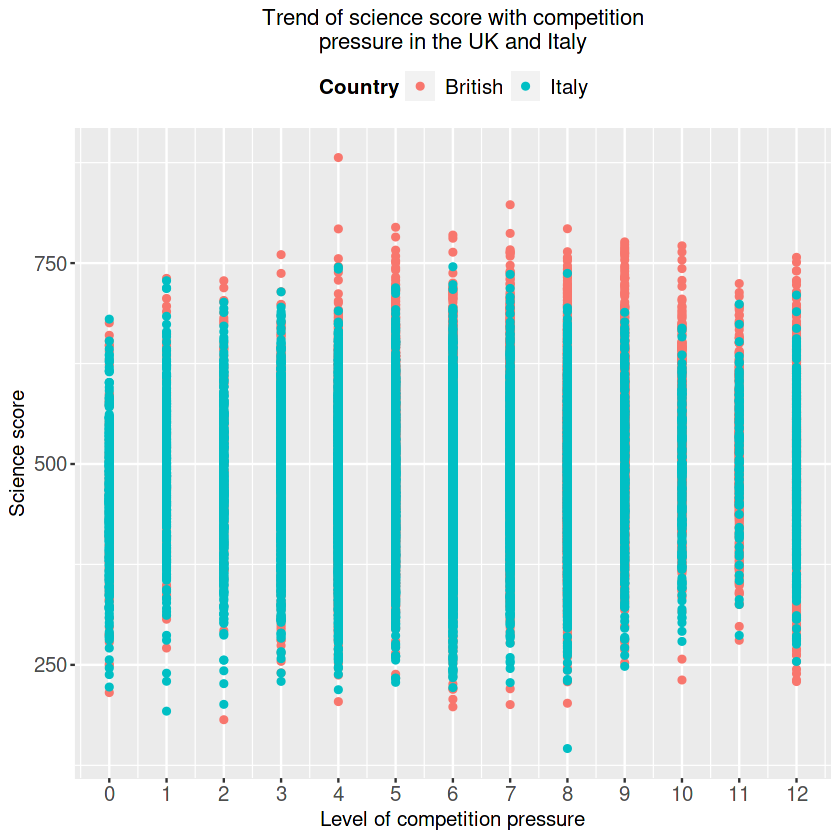

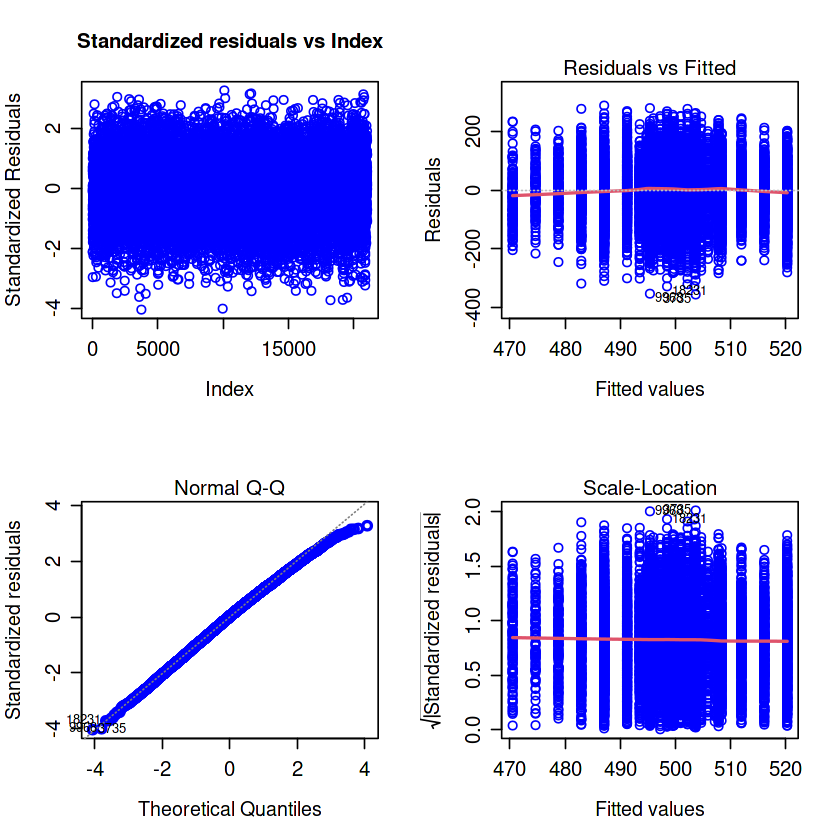


Call:
lm(formula = get(reading) ~ Country + Competition + Country:Competition, 
    data = Compe18.center)

Residuals:
    Min      1Q  Median      3Q     Max 
-370.43  -64.54    1.95   67.22  337.53 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                489.0430     1.0613 460.802  < 2e-16 ***
CountryBritish              15.5803     1.3834  11.263  < 2e-16 ***
Competition                  1.4436     0.3632   3.975 7.07e-05 ***
CountryBritish:Competition   2.6050     0.4890   5.327 1.01e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.5 on 21041 degrees of freedom
Multiple R-squared:  0.01839,	Adjusted R-squared:  0.01825 
F-statistic: 131.4 on 3 and 21041 DF,  p-value: < 2.2e-16


2.5 %       97.5 %    
(Intercept)                486.9628226 491.123228
CountryBritish              12.8687590  18.291767
Competition                  0.7316837   2.155447
CountryBritish:Competition   1.6464666   3.563437

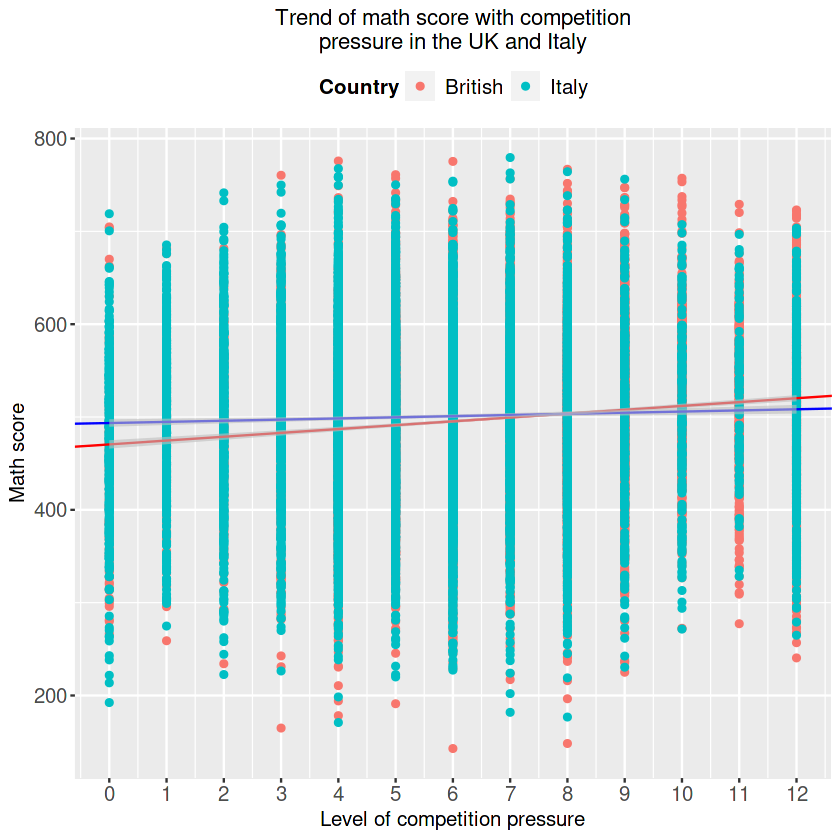

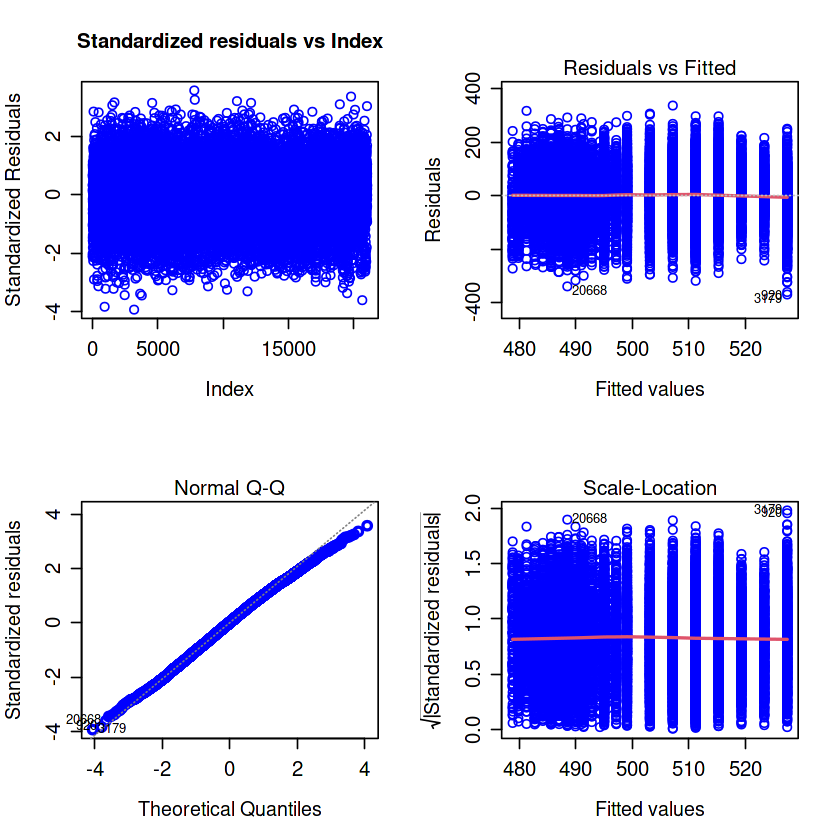


Call:
lm(formula = get(science) ~ Country + Competition + Country:Competition, 
    data = Compe18.center)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.05  -62.33    1.52   63.82  385.43 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                480.6599     1.0117 475.109  < 2e-16 ***
CountryBritish              21.9967     1.3187  16.680  < 2e-16 ***
Competition                  1.3920     0.3462   4.021 5.82e-05 ***
CountryBritish:Competition   1.4417     0.4661   3.093  0.00199 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 90.08 on 21041 degrees of freedom
Multiple R-squared:  0.02341,	Adjusted R-squared:  0.02327 
F-statistic: 168.1 on 3 and 21041 DF,  p-value: < 2.2e-16


2.5 %       97.5 %    
(Intercept)                478.6769640 482.642915
CountryBritish              19.4119063  24.581446
Competition                  0.7134145   2.070632
CountryBritish:Competition   0.5279937   2.355366

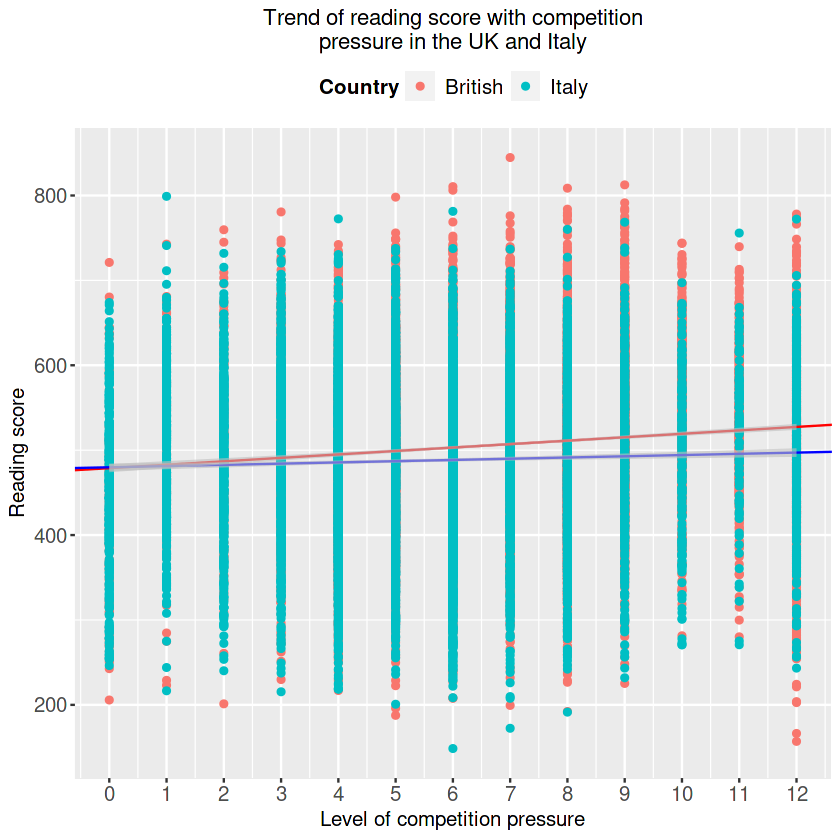

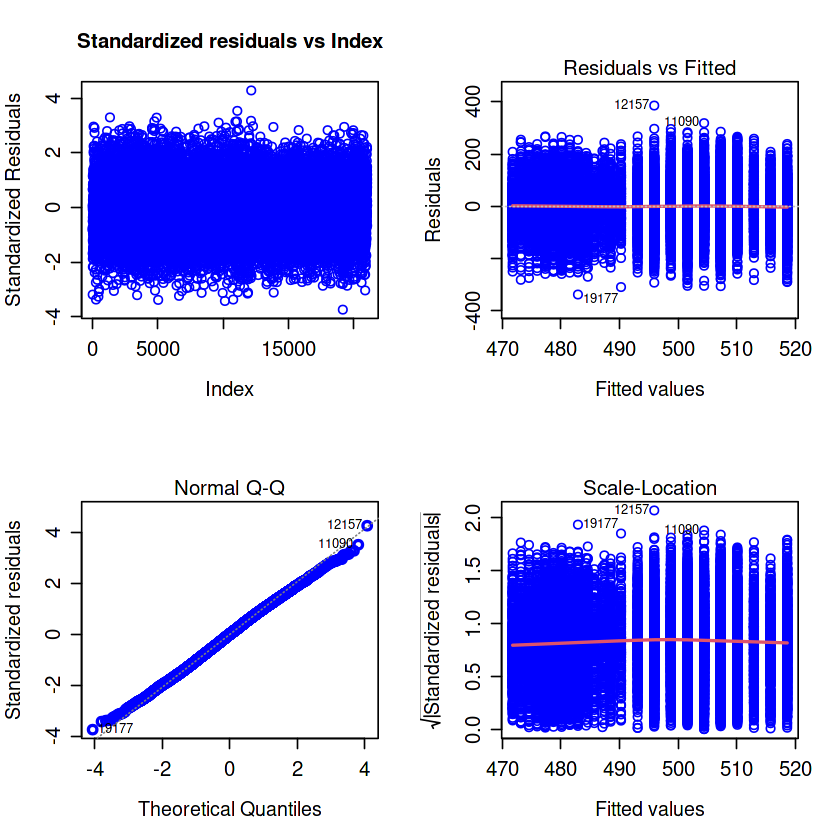

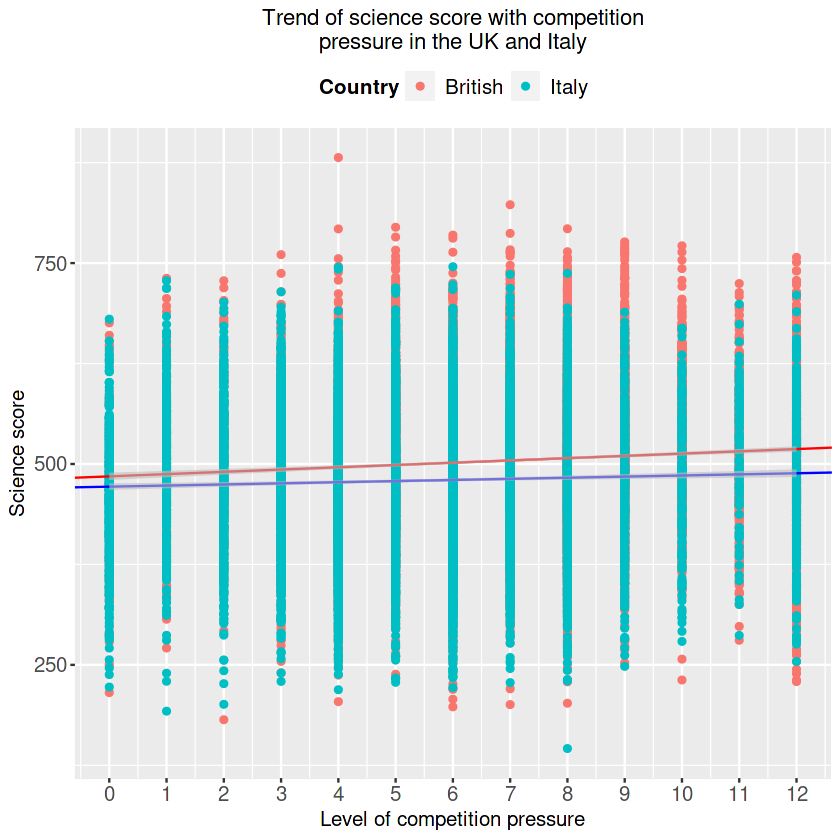

In [19]:
# Plot the scores of the three subjects against competition pressure levels

# Plot the math scores against competition pressure levels
Plot.math = Compe18.data %>%
  ggplot(aes(x = Competition, y = get(math))) +
  geom_point(aes(color = Country)) +
  xlab("Level of competition pressure") + ylab("Math score") +
  labs(title = "Trend of math score with competition\npressure in the UK and Italy") +
  scale_x_continuous(breaks = 0:12) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 13),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
Plot.math
ggsave("P5F2(1).png", width = 4, height = 5)

# Plot the reading scores against competition pressure levels
Plot.reading = Compe18.data %>%
  ggplot(aes(x = Competition, y = get(reading))) +
  geom_point(aes(color = Country)) +
  xlab("Level of competition pressure") + ylab("Reading score") +
  labs(title = "Trend of reading score with competition\npressure in the UK and Italy") +
  scale_x_continuous(breaks = 0:12) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 13),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
Plot.reading
ggsave("P5F2(2).png", width = 4, height = 5)

# Plot the science scores against competition pressure levels
Plot.science = Compe18.data %>%
  ggplot(aes(x = Competition, y = get(science))) +
  geom_point(aes(color = Country)) +
  xlab("Level of competition pressure") + ylab("Science score") +
  labs(title = "Trend of science score with competition\npressure in the UK and Italy") +
  scale_x_continuous(breaks = 0:12) +
  theme(axis.title = element_text(size = 12), axis.text = element_text(size = 12),
        plot.title = element_text(hjust = 0.5, size = 13),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12), legend.position = "top")
Plot.science
ggsave("P5F2(3).png", width = 4, height = 5)

# Center the variable of competition pressure levels and set the variable
# `Country` as factor type (set Italy as the baseline class)
compe.mean = mean(Compe18.data$Competition)
Compe18.center = Compe18.data %>%
  mutate(Competition = Competition - mean(Competition),
         Country = factor(Country, levels = c("Italy", "British")))

# Create the data ponits based on which we will predict the PISA scores
# and build confidence intervals
breaks = seq(0, 12, 0.1); n = length(breaks)
data.predict = data.frame(
  Country = c(rep("British", n), rep("Italy", n)),
  Competition = rep(breaks, 2) - compe.mean)

# Construct generalized linear models to predict PISA scores
# based on country and competition pressure level

# The model to predict math scores based on country and competition pressure level
Compe18.fit.math = lm(get(math) ~ Country + Competition + Country:Competition,
                      data = Compe18.center)
summary(Compe18.fit.math)
confint(Compe18.fit.math)
par(mfrow = c(2, 2))
plot(rstudent(Compe18.fit.math), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "blue")
plot(Compe18.fit.math, col = "blue", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
coeffi = Compe18.fit.math$coefficients
ITA.inter = coeffi["(Intercept)"]; ITA.slope = coeffi["Competition"]
GBR.inter = ITA.inter + coeffi["CountryBritish"]
GBR.slope = ITA.slope + coeffi["CountryBritish:Competition"]
prediction = data.frame(
  predict(Compe18.fit.math, newdata = data.predict, interval = "confidence"))
prediction = cbind(data.predict, prediction) %>% rename(PV2MATH = fit) %>%
  mutate(Competition = Competition + compe.mean)

# Visualize the results of the GLM for math subject
Plot.math +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lwr, ymax = upr, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F3(1).png", width = 4, height = 5)

# The model to predict reading scores based on country and competition pressure level
Compe18.fit.reading = lm(get(reading) ~ Country + Competition + Country:Competition,
                         data = Compe18.center)
summary(Compe18.fit.reading)
confint(Compe18.fit.reading)
plot(rstudent(Compe18.fit.reading), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "blue")
plot(Compe18.fit.reading, col = "blue", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
coeffi = Compe18.fit.reading$coefficients
ITA.inter = coeffi["(Intercept)"]; ITA.slope = coeffi["Competition"]
GBR.inter = ITA.inter + coeffi["CountryBritish"]
GBR.slope = ITA.slope + coeffi["CountryBritish:Competition"]
prediction = data.frame(
  predict(Compe18.fit.reading, newdata = data.predict, interval = "confidence"))
prediction = cbind(data.predict, prediction) %>% rename(PV2READ = fit) %>%
  mutate(Competition = Competition + compe.mean)

# Visualize the results of the GLM for reading subject
Plot.reading +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lwr, ymax = upr, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F3(2).png", width = 4, height = 5)

# The model to predict science scores based on country and competition pressure level
Compe18.fit.science = lm(get(science) ~ Country + Competition + Country:Competition,
                         data = Compe18.center)
summary(Compe18.fit.science)
confint(Compe18.fit.science)
plot(rstudent(Compe18.fit.science), ylab = "Standardized Residuals",
     cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2,
     main = "Standardized residuals vs Index", col = "blue")
plot(Compe18.fit.science, col = "blue", sub = "", cex.main = 1.2,
     cex.lab = 1.15, cex.axis = 1.2, lwd = 2, which = 1:3)
coeffi = Compe18.fit.science$coefficients
ITA.inter = coeffi["(Intercept)"]; ITA.slope = coeffi["Competition"]
GBR.inter = ITA.inter + coeffi["CountryBritish"]
GBR.slope = ITA.slope + coeffi["CountryBritish:Competition"]
prediction = data.frame(
  predict(Compe18.fit.science, newdata = data.predict, interval = "confidence"))
prediction = cbind(data.predict, prediction) %>% rename(PV2SCIE = fit) %>%
  mutate(Competition = Competition + compe.mean)

# Visualize the results of the GLM for science subject
Plot.science +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lwr, ymax = upr, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F3(3).png", width = 4, height = 5)
graphics.off()

**2. Conduct Bayesian analyses to explore the relationship between PISA scores and competition pressure levels in British and Italy**

(1) Specify the stucture of the Bayesian (JAGS) model for the three subjects  
(2) Construct the Bayesian (JAGS) model for each subject respectively and sample from the posterior distributions of the model parameters  
(3) Visualize the relationship between PISA scores and competition pressure on students in British and Italy

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 21045
   Unobserved stochastic nodes: 5
   Total graph size: 63234

Initializing model



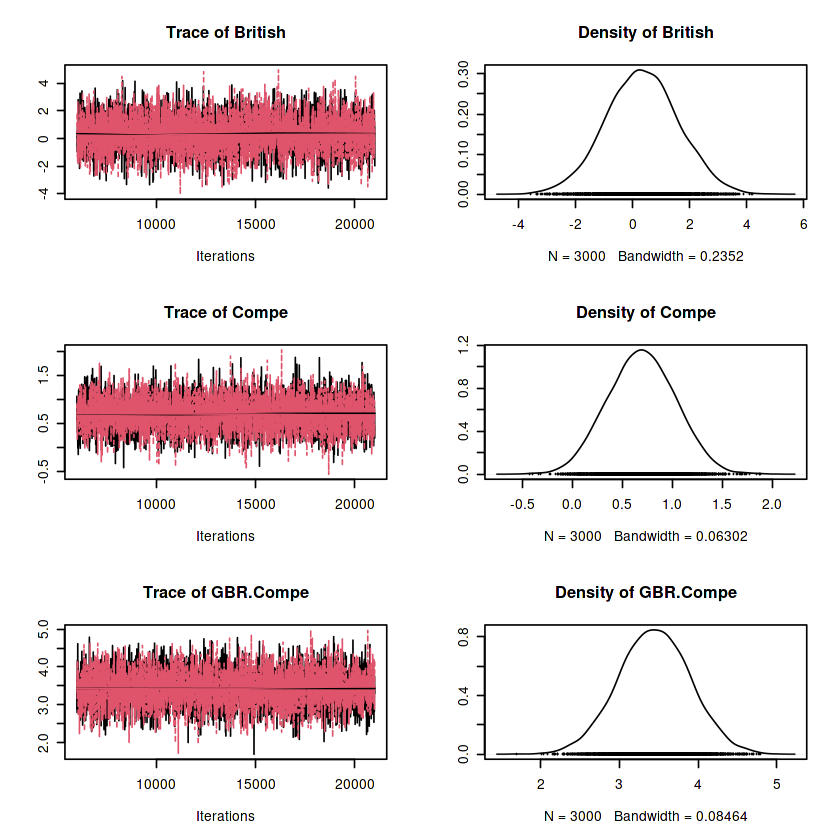

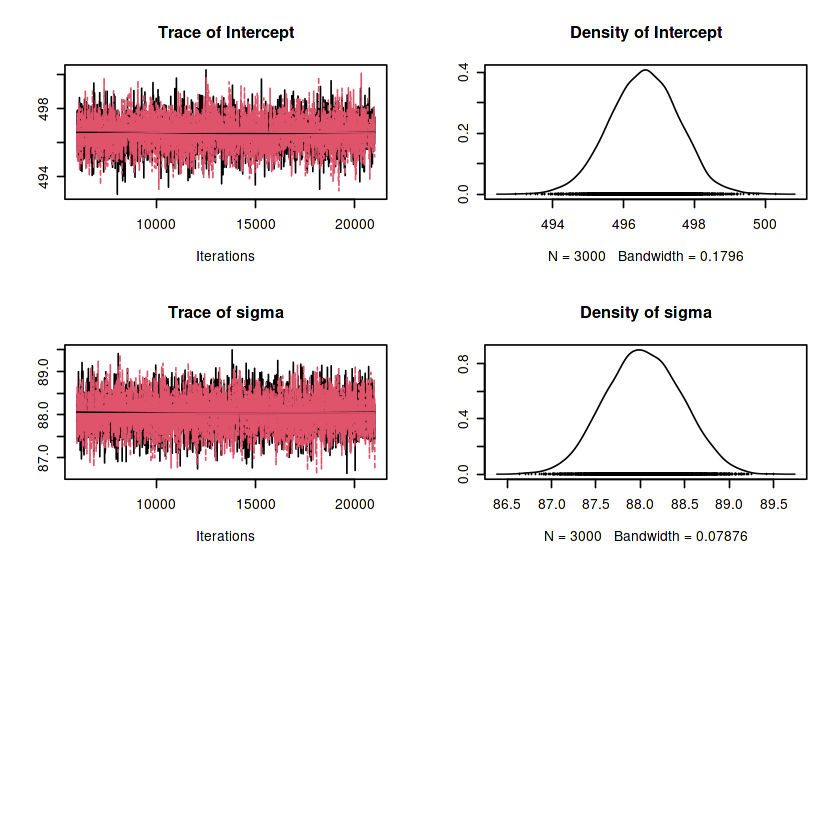

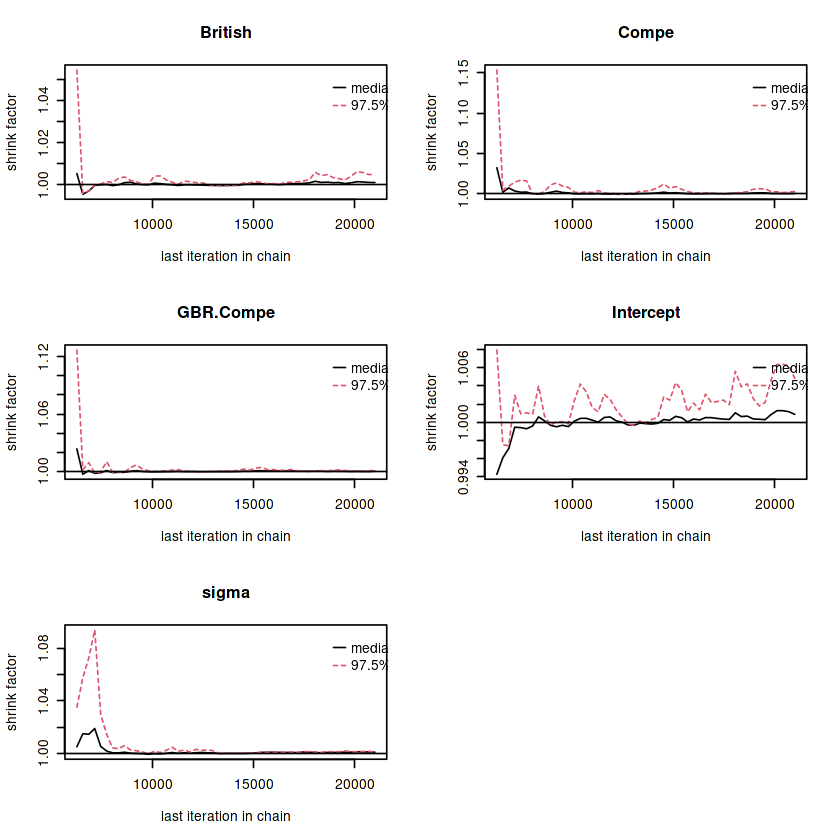

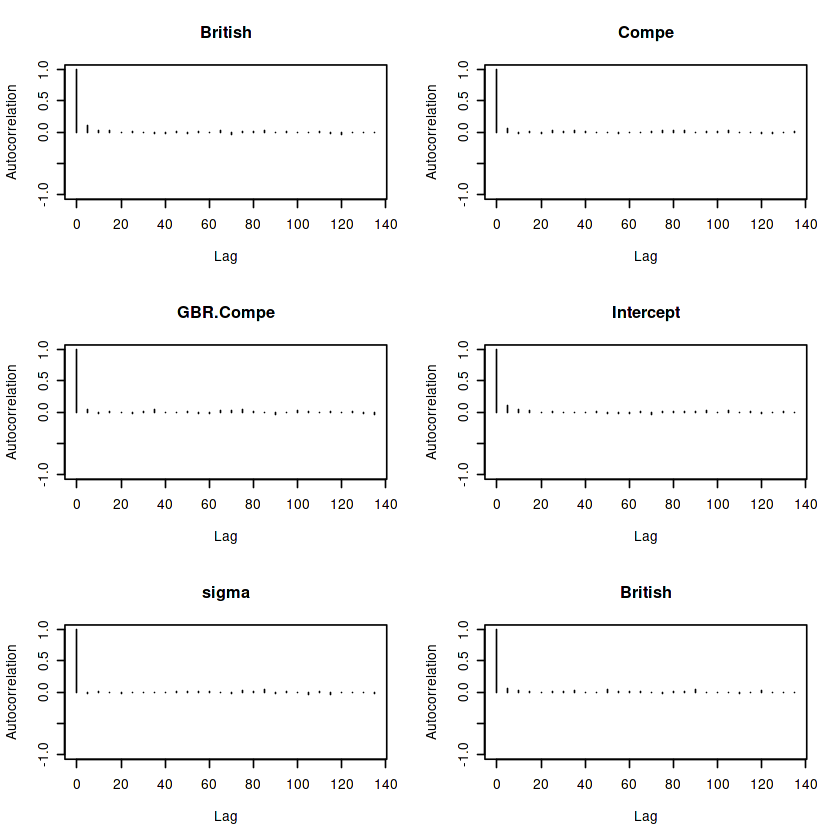

British     Compe GBR.Compe Intercept     sigma 
 5122.057  5166.312  5387.643  4754.394  6000.000


Iterations = 6005:21000
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 3000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean     SD Naive SE Time-series SE
British     0.3373 1.2682 0.016372       0.017731
Compe       0.6937 0.3387 0.004373       0.004733
GBR.Compe   3.4418 0.4549 0.005873       0.006215
Intercept 496.5823 0.9650 0.012459       0.014012
sigma      88.0378 0.4233 0.005465       0.005465

2. Quantiles for each variable:

               2.5%      25%      50%      75%   97.5%
British    -2.17672  -0.5208   0.3282   1.1732   2.823
Compe       0.05147   0.4651   0.6934   0.9239   1.347
GBR.Compe   2.54624   3.1333   3.4438   3.7528   4.327
Intercept 494.68058 495.9294 496.5928 497.2342 498.429
sigma      87.22380  87.7490  88.0326  88.3299  88.851


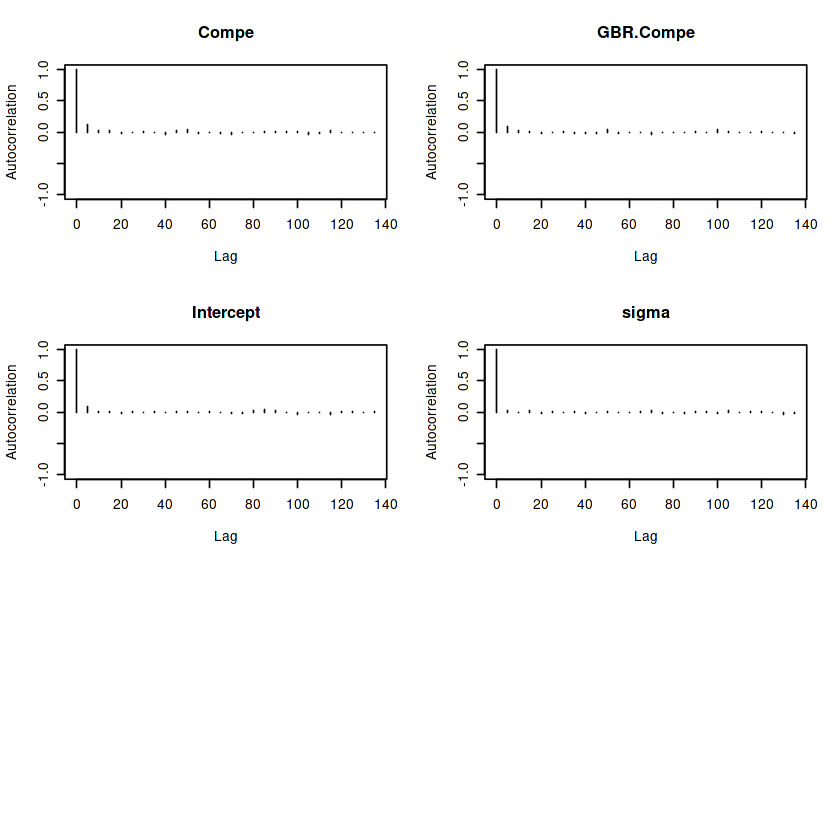

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 21045
   Unobserved stochastic nodes: 5
   Total graph size: 63234

Initializing model



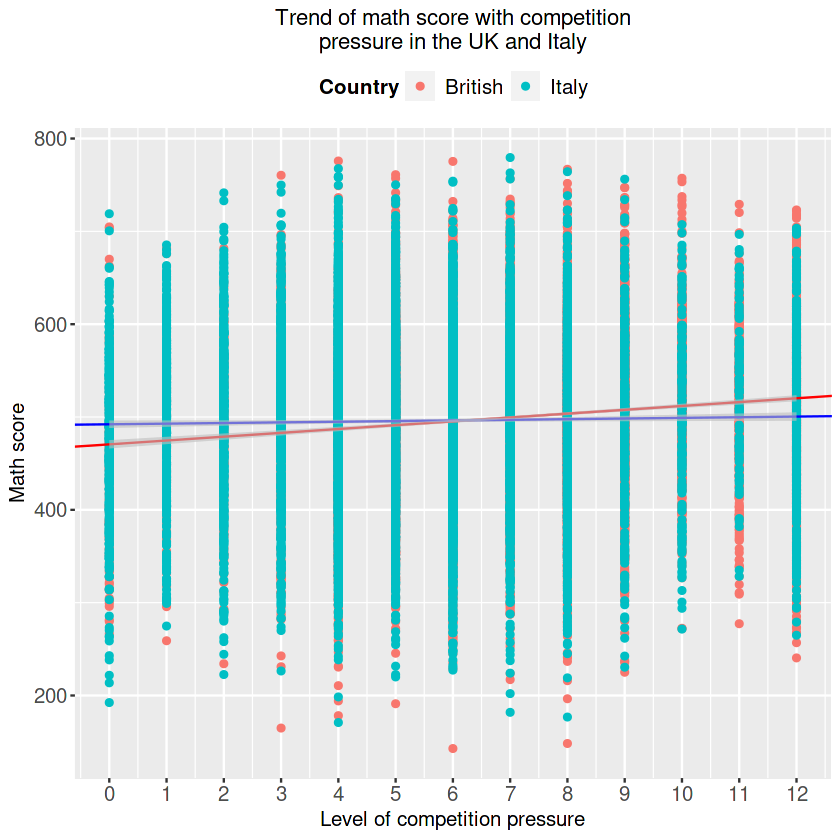

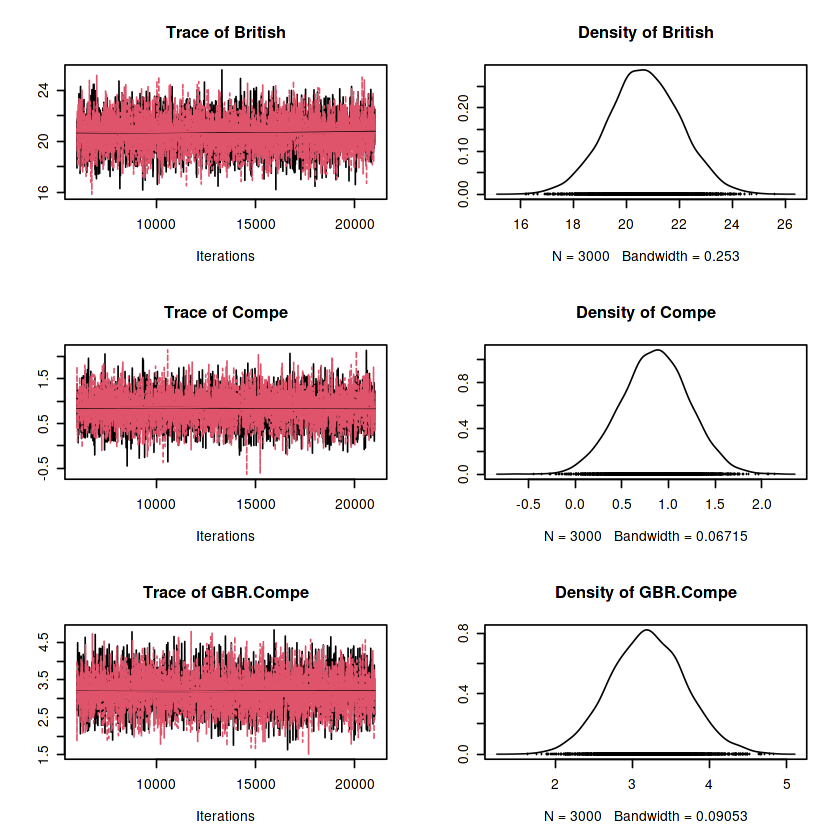

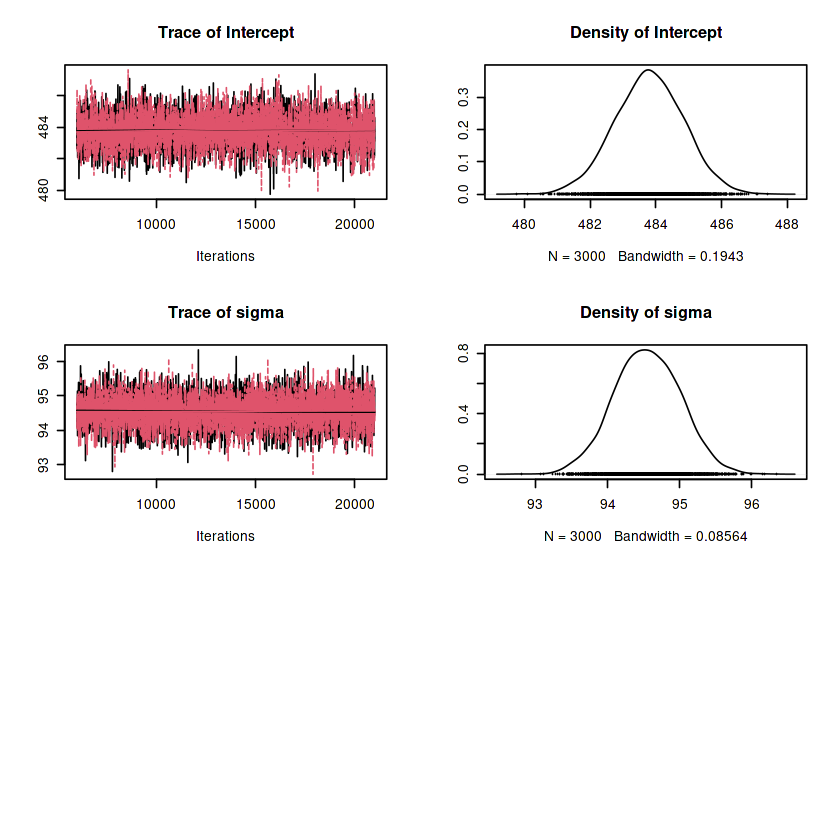

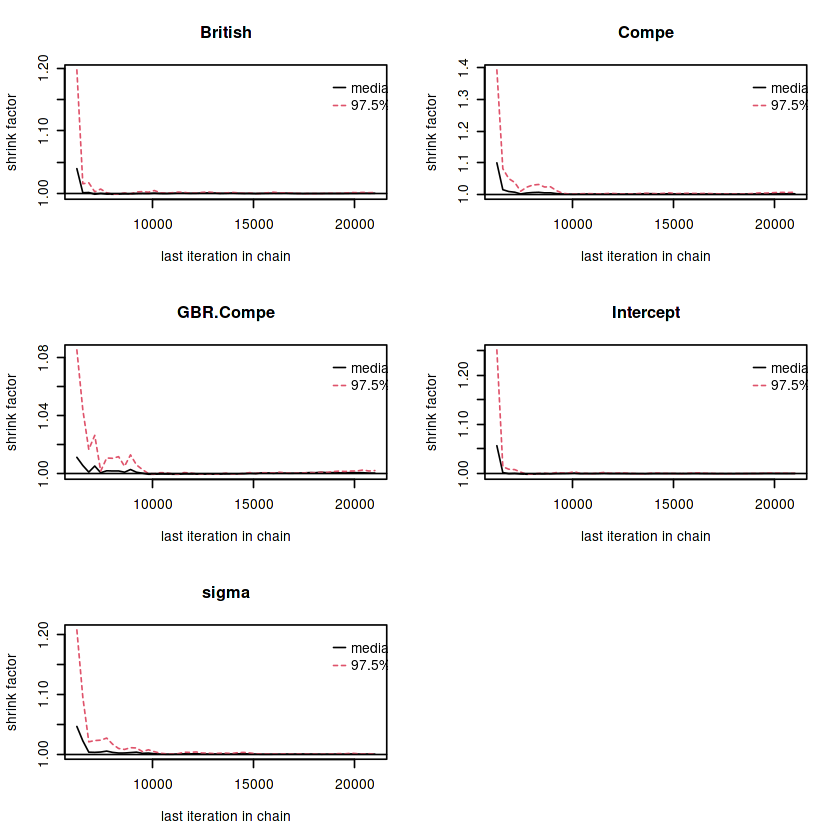

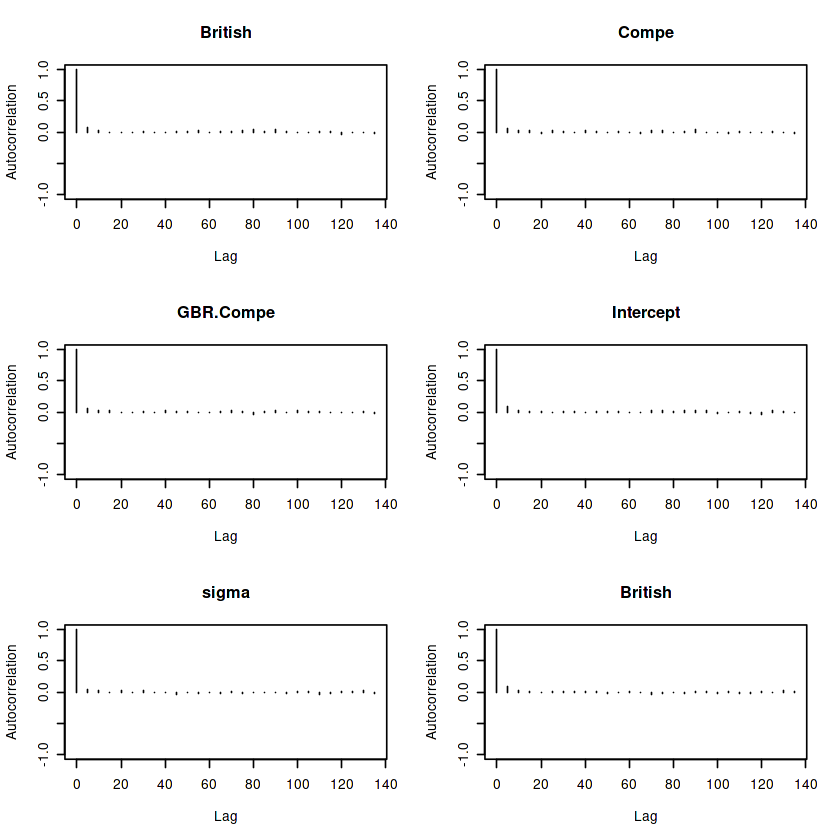

British     Compe GBR.Compe Intercept     sigma 
 5143.574  5014.332  5229.852  4786.163  5741.636


Iterations = 6005:21000
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 3000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean     SD Naive SE Time-series SE
British    20.6655 1.3662 0.017638       0.019059
Compe       0.8557 0.3625 0.004680       0.005121
GBR.Compe   3.2022 0.4865 0.006281       0.006730
Intercept 483.7957 1.0440 0.013479       0.015110
sigma      94.5493 0.4602 0.005942       0.006082

2. Quantiles for each variable:

              2.5%      25%      50%    75%   97.5%
British    17.9778  19.7640  20.6615  21.59  23.342
Compe       0.1359   0.6164   0.8612   1.10   1.559
GBR.Compe   2.2589   2.8672   3.1964   3.53   4.175
Intercept 481.7064 483.0941 483.8023 484.51 485.834
sigma      93.6415  94.2340  94.5463  94.87  95.440


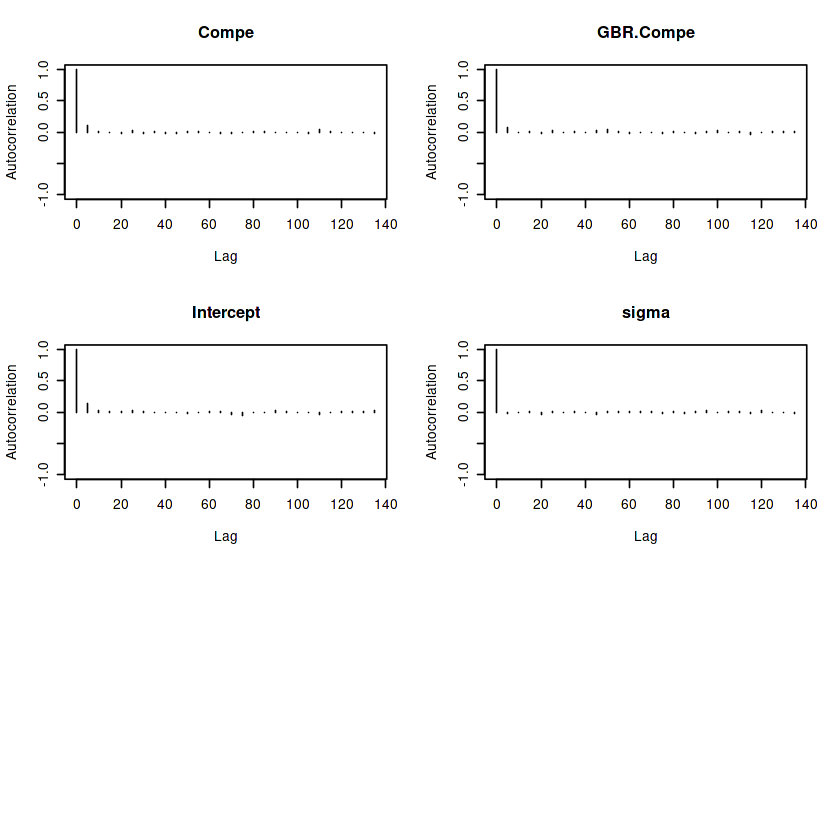

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 21045
   Unobserved stochastic nodes: 5
   Total graph size: 63234

Initializing model



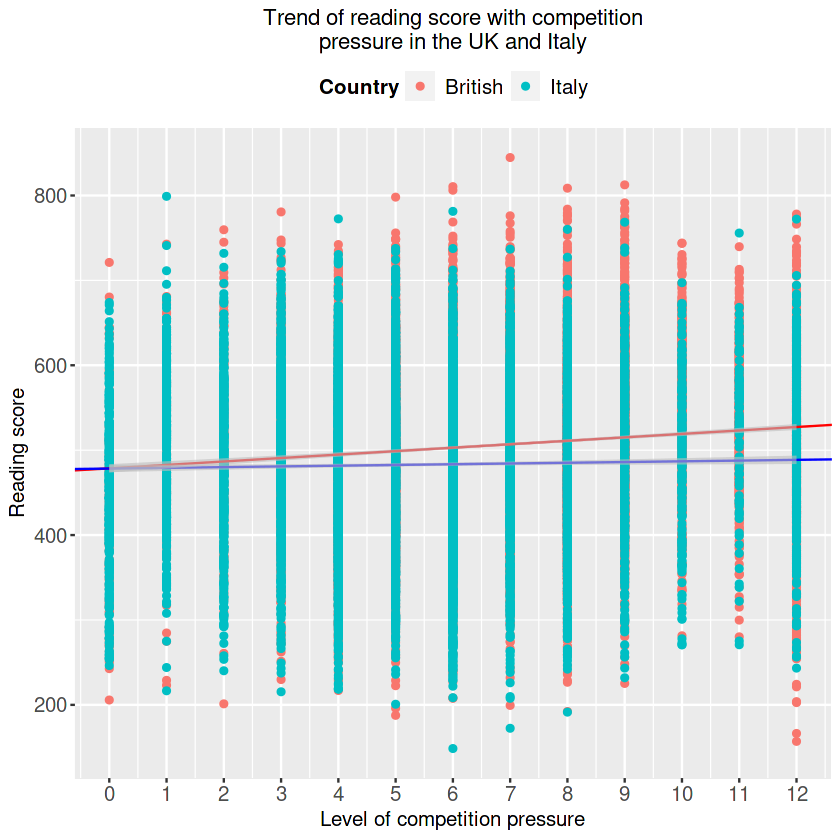

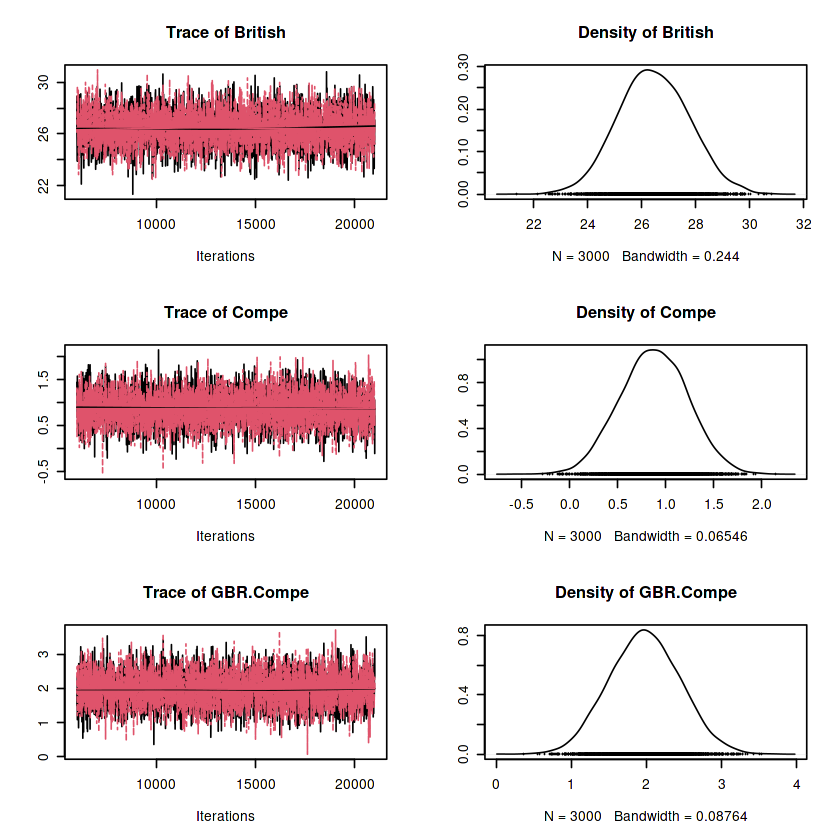

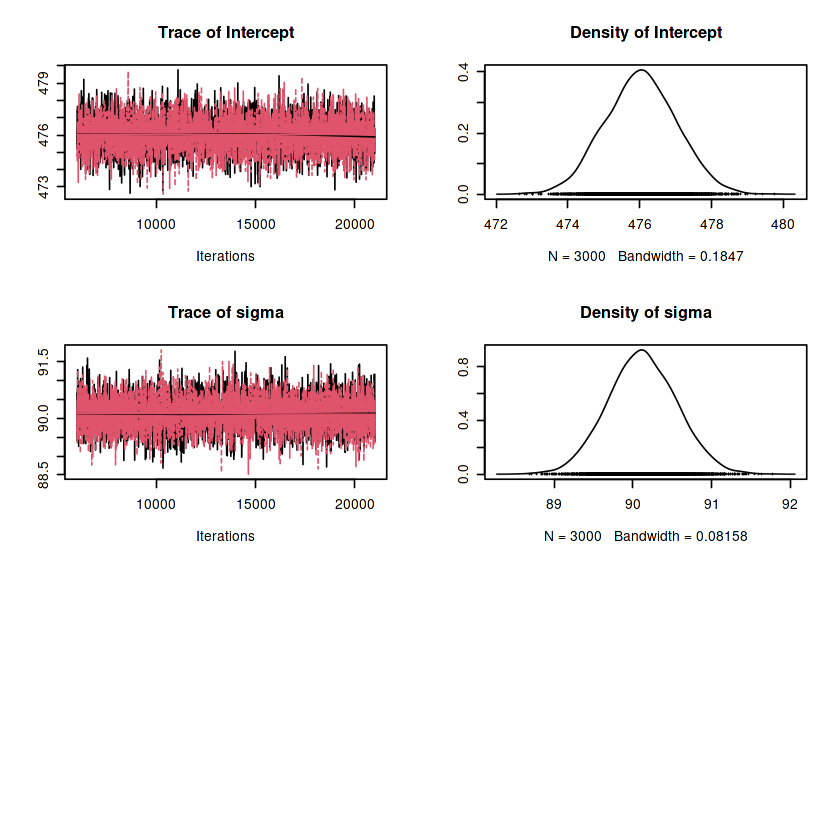

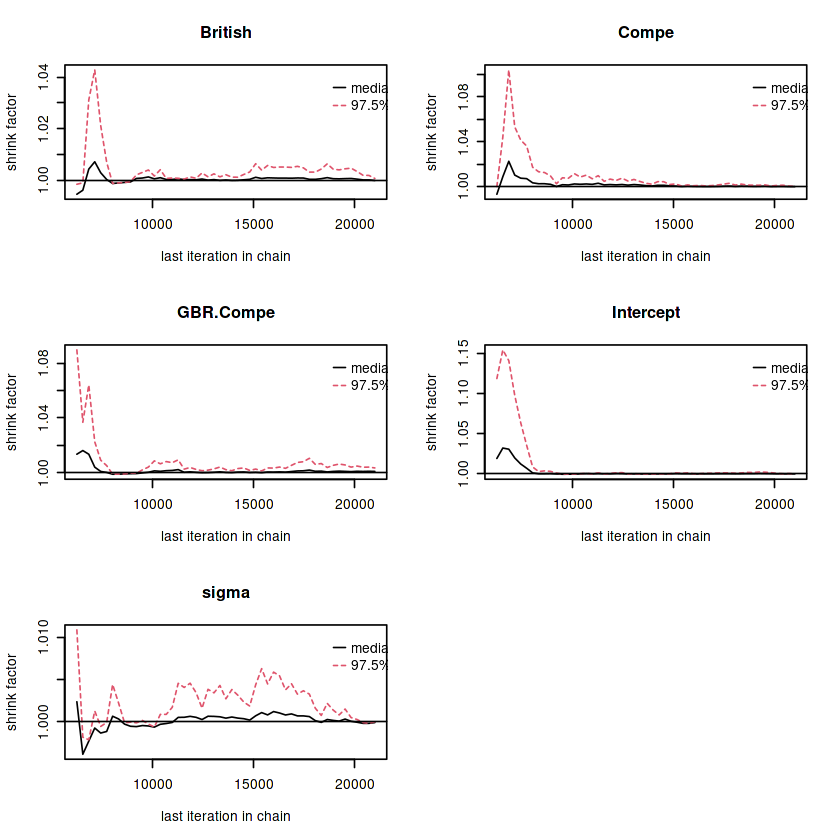

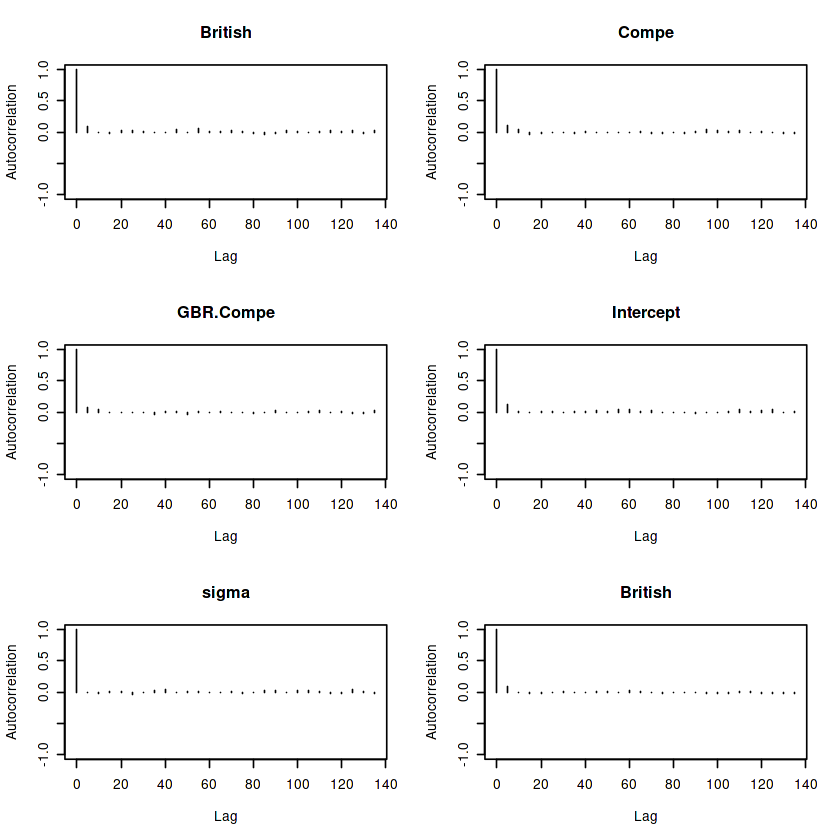

British     Compe GBR.Compe Intercept     sigma 
 4991.407  5338.133  4969.750  4793.135  6000.000


Iterations = 6005:21000
Thinning interval = 5 
Number of chains = 2 
Sample size per chain = 3000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

              Mean     SD Naive SE Time-series SE
British    26.4367 1.3112 0.016927       0.018560
Compe       0.8747 0.3518 0.004542       0.004837
GBR.Compe   1.9766 0.4710 0.006081       0.006681
Intercept 476.0275 0.9947 0.012841       0.014375
sigma      90.1191 0.4384 0.005660       0.005661

2. Quantiles for each variable:

              2.5%     25%      50%     75%   97.5%
British    23.9204  25.535  26.4073  27.331  29.033
Compe       0.1875   0.639   0.8765   1.118   1.561
GBR.Compe   1.0669   1.650   1.9729   2.293   2.912
Intercept 474.0809 475.367 476.0310 476.697 477.960
sigma      89.2756  89.824  90.1157  90.414  90.990


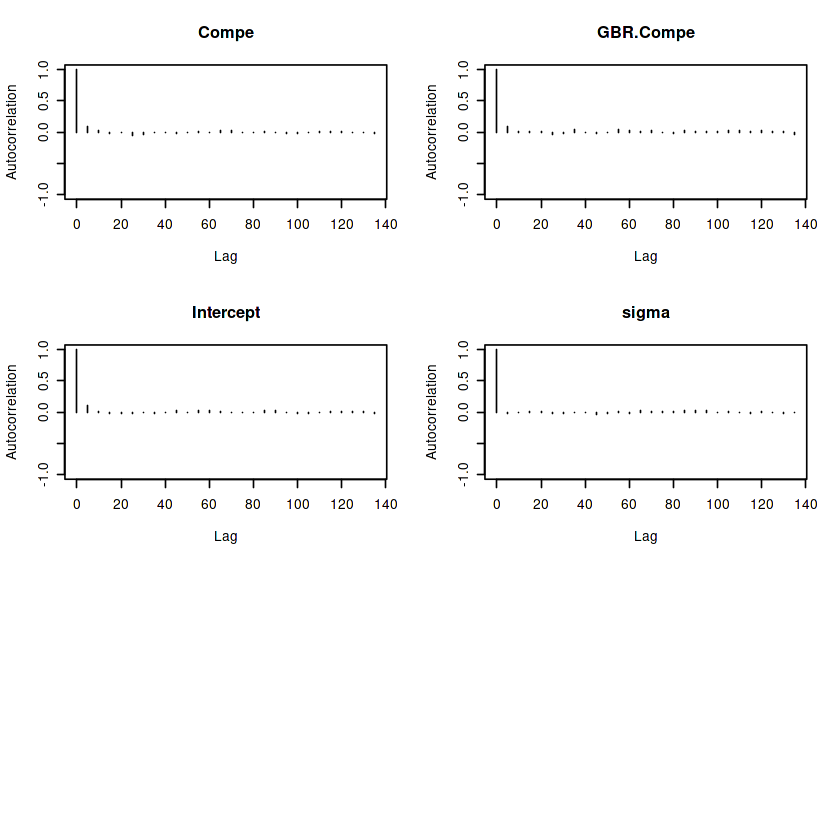

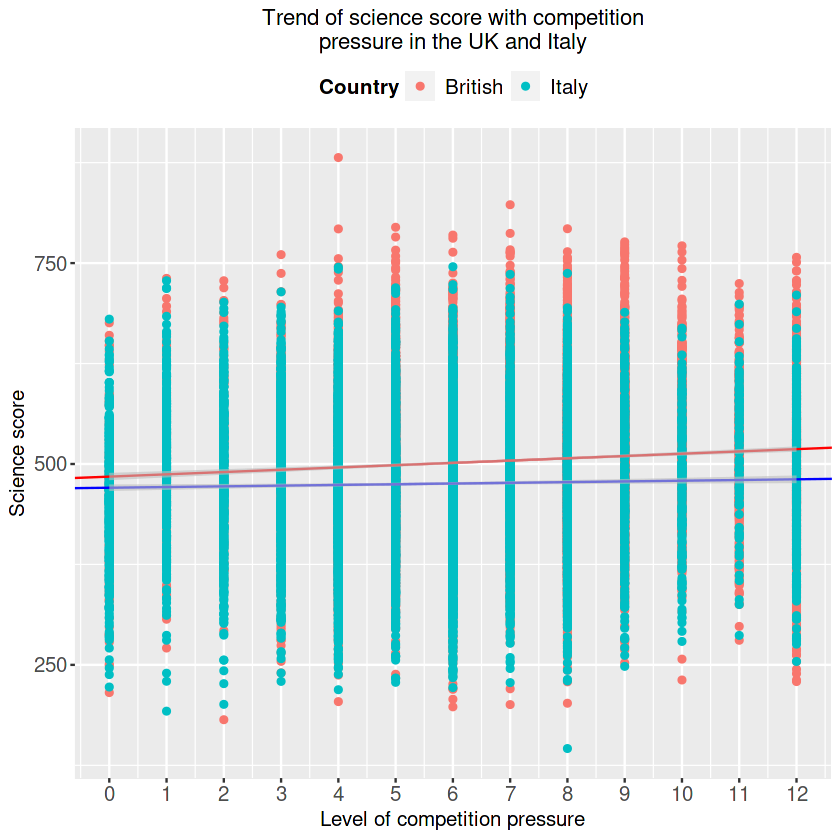

In [18]:
# The string of model statement
Compe18.Bayes.model = "model{
# The likelihood
for (i in 1:n){
  Score[i] ~ dnorm(mu[i], tau)
  mu[i] <- Intercept + British*GBR.Indi[i] + Compe*Competition[i] +
           GBR.Compe*(GBR.Indi[i]*Competition[i])
}

# The priors
Intercept ~ dnorm(0, tau.beta)
British ~ dnorm(0, tau.beta)
Compe ~ dnorm(0, tau.beta)
GBR.Compe ~ dnorm(0, tau.beta)
sigma ~ dlnorm(ln.mu, ln.prec)
tau <- 1/pow(sigma, 2)

# The hyperparameters
tau.beta <- 0.01
ln.prec <- 0.1
ln.mu <- log(100) - 1/(2*ln.prec)
}
"

# Specify initial values for the parameters and prepare the data for the model
Compe18.Bayes.inits = function(){
  inits = list(Intercept = rnorm(1, 0, 1), British = rnorm(1, 0, 1),
  Compe = rnorm(1, 0, 1), GBR.Compe = rnorm(1, 0, 1),
  sigma = rlnorm(1, log(100), 1))
  return(inits)
}
Compe18.Bayes.data = list(
  n = nrow(Compe18.center), Score = numeric(nrow(Compe18.center)),
  GBR.Indi = Compe18.center$GBR.Indi, Competition = Compe18.center$Competition)

# Construct Bayesian (JAGS) models for the three subjects respectively and
# visualize the results of predicting the scores of these subjects using the
# Bayesian models separately

# Compile the JAGS model for math subject and sample from the
# posterior distributions of the parameters
Compe18.math.data = Compe18.Bayes.data
Compe18.math.data$Score = Compe18.data[, math]
Compe18.math.model = jags.model(
    file = textConnection(Compe18.Bayes.model), data = Compe18.math.data,
    inits = Compe18.Bayes.inits, n.chains = 2)
update(Compe18.math.model, n.iter = 5000)
Compe18.math.sample = coda.samples(
  Compe18.math.model, n.iter = 15000, thin = 5,
  variable.names = c("Intercept", "British", "Compe", "GBR.Compe", "sigma"))

# Perform model diagnostics and display the summary statistics
plot(Compe18.math.sample)
gelman.plot(Compe18.math.sample)
autocorr.plot(Compe18.math.sample)
effectiveSize(Compe18.math.sample)
summary(Compe18.math.sample)

# Visualize the results of the Bayesian model for math subject
Math.sample.df = do.call(rbind.data.frame, Compe18.math.sample)
nsamp = nrow(Math.sample.df)
prediction = data.predict %>%
  mutate(GBR.Indi = as.integer(Country == "British"),
         lower = numeric(2*n), upper = numeric(2*n), PV2MATH = numeric(2*n))
for (i in 1:(2*n)){
  sample = as.numeric(
    Math.sample.df$Intercept + (Math.sample.df$British)*(prediction$GBR.Indi[i]) +
    (Math.sample.df$Compe)*(prediction$Competition[i]) +
    (Math.sample.df$GBR.Compe)*(prediction$GBR.Indi[i])*(prediction$Competition[i]))
  prediction[i, "lower"] = quantile(sample, 0.025)
  prediction[i, "upper"] = quantile(sample, 0.975)
  prediction[i, "PV2MATH"] = mean(sample)
}
prediction = prediction %>% select(!GBR.Indi) %>%
  mutate(Competition = Competition + compe.mean)
coeffi = summary(Compe18.math.sample)[[1]][, "Mean"]
ITA.inter = coeffi["Intercept"]; ITA.slope = coeffi["Compe"]
GBR.inter = ITA.inter + coeffi["British"]
GBR.slope = ITA.slope + coeffi["GBR.Compe"]
Plot.math +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F4(1).png", width = 4, height = 5)

# Compile the JAGS model for reading subject and sample from the
# posterior distributions of the parameters
Compe18.reading.data = Compe18.Bayes.data
Compe18.reading.data$Score = Compe18.data[, reading]
Compe18.reading.model = jags.model(
    file = textConnection(Compe18.Bayes.model), data = Compe18.reading.data,
    inits = Compe18.Bayes.inits, n.chains = 2)
update(Compe18.reading.model, n.iter = 5000)
Compe18.reading.sample = coda.samples(
  Compe18.reading.model, n.iter = 15000, thin = 5,
  variable.names = c("Intercept", "British", "Compe", "GBR.Compe", "sigma"))

# Perform model diagnostics and display the summary statistics
plot(Compe18.reading.sample)
gelman.plot(Compe18.reading.sample)
autocorr.plot(Compe18.reading.sample)
effectiveSize(Compe18.reading.sample)
summary(Compe18.reading.sample)

# Visualize the results of the Bayesian model for reading subject
Reading.sample.df = do.call(rbind.data.frame, Compe18.reading.sample)
nsamp = nrow(Reading.sample.df)
prediction = data.predict %>%
  mutate(GBR.Indi = as.integer(Country == "British"),
         lower = numeric(2*n), upper = numeric(2*n), PV2READ = numeric(2*n))
for (i in 1:(2*n)){
  sample = as.numeric(
    Reading.sample.df$Intercept +
    (Reading.sample.df$British)*(prediction$GBR.Indi[i]) +
    (Reading.sample.df$Compe)*(prediction$Competition[i]) +
    (Reading.sample.df$GBR.Compe)*(prediction$GBR.Indi[i])*
    (prediction$Competition[i]))
  prediction[i, "lower"] = quantile(sample, 0.025)
  prediction[i, "upper"] = quantile(sample, 0.975)
  prediction[i, "PV2READ"] = mean(sample)
}
prediction = prediction %>% select(!GBR.Indi) %>%
  mutate(Competition = Competition + compe.mean)
coeffi = summary(Compe18.reading.sample)[[1]][, "Mean"]
ITA.inter = coeffi["Intercept"]; ITA.slope = coeffi["Compe"]
GBR.inter = ITA.inter + coeffi["British"]
GBR.slope = ITA.slope + coeffi["GBR.Compe"]
Plot.reading +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F4(2).png", width = 4, height = 5)

# Compile the JAGS model for science subject and sample from the
# posterior distributions of the parameters
Compe18.science.data = Compe18.Bayes.data
Compe18.science.data$Score = Compe18.data[, science]
Compe18.science.model = jags.model(
    file = textConnection(Compe18.Bayes.model), data = Compe18.science.data,
    inits = Compe18.Bayes.inits, n.chains = 2)
update(Compe18.science.model, n.iter = 5000)
Compe18.science.sample = coda.samples(
  Compe18.science.model, n.iter = 15000, thin = 5,
  variable.names = c("Intercept", "British", "Compe", "GBR.Compe", "sigma"))

# Perform model diagnostics and display the summary statistics
plot(Compe18.science.sample)
gelman.plot(Compe18.science.sample)
autocorr.plot(Compe18.science.sample)
effectiveSize(Compe18.science.sample)
summary(Compe18.science.sample)

# Visualize the results of the Bayesian model for science subject
Science.sample.df = do.call(rbind.data.frame, Compe18.science.sample)
nsamp = nrow(Science.sample.df)
prediction = data.predict %>%
  mutate(GBR.Indi = as.integer(Country == "British"),
         lower = numeric(2*n), upper = numeric(2*n), PV2SCIE = numeric(2*n))
for (i in 1:(2*n)){
  sample = as.numeric(
    Science.sample.df$Intercept + 
    (Science.sample.df$British)*(prediction$GBR.Indi[i]) +
    (Science.sample.df$Compe)*(prediction$Competition[i]) +
    (Science.sample.df$GBR.Compe)*(prediction$GBR.Indi[i])*
    (prediction$Competition[i]))
  prediction[i, "lower"] = quantile(sample, 0.025)
  prediction[i, "upper"] = quantile(sample, 0.975)
  prediction[i, "PV2SCIE"] = mean(sample)
}
prediction = prediction %>% select(!GBR.Indi) %>%
  mutate(Competition = Competition + compe.mean)
coeffi = summary(Compe18.science.sample)[[1]][, "Mean"]
ITA.inter = coeffi["Intercept"]; ITA.slope = coeffi["Compe"]
GBR.inter = ITA.inter + coeffi["British"]
GBR.slope = ITA.slope + coeffi["GBR.Compe"]
Plot.science +
  geom_abline(intercept = GBR.inter - GBR.slope*compe.mean,
              slope = GBR.slope, color = "red") +
  geom_abline(intercept = ITA.inter - ITA.slope*compe.mean,
              slope = ITA.slope, color = "blue") +
  geom_ribbon(aes(ymin = lower, ymax = upper, group = Country),
              data = prediction, fill = "gray", alpha = 0.6)
ggsave("P5F4(3).png", width = 4, height = 5)